Machine Learning Intern Assessment Assignment
Assignment Title : Customer Churn Prediction

Assignment Description:
At Sunbase, we prioritize understanding our customers and ensuring their satisfaction. To achieve this,
we want to develop a machine learning model that predicts customer churn. Your task as a Machine
Learning Intern is to work on this project, following the guidelines and responsibilities outlined in the job description.

Objective:
Develop a machine learning model to predict customer churn based on historical customer data. You
will follow a typical machine learning project pipeline, from data preprocessing to model deployment.
Data:

You are provided with a dataset containing historical customer information, including customer
attributes, interactions, and whether they churned or not. The dataset is in CSV format.
Tasks:
1. Data Preprocessing:
 Load the provided dataset and perform initial data exploration.
 Handle missing data and outliers.
 Prepare the data for machine learning by encoding categorical variables and splitting it into
training and testing sets.
2. Feature Engineering:
 Generate relevant features from the dataset that can help improve the model's prediction
accuracy.
 Apply feature scaling or normalization if necessary.
3. Model Building:
 Choose appropriate machine learning algorithms (e.g., logistic regression, random forest, or
neural networks).
 Train and validate the selected model on the training dataset.
 Evaluate the model's performance using appropriate metrics (e.g., accuracy, precision, recall,
F1-score).
4. Model Optimization:
 Fine-tune the model parameters to improve its predictive performance.
 Explore techniques like cross-validation and hyperparameter tuning.
5. Model Deployment:
 Once satisfied with the model's performance, deploy it into a production-like
environment (you can simulate this in a development environment).
 Ensure the model can take new customer data as input and provide churn predictions.

Deliverables:
1. Jupyter Notebook or Python script containing your code.
2. A brief report summarizing your approach, including any data preprocessing, feature
engineering, and model selection decisions.
3. Model performance metrics and visualizations.
Additional Information:
 You are encouraged to use Python and relevant machine learning libraries like scikit-
learn, TensorFlow, or PyTorch.
 We expect you to demonstrate your skills in data preprocessing, feature engineering,
model building, and deployment.
Evaluation Criteria:
Your assessment will be evaluated based on the following criteria:
 Data preprocessing and cleaning.
 Feature engineering creativity and effectiveness.
 Model selection and optimization.
 Model deployment and integration.
 Clarity and organization of your code.
 Documentation and reporting of your work.
Note:
This assignment is designed to evaluate your skills and approach to a real-world machine learning
problem, aligning with the responsibilities of a Machine Learning Engineer at Sunbase. Good luck with
your project, and we look forward to reviewing your work!

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_excel('customer_churn_large_dataset.xlsx')
df.head()


,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [137]:
print(df.shape)
df.info()

(100000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [138]:
df.duplicated().sum()
#df['Churn'].value_counts
df.drop(columns=['CustomerID','Name'],inplace=True)
df = pd.get_dummies(df,columns=['Gender','Location'],drop_first=True)
df["Gender_Male"] = df["Gender_Male"].astype(int)
df["Location_Houston"] = df["Location_Houston"].astype(int)
df["Location_Miami"] = df["Location_Miami"].astype(int)
df["Location_New York"] = df["Location_New York"].astype(int)
df["Location_Los Angeles"] = df["Location_Los Angeles"].astype(int)
df["Monthly_Bill"] = df["Monthly_Bill"].astype(int)
#df.drop(columns=['Monthly_Bill','Age'],inplace=True)
#missing values
missing_values = df.isnull().sum()
data_types = df.dtypes

# Combine missing values and data types into a summary DataFrame
summary = pd.DataFrame({'Missing Values': missing_values, 'Data Type': data_types})

#print(summary)
df.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73,236,0,1,0,1,0,0
1,62,1,48,172,0,0,0,0,0,1
2,24,5,85,460,0,0,0,1,0,0
3,36,3,97,297,1,0,0,0,1,0
4,46,19,58,266,0,0,0,0,1,0


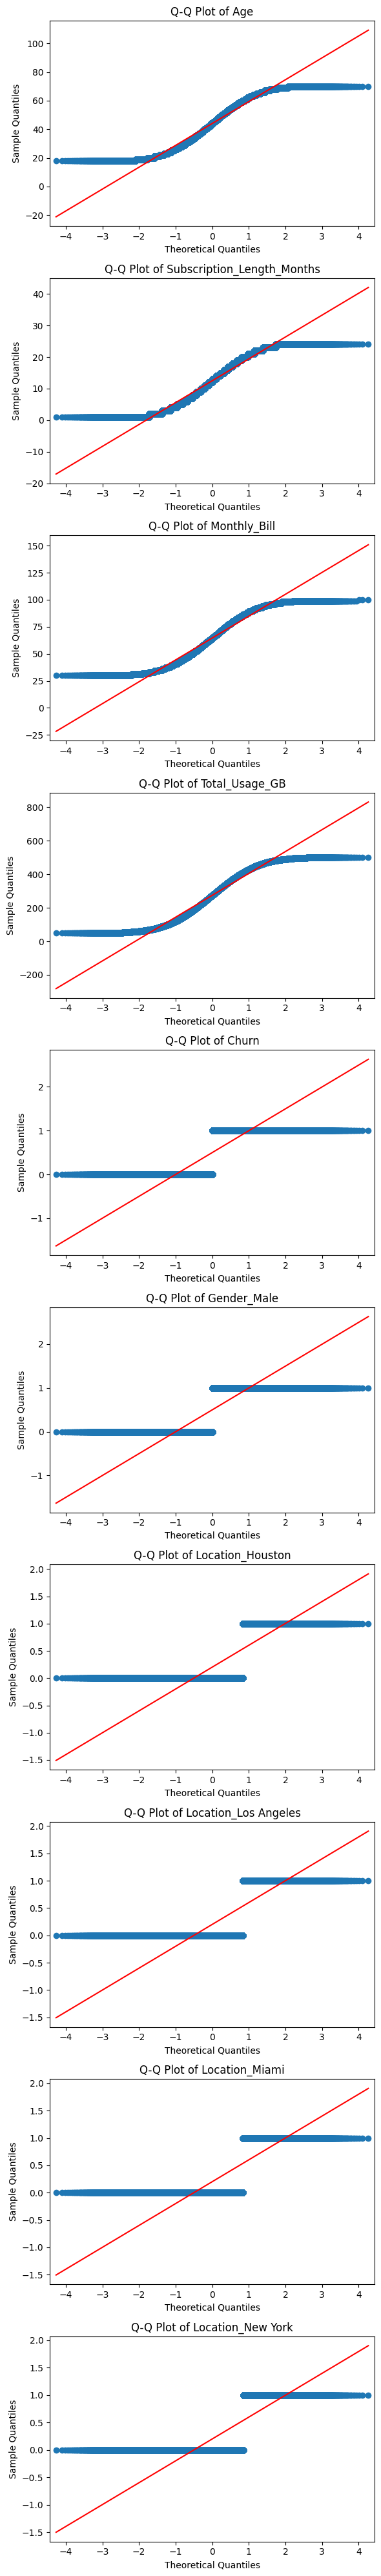

In [139]:
import scipy.stats as stats
import statsmodels.api as sm


# List of numerical columns
numerical_columns = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Churn', 'Gender_Male', 'Location_Houston', 'Location_Los Angeles', 'Location_Miami', 'Location_New York']

# Create subplots
num_plots = len(numerical_columns)
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(6, 4 * num_plots))

# Loop through each numerical column
for i, col in enumerate(numerical_columns):
    data = df[col]
    
    # Generate Q-Q plot
    sm.qqplot(data, line='s', ax=axes[i])
    axes[i].set_title(f'Q-Q Plot of {col}')
    
plt.tight_layout()
plt.show()


In [114]:
numerical_columns = ['Age','Subscription_Length_Months','Churn','Gender_Male','Location_Houston','Location_Los Angeles','Location_Miami','Location_New York']
#df[numerical_columns] = df[numerical_columns].apply(lambda x: x**0.5)
#df[numerical_columns] = df[numerical_columns].apply(lambda x: x**(1/3))
#df[numerical_columns] = df[numerical_columns].apply(lambda x: x**)
#df[numerical_columns] = df[numerical_columns].apply(lambda x: 1 / x)
#df[numerical_columns] = df[numerical_columns].apply(np.exp, exponent=2)

In [140]:
df.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73,236,0,1,0,1,0,0
1,62,1,48,172,0,0,0,0,0,1
2,24,5,85,460,0,0,0,1,0,0
3,36,3,97,297,1,0,0,0,1,0
4,46,19,58,266,0,0,0,0,1,0


In [141]:
import scipy.stats as stats

# List of all numerical columns
numerical_columns = ['Age','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB','Churn','Gender_Male','Location_Houston','Location_Los Angeles','Location_Miami','Location_New York']
for column in numerical_columns:
    shapiro_stat, shapiro_p = stats.shapiro(df[column])
    print(f"Shapiro-Wilk Test for {column}:")
    print(f"Statistic: {shapiro_stat}, p-value: {shapiro_p}")
    alpha = 0.10
    if shapiro_p > alpha:
        print("Data looks normally distributed (fail to reject H0)")
    else:
        print("Data does not look normally distributed (reject H0)")
    print("---------------------------------------------")


Shapiro-Wilk Test for Age:
Statistic: 0.9544481635093689, p-value: 0.0
Data does not look normally distributed (reject H0)
---------------------------------------------
Shapiro-Wilk Test for Subscription_Length_Months:
Statistic: 0.9509478807449341, p-value: 0.0
Data does not look normally distributed (reject H0)
---------------------------------------------
Shapiro-Wilk Test for Monthly_Bill:
Statistic: 0.9538738131523132, p-value: 0.0
Data does not look normally distributed (reject H0)
---------------------------------------------
Shapiro-Wilk Test for Total_Usage_GB:
Statistic: 0.9546841979026794, p-value: 0.0
Data does not look normally distributed (reject H0)
---------------------------------------------
Shapiro-Wilk Test for Churn:
Statistic: 0.6369441151618958, p-value: 0.0
Data does not look normally distributed (reject H0)
---------------------------------------------
Shapiro-Wilk Test for Gender_Male:
Statistic: 0.6367335319519043, p-value: 0.0
Data does not look normally dis

/home/faizan-beigh/Code Playground/Customer_Churn/venv/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [142]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF scores
def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["feature"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(len(dataframe.columns))]
    return vif_data

vif_scores = calculate_vif(df)

print(vif_scores)


                      feature       VIF
0                         Age  6.975581
1  Subscription_Length_Months  3.828094
2                Monthly_Bill  7.774188
3              Total_Usage_GB  4.704735
4                       Churn  1.932170
5                 Gender_Male  1.933150
6            Location_Houston  1.857313
7        Location_Los Angeles  1.850296
8              Location_Miami  1.852970
9           Location_New York  1.842283


In [143]:
def detect_outliers(column_data, threshold=2):
    outliers = []
    outlier_positions = []
    
    mean = np.mean(column_data)
    std = np.std(column_data)

    for index, value in enumerate(column_data):
        z_score = (value - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(value)
            outlier_positions.append(index)
                
    return outliers, outlier_positions

In [144]:
'''outlier_pt_1 = detect_outliers(df['Subscription_Length_Months'])
outlier_pt_2 = detect_outliers(df['Churn'])
outlier_pt_3 = detect_outliers(df['Gender_Male'])
outlier_pt_4 = detect_outliers(df['Location_Houston'])
outlier_pt_5 = detect_outliers(df['Location_Los Angeles'])
outlier_pt_6 = detect_outliers(df['Location_Miami'])'''
outlier_pt_7 = detect_outliers(df['Location_New York'])

#print(outlier_pt_1,outlier_pt_2,outlier_pt_3,outlier_pt_4,outlier_pt_5,outlier_pt_6,outlier_pt_7)

outliers, outlier_positions = outlier_pt_7
print("Outliers:", outliers)
print("Outlier Positions:", outlier_positions)

Outliers: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [145]:
# Row numbers to be deleted
Outlier_Positions = [1, 5, 16, 24, 31, 35, 37, 45, 48, 50, 58, 59, 61, 64, 84, 86, 90, 94, 99, 109, 111, 113, 125, 130, 134, 136, 145, 157, 159, 173, 182, 185, 190, 201, 205, 208, 214, 219, 220, 234, 236, 239, 240, 241, 244, 248, 281, 282, 283, 284, 287, 294, 296, 304, 308, 324, 329, 330, 338, 352, 355, 360, 366, 367, 377, 382, 390, 392, 393, 394, 401, 408, 422, 433, 440, 451, 461, 464, 466, 469, 476, 479, 485, 486, 488, 493, 500, 508, 513, 516, 523, 527, 531, 532, 535, 548, 551, 555, 559, 575, 582, 587, 588, 601, 606, 610, 616, 629, 633, 640, 652, 654, 657, 661, 685, 687, 688, 693, 701, 702, 718, 722, 725, 732, 734, 737, 739, 743, 749, 760, 771, 775, 776, 784, 790, 791, 799, 800, 804, 807, 808, 812, 816, 836, 840, 842, 849, 850, 851, 854, 857, 863, 865, 866, 876, 879, 883, 886, 890, 892, 903, 904, 905, 907, 912, 915, 920, 926, 934, 942, 945, 950, 956, 964, 970, 973, 974, 976, 1001, 1015, 1017, 1018, 1023, 1031, 1034, 1035, 1036, 1046, 1052, 1058, 1062, 1065, 1072, 1074, 1079, 1085, 1087, 1090, 1103, 1112, 1120, 1121, 1134, 1147, 1163, 1172, 1173, 1174, 1182, 1186, 1187, 1197, 1201, 1206, 1210, 1213, 1218, 1221, 1223, 1229, 1238, 1241, 1243, 1247, 1249, 1277, 1280, 1281, 1287, 1289, 1299, 1301, 1329, 1332, 1333, 1337, 1340, 1342, 1347, 1348, 1358, 1361, 1368, 1371, 1373, 1378, 1381, 1386, 1392, 1396, 1403, 1417, 1418, 1424, 1428, 1433, 1439, 1445, 1447, 1449, 1455, 1456, 1466, 1469, 1471, 1475, 1489, 1490, 1494, 1504, 1510, 1511, 1524, 1528, 1529, 1542, 1546, 1551, 1552, 1555, 1569, 1578, 1582, 1583, 1588, 1590, 1591, 1595, 1597, 1604, 1605, 1612, 1619, 1625, 1626, 1632, 1633, 1647, 1648, 1652, 1660, 1673, 1677, 1683, 1687, 1688, 1692, 1700, 1704, 1712, 1715, 1718, 1724, 1730, 1731, 1732, 1738, 1739, 1741, 1744, 1747, 1749, 1760, 1761, 1769, 1773, 1780, 1788, 1795, 1799, 1803, 1807, 1811, 1822, 1829, 1830, 1833, 1834, 1835, 1853, 1857, 1861, 1881, 1884, 1886, 1890, 1900, 1903, 1905, 1907, 1908, 1915, 1916, 1920, 1929, 1938, 1939, 1948, 1955, 1958, 1962, 1964, 1974, 1985, 1986, 1987, 1990, 1994, 1995, 1997, 2001, 2002, 2009, 2019, 2022, 2033, 2038, 2040, 2044, 2049, 2052, 2058, 2060, 2062, 2066, 2067, 2075, 2078, 2079, 2084, 2090, 2094, 2097, 2101, 2102, 2109, 2126, 2129, 2134, 2137, 2159, 2160, 2161, 2170, 2171, 2176, 2182, 2186, 2194, 2201, 2202, 2205, 2207, 2214, 2225, 2231, 2233, 2239, 2244, 2249, 2256, 2258, 2260, 2291, 2292, 2294, 2299, 2305, 2308, 2315, 2322, 2323, 2324, 2331, 2335, 2337, 2347, 2348, 2349, 2350, 2374, 2388, 2391, 2392, 2393, 2416, 2420, 2421, 2433, 2437, 2438, 2439, 2440, 2441, 2446, 2450, 2451, 2456, 2458, 2459, 2461, 2465, 2469, 2472, 2479, 2492, 2499, 2512, 2529, 2530, 2533, 2551, 2559, 2560, 2565, 2579, 2580, 2581, 2595, 2596, 2597, 2613, 2616, 2618, 2625, 2629, 2636, 2644, 2646, 2649, 2654, 2655, 2656, 2659, 2667, 2668, 2672, 2686, 2692, 2706, 2710, 2715, 2716, 2720, 2732, 2737, 2738, 2741, 2745, 2746, 2753, 2757, 2762, 2764, 2785, 2789, 2800, 2807, 2822, 2831, 2834, 2835, 2842, 2861, 2871, 2877, 2880, 2885, 2888, 2889, 2892, 2894, 2895, 2900, 2916, 2918, 2919, 2928, 2932, 2936, 2938, 2941, 2945, 2949, 2952, 2954, 2955, 2958, 2959, 2962, 2964, 2975, 2985, 2994, 2996, 2998, 3004, 3011, 3012, 3014, 3028, 3031, 3043, 3044, 3047, 3049, 3050, 3054, 3055, 3061, 3065, 3067, 3069, 3075, 3077, 3082, 3090, 3108, 3111, 3113, 3120, 3122, 3141, 3143, 3145, 3149, 3155, 3157, 3163, 3164, 3169, 3170, 3176, 3179, 3184, 3189, 3194, 3198, 3199, 3203, 3207, 3214, 3215, 3222, 3233, 3238, 3239, 3245, 3260, 3270, 3275, 3277, 3279, 3289, 3291, 3306, 3309, 3312, 3314, 3324, 3333, 3340, 3342, 3344, 3347, 3351, 3353, 3354, 3356, 3363, 3364, 3366, 3368, 3379, 3382, 3386, 3390, 3392, 3400, 3403, 3406, 3410, 3417, 3423, 3424, 3430, 3431, 3437, 3438, 3451, 3457, 3463, 3475, 3483, 3485, 3487, 3490, 3492, 3497, 3499, 3504, 3506, 3507, 3523, 3524, 3527, 3528, 3538, 3543, 3552, 3553, 3557, 3561, 3568, 3577, 3589, 3590, 3592, 3594, 3595, 3605, 3607, 3609, 3615, 3619, 3622, 3631, 3635, 3646, 3647, 3648, 3655, 3657, 3660, 3664, 3665, 3667, 3671, 3679, 3680, 3694, 3697, 3698, 3701, 3704, 3715, 3718, 3723, 3724, 3730, 3732, 3745, 3748, 3762, 3769, 3780, 3793, 3807, 3810, 3811, 3812, 3838, 3841, 3846, 3848, 3849, 3858, 3859, 3864, 3875, 3882, 3885, 3888, 3889, 3894, 3902, 3913, 3915, 3916, 3921, 3922, 3924, 3927, 3931, 3934, 3954, 3955, 3956, 3969, 3972, 3992, 3997, 4000, 4007, 4008, 4015, 4026, 4027, 4028, 4031, 4038, 4048, 4054, 4056, 4063, 4064, 4068, 4077, 4088, 4091, 4094, 4105, 4108, 4110, 4118, 4125, 4126, 4143, 4151, 4158, 4160, 4165, 4167, 4168, 4171, 4174, 4180, 4186, 4187, 4189, 4190, 4195, 4197, 4210, 4241, 4245, 4246, 4247, 4257, 4263, 4268, 4269, 4273, 4276, 4277, 4288, 4289, 4292, 4300, 4304, 4308, 4310, 4315, 4319, 4321, 4322, 4324, 4329, 4333, 4344, 4346, 4347, 4360, 4361, 4368, 4369, 4370, 4379, 4381, 4382, 4390, 4394, 4401, 4417, 4420, 4425, 4426, 4429, 4430, 4434, 4441, 4442, 4444, 4452, 4453, 4466, 4475, 4483, 4486, 4497, 4500, 4503, 4512, 4522, 4533, 4540, 4542, 4543, 4546, 4548, 4549, 4561, 4562, 4564, 4565, 4566, 4575, 4579, 4581, 4587, 4596, 4600, 4614, 4615, 4620, 4626, 4629, 4630, 4631, 4632, 4636, 4640, 4645, 4651, 4670, 4673, 4680, 4683, 4684, 4691, 4701, 4702, 4706, 4712, 4716, 4727, 4736, 4747, 4750, 4755, 4756, 4760, 4763, 4764, 4767, 4779, 4787, 4789, 4790, 4796, 4798, 4806, 4809, 4813, 4814, 4824, 4828, 4832, 4842, 4844, 4858, 4861, 4862, 4867, 4879, 4880, 4881, 4885, 4886, 4894, 4895, 4896, 4904, 4907, 4908, 4930, 4937, 4948, 4959, 4960, 4961, 4962, 4982, 4983, 4996, 5005, 5009, 5010, 5032, 5033, 5035, 5045, 5067, 5072, 5079, 5080, 5085, 5092, 5094, 5096, 5101, 5103, 5108, 5117, 5130, 5131, 5135, 5148, 5149, 5150, 5161, 5163, 5169, 5173, 5176, 5182, 5185, 5187, 5201, 5202, 5204, 5205, 5212, 5215, 5221, 5224, 5225, 5228, 5231, 5241, 5245, 5247, 5249, 5254, 5255, 5258, 5262, 5266, 5268, 5276, 5281, 5285, 5290, 5292, 5295, 5301, 5307, 5314, 5322, 5324, 5326, 5343, 5344, 5347, 5348, 5358, 5365, 5367, 5374, 5378, 5383, 5394, 5399, 5402, 5407, 5410, 5413, 5417, 5421, 5422, 5427, 5428, 5430, 5431, 5452, 5455, 5462, 5463, 5467, 5471, 5478, 5479, 5481, 5483, 5512, 5513, 5517, 5524, 5527, 5537, 5541, 5547, 5556, 5586, 5591, 5603, 5606, 5609, 5611, 5613, 5617, 5618, 5619, 5622, 5638, 5651, 5656, 5662, 5663, 5665, 5668, 5684, 5687, 5690, 5697, 5702, 5717, 5720, 5723, 5724, 5725, 5727, 5736, 5737, 5743, 5751, 5754, 5755, 5761, 5774, 5775, 5779, 5787, 5794, 5803, 5807, 5812, 5821, 5822, 5833, 5849, 5850, 5856, 5861, 5868, 5871, 5873, 5888, 5892, 5904, 5907, 5910, 5911, 5913, 5919, 5923, 5927, 5929, 5935, 5936, 5938, 5942, 5945, 5948, 5953, 5960, 5961, 5968, 5975, 5977, 5994, 5995, 6000, 6002, 6004, 6008, 6017, 6025, 6026, 6028, 6030, 6039, 6040, 6044, 6047, 6048, 6052, 6053, 6054, 6056, 6058, 6061, 6074, 6090, 6092, 6096, 6097, 6101, 6113, 6117, 6121, 6124, 6134, 6139, 6140, 6142, 6146, 6154, 6164, 6167, 6171, 6174, 6175, 6180, 6188, 6191, 6192, 6199, 6213, 6216, 6218, 6224, 6230, 6242, 6244, 6258, 6260, 6261, 6271, 6286, 6290, 6292, 6294, 6296, 6303, 6307, 6316, 6323, 6326, 6328, 6331, 6335, 6344, 6356, 6359, 6362, 6371, 6380, 6396, 6397, 6400, 6412, 6438, 6449, 6462, 6467, 6475, 6476, 6478, 6489, 6491, 6492, 6497, 6501, 6506, 6508, 6518, 6525, 6534, 6540, 6551, 6555, 6565, 6568, 6571, 6577, 6581, 6585, 6586, 6590, 6599, 6606, 6608, 6610, 6618, 6620, 6621, 6634, 6635, 6636, 6644, 6647, 6649, 6650, 6651, 6654, 6656, 6660, 6684, 6698, 6703, 6714, 6721, 6724, 6732, 6733, 6739, 6744, 6749, 6751, 6753, 6760, 6763, 6782, 6784, 6785, 6801, 6802, 6803, 6806, 6809, 6810, 6814, 6848, 6852, 6853, 6855, 6864, 6865, 6867, 6875, 6879, 6883, 6894, 6900, 6903, 6905, 6912, 6914, 6928, 6943, 6954, 6957, 6967, 6972, 6973, 6975, 7005, 7007, 7008, 7011, 7019, 7020, 7021, 7022, 7024, 7030, 7036, 7044, 7059, 7061, 7065, 7066, 7067, 7074, 7080, 7093, 7094, 7100, 7104, 7107, 7112, 7129, 7144, 7149, 7152, 7160, 7172, 7174, 7175, 7182, 7183, 7190, 7191, 7195, 7199, 7209, 7211, 7214, 7217, 7218, 7224, 7227, 7236, 7238, 7255, 7259, 7260, 7291, 7294, 7295, 7311, 7312, 7323, 7327, 7337, 7339, 7343, 7344, 7347, 7352, 7356, 7378, 7381, 7399, 7405, 7410, 7416, 7417, 7428, 7437, 7438, 7446, 7450, 7454, 7460, 7461, 7467, 7475, 7482, 7493, 7498, 7500, 7508, 7513, 7518, 7519, 7521, 7531, 7532, 7534, 7540, 7547, 7549, 7551, 7553, 7556, 7562, 7565, 7566, 7569, 7570, 7575, 7576, 7585, 7594, 7598, 7599, 7600, 7611, 7612, 7613, 7617, 7626, 7627, 7631, 7632, 7638, 7647, 7655, 7656, 7659, 7671, 7673, 7676, 7680, 7681, 7682, 7688, 7692, 7699, 7708, 7712, 7717, 7720, 7728, 7733, 7741, 7749, 7752, 7753, 7771, 7774, 7777, 7778, 7794, 7801, 7802, 7810, 7813, 7817, 7826, 7829, 7830, 7834, 7835, 7836, 7841, 7846, 7850, 7851, 7858, 7859, 7860, 7862, 7863, 7866, 7872, 7873, 7875, 7876, 7880, 7882, 7888, 7892, 7894, 7901, 7902, 7907, 7916, 7917, 7922, 7925, 7928, 7931, 7939, 7940, 7941, 7943, 7946, 7953, 7966, 7967, 7970, 7972, 7975, 7983, 7984, 7985, 7988, 7990, 8005, 8008, 8009, 8019, 8025, 8028, 8039, 8045, 8052, 8060, 8068, 8070, 8074, 8075, 8080, 8082, 8084, 8092, 8112, 8113, 8114, 8121, 8125, 8127, 8129, 8133, 8138, 8147, 8151, 8163, 8177, 8178, 8181, 8183, 8184, 8192, 8196, 8200, 8202, 8204, 8205, 8206, 8208, 8209, 8212, 8217, 8221, 8222, 8223, 8224, 8227, 8230, 8237, 8239, 8240, 8242, 8251, 8257, 8259, 8281, 8283, 8284, 8286, 8288, 8293, 8295, 8302, 8319, 8328, 8329, 8335, 8342, 8346, 8347, 8355, 8356, 8360, 8364, 8375, 8377, 8378, 8384, 8392, 8394, 8400, 8403, 8414, 8425, 8437, 8439, 8444, 8448, 8456, 8457, 8459, 8460, 8464, 8484, 8487, 8492, 8493, 8502, 8503, 8504, 8510, 8511, 8512, 8527, 8528, 8533, 8543, 8557, 8559, 8568, 8569, 8582, 8589, 8590, 8595, 8603, 8613, 8620, 8621, 8629, 8632, 8639, 8640, 8644, 8646, 8647, 8648, 8660, 8661, 8662, 8664, 8668, 8672, 8685, 8689, 8691, 8693, 8695, 8701, 8704, 8705, 8718, 8720, 8722, 8729, 8737, 8739, 8747, 8749, 8759, 8761, 8764, 8765, 8766, 8770, 8779, 8790, 8793, 8794, 8801, 8809, 8810, 8817, 8821, 8823, 8828, 8835, 8837, 8841, 8842, 8845, 8848, 8849, 8851, 8869, 8871, 8872, 8873, 8874, 8875, 8892, 8897, 8904, 8905, 8906, 8914, 8922, 8930, 8938, 8940, 8943, 8957, 8961, 8976, 8977, 8981, 8995, 8997, 8999, 9001, 9002, 9011, 9012, 9016, 9021, 9033, 9040, 9046, 9056, 9060, 9061, 9063, 9064, 9075, 9077, 9078, 9082, 9084, 9092, 9093, 9095, 9101, 9102, 9103, 9115, 9119, 9120, 9125, 9130, 9149, 9151, 9152, 9160, 9163, 9171, 9173, 9185, 9196, 9214, 9232, 9239, 9244, 9245, 9268, 9273, 9274, 9280, 9288, 9293, 9308, 9310, 9318, 9328, 9332, 9337, 9338, 9343, 9354, 9357, 9361, 9366, 9369, 9382, 9383, 9385, 9390, 9392, 9395, 9399, 9406, 9417, 9419, 9420, 9421, 9424, 9441, 9445, 9447, 9448, 9452, 9458, 9465, 9475, 9486, 9488, 9493, 9495, 9502, 9503, 9504, 9507, 9508, 9513, 9519, 9520, 9523, 9524, 9533, 9540, 9541, 9546, 9555, 9570, 9585, 9587, 9588, 9594, 9601, 9602, 9605, 9606, 9611, 9617, 9620, 9621, 9633, 9637, 9642, 9643, 9648, 9649, 9650, 9653, 9654, 9656, 9661, 9671, 9674, 9677, 9681, 9682, 9684, 9686, 9690, 9693, 9696, 9697, 9701, 9712, 9713, 9718, 9733, 9740, 9745, 9757, 9759, 9766, 9769, 9772, 9782, 9784, 9792, 9795, 9800, 9807, 9809, 9821, 9824, 9828, 9831, 9835, 9839, 9844, 9845, 9848, 9879, 9880, 9881, 9887, 9888, 9894, 9902, 9908, 9918, 9922, 9932, 9937, 9943, 9957, 9964, 9970, 9979, 9981, 9984, 9988, 9998, 10013, 10025, 10030, 10042, 10044, 10048, 10049, 10050, 10053, 10076, 10083, 10084, 10085, 10093, 10101, 10106, 10121, 10129, 10133, 10135, 10139, 10142, 10145, 10147, 10154, 10164, 10166, 10167, 10169, 10173, 10174, 10182, 10183, 10184, 10185, 10188, 10190, 10204, 10206, 10208, 10221, 10226, 10227, 10231, 10244, 10249, 10258, 10260, 10266, 10273, 10278, 10282, 10283, 10288, 10297, 10307, 10308, 10311, 10314, 10322, 10333, 10344, 10358, 10363, 10364, 10367, 10373, 10376, 10382, 10384, 10387, 10394, 10400, 10402, 10407, 10408, 10410, 10414, 10421, 10429, 10440, 10443, 10457, 10458, 10460, 10464, 10466, 10468, 10472, 10475, 10484, 10487, 10491, 10494, 10497, 10509, 10515, 10523, 10524, 10525, 10534, 10535, 10540, 10547, 10550, 10562, 10564, 10566, 10570, 10573, 10574, 10586, 10588, 10592, 10593, 10604, 10608, 10625, 10627, 10628, 10629, 10633, 10638, 10642, 10644, 10647, 10657, 10662, 10686, 10687, 10694, 10696, 10705, 10708, 10711, 10731, 10740, 10741, 10743, 10749, 10754, 10757, 10772, 10773, 10777, 10778, 10779, 10787, 10799, 10810, 10816, 10822, 10837, 10839, 10843, 10850, 10855, 10862, 10865, 10874, 10894, 10903, 10912, 10930, 10932, 10945, 10947, 10953, 10957, 10959, 10965, 10972, 10974, 10978, 10979, 10981, 10983, 10991, 10995, 10996, 11004, 11010, 11011, 11012, 11018, 11020, 11021, 11031, 11042, 11057, 11068, 11070, 11072, 11076, 11077, 11083, 11088, 11096, 11098, 11099, 11103, 11104, 11108, 11110, 11119, 11124, 11125, 11129, 11131, 11137, 11144, 11170, 11185, 11191, 11197, 11201, 11206, 11210, 11217, 11224, 11235, 11237, 11240, 11242, 11244, 11245, 11249, 11251, 11255, 11256, 11261, 11262, 11264, 11267, 11270, 11272, 11273, 11278, 11281, 11292, 11295, 11308, 11316, 11317, 11321, 11326, 11327, 11331, 11336, 11337, 11338, 11340, 11347, 11350, 11352, 11354, 11355, 11361, 11362, 11368, 11373, 11374, 11375, 11384, 11395, 11397, 11410, 11412, 11416, 11420, 11421, 11425, 11432, 11433, 11437, 11438, 11439, 11444, 11445, 11446, 11462, 11466, 11470, 11474, 11479, 11481, 11482, 11491, 11494, 11495, 11496, 11502, 11504, 11507, 11515, 11516, 11522, 11526, 11527, 11528, 11532, 11533, 11544, 11552, 11553, 11554, 11556, 11561, 11563, 11565, 11567, 11569, 11570, 11575, 11586, 11589, 11596, 11601, 11604, 11612, 11613, 11621, 11625, 11633, 11634, 11637, 11649, 11650, 11652, 11658, 11665, 11667, 11670, 11672, 11683, 11684, 11690, 11693, 11694, 11701, 11706, 11707, 11720, 11722, 11726, 11734, 11739, 11747, 11759, 11767, 11771, 11774, 11776, 11777, 11779, 11782, 11787, 11789, 11803, 11825, 11826, 11827, 11829, 11833, 11835, 11836, 11848, 11852, 11856, 11865, 11866, 11868, 11875, 11879, 11881, 11885, 11890, 11891, 11895, 11898, 11906, 11907, 11910, 11911, 11912, 11928, 11929, 11932, 11935, 11938, 11941, 11947, 11954, 11957, 11968, 11969, 11973, 11987, 11988, 11991, 11993, 11995, 11996, 11999, 12002, 12008, 12012, 12018, 12020, 12025, 12026, 12027, 12029, 12032, 12037, 12039, 12046, 12053, 12064, 12065, 12070, 12091, 12096, 12097, 12102, 12108, 12110, 12117, 12119, 12128, 12132, 12143, 12147, 12150, 12153, 12155, 12164, 12165, 12167, 12169, 12171, 12175, 12182, 12191, 12209, 12214, 12215, 12222, 12234, 12236, 12248, 12253, 12256, 12259, 12261, 12262, 12271, 12274, 12276, 12285, 12294, 12302, 12310, 12312, 12316, 12317, 12319, 12326, 12334, 12335, 12337, 12343, 12344, 12348, 12351, 12353, 12358, 12366, 12372, 12379, 12380, 12383, 12387, 12393, 12401, 12402, 12408, 12416, 12417, 12426, 12427, 12437, 12444, 12447, 12450, 12451, 12452, 12464, 12465, 12479, 12480, 12483, 12485, 12487, 12488, 12497, 12506, 12514, 12516, 12526, 12528, 12529, 12540, 12549, 12551, 12556, 12565, 12573, 12583, 12590, 12600, 12601, 12605, 12606, 12610, 12612, 12618, 12619, 12624, 12625, 12626, 12639, 12651, 12655, 12660, 12665, 12679, 12680, 12688, 12696, 12700, 12709, 12717, 12723, 12725, 12729, 12738, 12741, 12744, 12755, 12757, 12762, 12768, 12776, 12785, 12789, 12795, 12803, 12805, 12810, 12812, 12816, 12819, 12820, 12824, 12836, 12838, 12841, 12842, 12843, 12848, 12852, 12855, 12859, 12862, 12869, 12872, 12877, 12878, 12890, 12894, 12903, 12913, 12920, 12926, 12939, 12942, 12943, 12945, 12947, 12948, 12952, 12959, 12961, 12962, 12967, 12969, 12977, 12979, 12981, 12982, 12985, 12987, 12990, 12994, 12997, 13004, 13006, 13008, 13013, 13021, 13022, 13029, 13031, 13032, 13044, 13045, 13046, 13056, 13058, 13068, 13074, 13075, 13077, 13079, 13096, 13103, 13106, 13126, 13131, 13138, 13140, 13147, 13149, 13150, 13153, 13154, 13165, 13167, 13177, 13194, 13200, 13201, 13210, 13214, 13218, 13227, 13235, 13242, 13253, 13255, 13264, 13267, 13268, 13271, 13272, 13284, 13302, 13306, 13311, 13315, 13323, 13336, 13341, 13350, 13360, 13362, 13363, 13368, 13372, 13377, 13395, 13400, 13402, 13408, 13409, 13421, 13429, 13432, 13441, 13443, 13460, 13465, 13466, 13468, 13470, 13475, 13479, 13484, 13486, 13488, 13494, 13496, 13497, 13511, 13526, 13528, 13529, 13534, 13537, 13547, 13561, 13563, 13567, 13569, 13571, 13577, 13578, 13581, 13583, 13587, 13589, 13590, 13593, 13594, 13605, 13611, 13617, 13619, 13623, 13624, 13626, 13627, 13628, 13633, 13638, 13641, 13645, 13648, 13666, 13667, 13669, 13673, 13682, 13684, 13693, 13702, 13707, 13709, 13713, 13720, 13721, 13722, 13745, 13756, 13757, 13758, 13762, 13765, 13766, 13768, 13775, 13778, 13789, 13796, 13800, 13801, 13802, 13806, 13807, 13813, 13815, 13816, 13817, 13820, 13821, 13829, 13845, 13849, 13851, 13867, 13870, 13872, 13884, 13886, 13892, 13896, 13899, 13910, 13919, 13920, 13925, 13934, 13943, 13956, 13960, 13962, 13975, 13988, 13991, 13994, 13997, 13998, 14000, 14006, 14007, 14014, 14016, 14021, 14028, 14034, 14037, 14041, 14042, 14049, 14052, 14056, 14063, 14064, 14066, 14072, 14078, 14079, 14083, 14089, 14100, 14107, 14110, 14113, 14120, 14125, 14129, 14131, 14133, 14134, 14135, 14149, 14154, 14157, 14161, 14167, 14168, 14174, 14177, 14182, 14189, 14190, 14191, 14192, 14198, 14200, 14202, 14205, 14219, 14223, 14228, 14236, 14237, 14244, 14246, 14247, 14248, 14253, 14260, 14265, 14271, 14280, 14290, 14291, 14298, 14299, 14309, 14311, 14312, 14321, 14322, 14323, 14333, 14335, 14337, 14350, 14353, 14357, 14364, 14367, 14396, 14405, 14406, 14408, 14415, 14417, 14425, 14427, 14440, 14446, 14453, 14457, 14467, 14469, 14470, 14476, 14477, 14481, 14482, 14484, 14489, 14491, 14493, 14494, 14498, 14509, 14510, 14514, 14516, 14519, 14524, 14526, 14529, 14532, 14533, 14534, 14543, 14566, 14568, 14570, 14574, 14584, 14586, 14588, 14590, 14597, 14604, 14605, 14607, 14609, 14613, 14616, 14621, 14622, 14624, 14627, 14629, 14632, 14633, 14635, 14640, 14646, 14647, 14660, 14682, 14684, 14695, 14699, 14700, 14701, 14704, 14714, 14715, 14716, 14719, 14727, 14729, 14730, 14734, 14735, 14737, 14748, 14754, 14757, 14759, 14764, 14767, 14770, 14771, 14780, 14784, 14785, 14795, 14799, 14802, 14812, 14813, 14818, 14821, 14836, 14839, 14840, 14843, 14844, 14846, 14857, 14861, 14862, 14870, 14879, 14881, 14882, 14883, 14897, 14905, 14909, 14912, 14922, 14923, 14924, 14927, 14928, 14934, 14936, 14948, 14963, 14965, 14966, 14970, 14971, 14973, 14976, 14988, 14994, 14996, 15000, 15002, 15018, 15022, 15029, 15034, 15041, 15043, 15051, 15066, 15069, 15082, 15089, 15099, 15103, 15104, 15107, 15110, 15114, 15115, 15118, 15121, 15123, 15135, 15141, 15147, 15150, 15162, 15164, 15171, 15173, 15176, 15177, 15178, 15182, 15184, 15194, 15197, 15201, 15203, 15209, 15212, 15219, 15220, 15222, 15225, 15243, 15248, 15251, 15253, 15260, 15268, 15274, 15276, 15279, 15285, 15287, 15288, 15291, 15293, 15298, 15300, 15304, 15306, 15310, 15311, 15314, 15324, 15325, 15327, 15331, 15341, 15353, 15359, 15360, 15371, 15377, 15385, 15386, 15387, 15388, 15392, 15394, 15403, 15406, 15410, 15414, 15417, 15425, 15429, 15430, 15442, 15445, 15448, 15455, 15459, 15460, 15468, 15472, 15473, 15474, 15487, 15491, 15492, 15496, 15497, 15500, 15507, 15508, 15509, 15512, 15518, 15525, 15531, 15538, 15540, 15545, 15548, 15549, 15558, 15566, 15570, 15573, 15576, 15580, 15582, 15585, 15593, 15598, 15600, 15601, 15623, 15628, 15629, 15632, 15643, 15653, 15656, 15659, 15663, 15665, 15670, 15677, 15678, 15681, 15690, 15693, 15699, 15702, 15710, 15712, 15714, 15718, 15727, 15732, 15733, 15735, 15750, 15753, 15759, 15761, 15767, 15768, 15769, 15779, 15782, 15788, 15796, 15798, 15800, 15805, 15806, 15810, 15813, 15814, 15821, 15824, 15825, 15837, 15839, 15840, 15847, 15855, 15856, 15857, 15859, 15865, 15873, 15877, 15890, 15892, 15895, 15897, 15898, 15902, 15909, 15926, 15930, 15931, 15935, 15937, 15942, 15943, 15960, 15965, 15970, 15971, 15985, 16004, 16008, 16012, 16019, 16029, 16032, 16038, 16046, 16051, 16054, 16057, 16059, 16060, 16067, 16068, 16073, 16088, 16091, 16101, 16109, 16115, 16124, 16126, 16129, 16134, 16141, 16142, 16146, 16147, 16151, 16153, 16156, 16161, 16163, 16166, 16172, 16174, 16181, 16182, 16188, 16189, 16192, 16193, 16198, 16199, 16202, 16205, 16209, 16214, 16218, 16229, 16231, 16235, 16236, 16246, 16250, 16256, 16257, 16260, 16262, 16264, 16275, 16276, 16278, 16283, 16284, 16286, 16304, 16305, 16310, 16312, 16329, 16333, 16336, 16356, 16359, 16368, 16372, 16389, 16391, 16393, 16394, 16396, 16404, 16407, 16411, 16413, 16415, 16417, 16425, 16438, 16439, 16446, 16448, 16455, 16460, 16463, 16464, 16478, 16485, 16489, 16504, 16506, 16509, 16512, 16515, 16533, 16541, 16545, 16548, 16549, 16553, 16559, 16560, 16562, 16563, 16565, 16572, 16580, 16583, 16588, 16589, 16590, 16597, 16598, 16603, 16606, 16607, 16609, 16623, 16626, 16627, 16629, 16644, 16647, 16651, 16661, 16670, 16675, 16676, 16677, 16680, 16683, 16688, 16690, 16695, 16696, 16697, 16705, 16715, 16718, 16721, 16733, 16734, 16741, 16744, 16751, 16754, 16758, 16760, 16767, 16769, 16779, 16784, 16790, 16796, 16801, 16805, 16813, 16818, 16822, 16825, 16826, 16833, 16846, 16849, 16851, 16854, 16860, 16863, 16864, 16878, 16889, 16893, 16894, 16895, 16897, 16910, 16911, 16912, 16915, 16918, 16920, 16934, 16939, 16940, 16943, 16944, 16949, 16954, 16958, 16969, 16979, 16983, 16988, 16990, 16995, 16999, 17001, 17003, 17008, 17010, 17015, 17018, 17020, 17023, 17025, 17038, 17039, 17041, 17043, 17051, 17057, 17064, 17072, 17084, 17085, 17087, 17092, 17097, 17102, 17113, 17115, 17118, 17133, 17138, 17141, 17143, 17145, 17148, 17149, 17170, 17172, 17176, 17189, 17195, 17196, 17203, 17207, 17215, 17217, 17220, 17225, 17230, 17236, 17244, 17245, 17250, 17259, 17262, 17264, 17268, 17277, 17279, 17281, 17286, 17293, 17298, 17312, 17321, 17327, 17328, 17331, 17334, 17339, 17341, 17343, 17347, 17349, 17356, 17364, 17368, 17376, 17377, 17382, 17390, 17393, 17396, 17401, 17404, 17407, 17413, 17418, 17428, 17440, 17452, 17453, 17457, 17461, 17465, 17471, 17474, 17479, 17481, 17482, 17486, 17490, 17491, 17495, 17499, 17501, 17506, 17508, 17509, 17510, 17511, 17512, 17524, 17526, 17528, 17529, 17531, 17535, 17545, 17547, 17549, 17551, 17553, 17570, 17572, 17575, 17577, 17584, 17589, 17592, 17597, 17604, 17612, 17625, 17626, 17643, 17646, 17653, 17654, 17676, 17683, 17687, 17689, 17690, 17694, 17697, 17703, 17704, 17706, 17710, 17715, 17724, 17727, 17728, 17742, 17745, 17749, 17754, 17768, 17773, 17777, 17781, 17784, 17789, 17793, 17795, 17803, 17806, 17813, 17814, 17815, 17821, 17822, 17831, 17835, 17841, 17844, 17852, 17853, 17871, 17875, 17880, 17886, 17894, 17908, 17918, 17922, 17928, 17929, 17942, 17953, 17954, 17957, 17964, 17983, 17984, 17987, 17999, 18000, 18007, 18008, 18009, 18018, 18021, 18029, 18032, 18033, 18056, 18076, 18080, 18082, 18087, 18109, 18112, 18117, 18118, 18119, 18123, 18131, 18138, 18156, 18158, 18161, 18162, 18172, 18175, 18177, 18188, 18191, 18198, 18203, 18209, 18211, 18220, 18221, 18222, 18224, 18226, 18229, 18235, 18244, 18246, 18254, 18257, 18258, 18260, 18266, 18268, 18271, 18273, 18275, 18277, 18279, 18280, 18287, 18288, 18294, 18295, 18296, 18301, 18306, 18309, 18312, 18331, 18338, 18349, 18357, 18361, 18365, 18376, 18391, 18395, 18400, 18407, 18409, 18410, 18415, 18416, 18427, 18437, 18440, 18447, 18457, 18458, 18459, 18462, 18465, 18470, 18471, 18472, 18475, 18477, 18485, 18492, 18495, 18500, 18508, 18509, 18511, 18513, 18517, 18519, 18523, 18524, 18526, 18527, 18528, 18531, 18540, 18541, 18553, 18556, 18559, 18561, 18569, 18573, 18575, 18579, 18580, 18586, 18589, 18591, 18594, 18598, 18600, 18605, 18613, 18620, 18625, 18628, 18631, 18634, 18646, 18650, 18654, 18656, 18658, 18659, 18668, 18669, 18670, 18671, 18674, 18675, 18676, 18692, 18707, 18710, 18723, 18724, 18725, 18728, 18737, 18739, 18741, 18745, 18752, 18756, 18765, 18769, 18770, 18771, 18772, 18774, 18775, 18777, 18781, 18790, 18791, 18795, 18805, 18809, 18811, 18828, 18836, 18839, 18842, 18850, 18856, 18857, 18859, 18862, 18863, 18870, 18883, 18895, 18900, 18901, 18910, 18917, 18924, 18926, 18930, 18955, 18970, 18972, 18974, 18982, 18983, 18987, 18990, 18996, 19003, 19006, 19007, 19009, 19013, 19022, 19026, 19028, 19030, 19032, 19035, 19039, 19041, 19047, 19055, 19059, 19065, 19069, 19075, 19077, 19081, 19082, 19087, 19090, 19094, 19099, 19105, 19106, 19108, 19114, 19126, 19130, 19138, 19139, 19174, 19180, 19183, 19185, 19194, 19197, 19200, 19203, 19204, 19207, 19209, 19213, 19229, 19230, 19232, 19248, 19252, 19254, 19263, 19267, 19274, 19275, 19287, 19291, 19296, 19299, 19304, 19309, 19317, 19318, 19327, 19329, 19331, 19345, 19349, 19350, 19352, 19355, 19361, 19364, 19369, 19370, 19374, 19382, 19383, 19386, 19390, 19398, 19402, 19425, 19430, 19435, 19451, 19452, 19453, 19455, 19472, 19478, 19479, 19480, 19490, 19496, 19497, 19502, 19503, 19509, 19512, 19516, 19529, 19531, 19538, 19541, 19542, 19545, 19552, 19555, 19563, 19568, 19573, 19578, 19594, 19595, 19601, 19606, 19617, 19625, 19631, 19632, 19634, 19640, 19645, 19648, 19649, 19651, 19659, 19664, 19665, 19667, 19671, 19673, 19674, 19679, 19683, 19685, 19691, 19695, 19697, 19701, 19713, 19714, 19722, 19723, 19727, 19731, 19735, 19743, 19754, 19755, 19760, 19768, 19778, 19790, 19791, 19792, 19806, 19808, 19816, 19818, 19820, 19827, 19830, 19832, 19835, 19839, 19840, 19852, 19855, 19856, 19859, 19866, 19867, 19868, 19874, 19877, 19882, 19889, 19893, 19902, 19903, 19907, 19917, 19927, 19930, 19935, 19946, 19949, 19954, 19956, 19961, 19964, 19965, 19966, 19968, 19974, 19976, 19986, 19988, 19990, 19996, 20001, 20005, 20007, 20018, 20025, 20033, 20038, 20039, 20064, 20068, 20069, 20075, 20078, 20079, 20089, 20090, 20095, 20103, 20112, 20114, 20115, 20117, 20118, 20120, 20131, 20133, 20138, 20139, 20143, 20147, 20148, 20154, 20165, 20173, 20176, 20177, 20182, 20184, 20187, 20188, 20194, 20197, 20206, 20207, 20210, 20212, 20213, 20220, 20222, 20224, 20228, 20242, 20244, 20250, 20257, 20258, 20268, 20269, 20270, 20276, 20278, 20279, 20282, 20283, 20286, 20288, 20289, 20290, 20299, 20300, 20321, 20324, 20327, 20328, 20329, 20341, 20343, 20365, 20368, 20372, 20373, 20374, 20377, 20378, 20385, 20394, 20403, 20404, 20407, 20422, 20423, 20425, 20435, 20440, 20447, 20452, 20461, 20462, 20466, 20470, 20477, 20478, 20486, 20488, 20490, 20496, 20503, 20504, 20506, 20508, 20514, 20520, 20523, 20524, 20525, 20526, 20527, 20538, 20540, 20550, 20551, 20552, 20562, 20569, 20573, 20574, 20575, 20587, 20592, 20600, 20607, 20610, 20617, 20619, 20628, 20629, 20630, 20633, 20646, 20649, 20660, 20662, 20667, 20674, 20680, 20684, 20688, 20689, 20693, 20694, 20695, 20696, 20697, 20712, 20713, 20721, 20728, 20731, 20732, 20735, 20740, 20744, 20751, 20752, 20760, 20769, 20773, 20776, 20777, 20782, 20786, 20788, 20791, 20794, 20795, 20804, 20811, 20825, 20829, 20838, 20847, 20849, 20852, 20854, 20855, 20856, 20859, 20865, 20876, 20884, 20886, 20896, 20901, 20920, 20927, 20929, 20930, 20932, 20944, 20948, 20956, 20958, 20960, 20969, 20980, 20981, 20982, 20984, 20985, 20986, 20995, 21008, 21011, 21013, 21020, 21027, 21028, 21042, 21057, 21061, 21078, 21083, 21086, 21087, 21089, 21090, 21092, 21093, 21094, 21110, 21114, 21126, 21137, 21142, 21144, 21148, 21152, 21157, 21158, 21162, 21168, 21169, 21172, 21181, 21185, 21189, 21204, 21209, 21218, 21226, 21235, 21237, 21241, 21242, 21258, 21260, 21270, 21272, 21274, 21276, 21277, 21278, 21289, 21294, 21296, 21301, 21311, 21319, 21321, 21322, 21327, 21334, 21337, 21342, 21346, 21350, 21351, 21355, 21359, 21362, 21365, 21369, 21372, 21374, 21376, 21387, 21400, 21402, 21404, 21421, 21422, 21425, 21431, 21434, 21437, 21442, 21444, 21448, 21451, 21453, 21455, 21459, 21461, 21462, 21465, 21471, 21473, 21478, 21486, 21489, 21496, 21497, 21509, 21511, 21513, 21518, 21523, 21528, 21531, 21532, 21541, 21542, 21551, 21552, 21553, 21560, 21563, 21566, 21577, 21579, 21582, 21587, 21592, 21595, 21606, 21607, 21612, 21625, 21637, 21642, 21647, 21656, 21657, 21659, 21661, 21662, 21668, 21669, 21676, 21680, 21684, 21694, 21710, 21711, 21712, 21715, 21716, 21720, 21721, 21726, 21740, 21742, 21751, 21759, 21760, 21768, 21769, 21771, 21781, 21783, 21784, 21786, 21787, 21794, 21803, 21811, 21820, 21822, 21823, 21825, 21835, 21837, 21840, 21844, 21847, 21850, 21851, 21857, 21862, 21870, 21876, 21877, 21878, 21882, 21884, 21892, 21900, 21906, 21920, 21923, 21933, 21938, 21939, 21945, 21947, 21959, 21960, 21963, 21974, 21978, 21981, 21984, 21986, 21988, 21992, 21993, 21994, 21996, 22002, 22010, 22014, 22015, 22018, 22023, 22026, 22028, 22047, 22054, 22055, 22057, 22069, 22079, 22082, 22087, 22090, 22092, 22097, 22102, 22127, 22142, 22147, 22157, 22158, 22164, 22165, 22172, 22173, 22174, 22181, 22182, 22184, 22185, 22186, 22189, 22190, 22199, 22204, 22208, 22209, 22216, 22217, 22224, 22225, 22227, 22233, 22236, 22239, 22240, 22242, 22246, 22247, 22251, 22255, 22256, 22258, 22263, 22270, 22278, 22279, 22289, 22298, 22301, 22308, 22314, 22320, 22321, 22324, 22328, 22333, 22337, 22344, 22345, 22348, 22360, 22361, 22373, 22379, 22380, 22383, 22388, 22390, 22392, 22394, 22397, 22401, 22405, 22408, 22409, 22410, 22414, 22418, 22425, 22428, 22432, 22434, 22450, 22458, 22461, 22468, 22472, 22481, 22492, 22495, 22505, 22507, 22514, 22515, 22516, 22518, 22519, 22524, 22525, 22528, 22532, 22541, 22542, 22543, 22550, 22553, 22562, 22570, 22572, 22574, 22575, 22579, 22583, 22586, 22590, 22599, 22600, 22608, 22615, 22617, 22623, 22638, 22644, 22650, 22660, 22669, 22673, 22674, 22678, 22686, 22709, 22714, 22721, 22723, 22725, 22728, 22733, 22742, 22746, 22756, 22757, 22761, 22764, 22768, 22775, 22777, 22780, 22783, 22788, 22791, 22793, 22794, 22795, 22800, 22811, 22820, 22821, 22828, 22831, 22834, 22878, 22881, 22887, 22888, 22895, 22896, 22897, 22900, 22902, 22904, 22905, 22906, 22910, 22920, 22928, 22931, 22932, 22934, 22941, 22944, 22945, 22946, 22951, 22953, 22954, 22955, 22957, 22965, 22967, 22973, 22974, 22979, 22981, 22985, 22988, 22995, 23003, 23007, 23011, 23012, 23013, 23014, 23028, 23034, 23035, 23036, 23042, 23058, 23067, 23072, 23073, 23084, 23086, 23093, 23094, 23096, 23099, 23104, 23105, 23121, 23125, 23145, 23148, 23161, 23163, 23165, 23169, 23175, 23179, 23180, 23183, 23184, 23185, 23188, 23193, 23196, 23204, 23214, 23218, 23220, 23222, 23224, 23233, 23235, 23241, 23257, 23260, 23261, 23262, 23268, 23284, 23287, 23290, 23291, 23295, 23296, 23308, 23312, 23316, 23317, 23322, 23329, 23333, 23338, 23343, 23344, 23345, 23347, 23351, 23356, 23372, 23373, 23389, 23392, 23393, 23404, 23405, 23408, 23430, 23433, 23434, 23435, 23437, 23456, 23459, 23468, 23469, 23480, 23490, 23496, 23505, 23509, 23513, 23518, 23523, 23536, 23537, 23544, 23549, 23552, 23553, 23554, 23564, 23568, 23571, 23576, 23582, 23583, 23586, 23589, 23594, 23606, 23615, 23616, 23619, 23624, 23625, 23627, 23630, 23636, 23638, 23641, 23650, 23652, 23661, 23662, 23664, 23669, 23671, 23680, 23686, 23687, 23689, 23695, 23697, 23702, 23707, 23708, 23715, 23717, 23718, 23720, 23721, 23726, 23729, 23731, 23735, 23736, 23741, 23748, 23755, 23759, 23761, 23765, 23767, 23769, 23775, 23779, 23781, 23785, 23787, 23792, 23797, 23804, 23813, 23816, 23817, 23818, 23828, 23829, 23830, 23831, 23837, 23842, 23843, 23850, 23853, 23861, 23862, 23865, 23867, 23868, 23890, 23895, 23900, 23903, 23920, 23921, 23922, 23927, 23929, 23931, 23934, 23936, 23945, 23948, 23952, 23959, 23960, 23974, 23980, 23982, 23989, 23990, 23992, 23994, 24002, 24010, 24012, 24017, 24026, 24029, 24033, 24036, 24041, 24042, 24043, 24053, 24055, 24066, 24067, 24070, 24076, 24079, 24080, 24087, 24088, 24099, 24101, 24102, 24104, 24105, 24110, 24111, 24115, 24118, 24123, 24126, 24130, 24137, 24139, 24147, 24148, 24151, 24160, 24181, 24188, 24189, 24194, 24199, 24205, 24209, 24214, 24215, 24218, 24222, 24234, 24236, 24238, 24241, 24245, 24249, 24256, 24258, 24267, 24270, 24273, 24274, 24276, 24286, 24288, 24290, 24295, 24301, 24306, 24312, 24319, 24321, 24325, 24326, 24330, 24332, 24336, 24339, 24343, 24348, 24354, 24355, 24356, 24359, 24361, 24363, 24371, 24384, 24389, 24400, 24404, 24405, 24412, 24418, 24421, 24429, 24433, 24437, 24440, 24444, 24447, 24453, 24460, 24464, 24465, 24468, 24469, 24470, 24471, 24482, 24483, 24484, 24502, 24503, 24509, 24512, 24515, 24517, 24520, 24525, 24528, 24530, 24532, 24535, 24536, 24540, 24541, 24548, 24549, 24560, 24574, 24581, 24584, 24586, 24588, 24594, 24599, 24602, 24607, 24608, 24610, 24621, 24622, 24630, 24631, 24635, 24639, 24642, 24646, 24650, 24661, 24663, 24667, 24673, 24674, 24675, 24682, 24691, 24692, 24694, 24696, 24704, 24711, 24712, 24724, 24731, 24743, 24744, 24745, 24747, 24748, 24753, 24754, 24755, 24756, 24767, 24780, 24782, 24786, 24790, 24791, 24794, 24796, 24805, 24816, 24817, 24822, 24826, 24827, 24828, 24829, 24839, 24841, 24846, 24848, 24851, 24856, 24875, 24887, 24891, 24893, 24895, 24898, 24917, 24923, 24925, 24933, 24934, 24946, 24947, 24955, 24961, 24963, 24964, 24966, 24977, 24978, 24982, 24987, 24988, 24992, 24997, 25001, 25013, 25019, 25026, 25039, 25043, 25046, 25049, 25050, 25051, 25053, 25054, 25063, 25065, 25070, 25076, 25078, 25084, 25087, 25093, 25094, 25096, 25101, 25117, 25126, 25130, 25140, 25150, 25172, 25186, 25198, 25210, 25224, 25225, 25226, 25227, 25236, 25250, 25254, 25256, 25258, 25265, 25269, 25273, 25274, 25280, 25289, 25290, 25294, 25305, 25307, 25311, 25314, 25317, 25325, 25335, 25337, 25340, 25368, 25374, 25375, 25389, 25393, 25398, 25411, 25412, 25414, 25418, 25419, 25423, 25428, 25431, 25441, 25451, 25453, 25458, 25459, 25461, 25464, 25465, 25466, 25467, 25469, 25486, 25494, 25495, 25501, 25516, 25529, 25532, 25536, 25539, 25542, 25543, 25545, 25546, 25549, 25553, 25555, 25562, 25563, 25568, 25575, 25576, 25579, 25580, 25584, 25586, 25588, 25591, 25597, 25601, 25602, 25613, 25623, 25628, 25630, 25641, 25675, 25686, 25690, 25695, 25699, 25700, 25702, 25703, 25709, 25710, 25719, 25724, 25725, 25726, 25728, 25730, 25748, 25751, 25764, 25766, 25770, 25771, 25772, 25773, 25775, 25777, 25781, 25789, 25793, 25797, 25805, 25812, 25822, 25825, 25830, 25834, 25835, 25842, 25846, 25854, 25862, 25864, 25866, 25871, 25872, 25874, 25875, 25878, 25882, 25885, 25889, 25890, 25902, 25906, 25910, 25912, 25913, 25924, 25930, 25937, 25944, 25948, 25952, 25956, 25964, 25970, 25972, 25976, 25982, 25989, 25994, 25996, 25998, 26003, 26005, 26007, 26017, 26024, 26026, 26028, 26036, 26044, 26047, 26048, 26050, 26068, 26079, 26080, 26083, 26085, 26086, 26093, 26094, 26102, 26105, 26124, 26125, 26127, 26129, 26131, 26137, 26140, 26142, 26143, 26145, 26155, 26160, 26161, 26175, 26178, 26181, 26188, 26192, 26194, 26195, 26219, 26221, 26239, 26245, 26270, 26274, 26275, 26280, 26281, 26284, 26285, 26296, 26298, 26299, 26304, 26316, 26334, 26337, 26338, 26341, 26342, 26343, 26348, 26350, 26354, 26360, 26361, 26365, 26368, 26375, 26384, 26409, 26411, 26413, 26414, 26418, 26419, 26422, 26425, 26429, 26432, 26437, 26439, 26440, 26442, 26447, 26448, 26449, 26460, 26464, 26465, 26472, 26485, 26493, 26498, 26500, 26509, 26512, 26514, 26532, 26535, 26550, 26552, 26553, 26558, 26561, 26566, 26571, 26575, 26581, 26591, 26592, 26593, 26609, 26610, 26612, 26619, 26630, 26631, 26636, 26644, 26645, 26657, 26659, 26660, 26661, 26662, 26671, 26674, 26680, 26681, 26686, 26693, 26697, 26698, 26706, 26710, 26711, 26716, 26718, 26721, 26722, 26725, 26729, 26735, 26736, 26739, 26740, 26757, 26759, 26760, 26762, 26764, 26769, 26771, 26777, 26789, 26801, 26809, 26810, 26811, 26821, 26829, 26831, 26833, 26834, 26835, 26838, 26843, 26851, 26853, 26854, 26856, 26859, 26866, 26872, 26879, 26884, 26887, 26894, 26908, 26910, 26912, 26921, 26942, 26943, 26945, 26947, 26954, 26963, 26966, 26968, 26973, 26974, 26977, 26981, 26985, 26988, 26991, 26995, 26996, 26998, 27002, 27003, 27004, 27007, 27016, 27020, 27026, 27029, 27037, 27040, 27041, 27044, 27049, 27056, 27068, 27074, 27095, 27096, 27099, 27100, 27112, 27113, 27117, 27118, 27120, 27126, 27130, 27131, 27142, 27149, 27150, 27152, 27162, 27163, 27174, 27176, 27184, 27186, 27187, 27206, 27209, 27215, 27217, 27218, 27220, 27237, 27238, 27239, 27241, 27243, 27246, 27247, 27257, 27260, 27274, 27303, 27305, 27308, 27315, 27317, 27325, 27326, 27332, 27337, 27339, 27344, 27345, 27346, 27347, 27348, 27351, 27368, 27384, 27392, 27399, 27407, 27409, 27417, 27426, 27427, 27432, 27439, 27440, 27443, 27452, 27456, 27459, 27466, 27467, 27476, 27484, 27490, 27493, 27494, 27496, 27499, 27501, 27510, 27511, 27517, 27520, 27522, 27523, 27531, 27540, 27542, 27556, 27558, 27560, 27564, 27570, 27574, 27578, 27586, 27591, 27594, 27597, 27599, 27606, 27611, 27629, 27639, 27648, 27649, 27653, 27674, 27677, 27678, 27684, 27697, 27706, 27709, 27718, 27720, 27730, 27734, 27735, 27736, 27740, 27743, 27745, 27748, 27765, 27771, 27772, 27784, 27787, 27793, 27798, 27800, 27801, 27802, 27813, 27816, 27818, 27822, 27824, 27826, 27830, 27840, 27843, 27854, 27859, 27860, 27862, 27869, 27876, 27889, 27892, 27894, 27901, 27903, 27907, 27942, 27943, 27944, 27948, 27956, 27960, 27963, 27968, 27972, 27975, 27983, 27986, 27993, 27996, 28000, 28008, 28013, 28019, 28026, 28029, 28031, 28034, 28035, 28039, 28045, 28047, 28048, 28049, 28050, 28069, 28071, 28078, 28079, 28081, 28084, 28087, 28090, 28092, 28094, 28095, 28098, 28102, 28105, 28111, 28119, 28140, 28154, 28158, 28159, 28161, 28166, 28172, 28180, 28182, 28197, 28200, 28202, 28207, 28211, 28214, 28218, 28223, 28225, 28232, 28247, 28248, 28254, 28261, 28268, 28274, 28279, 28281, 28285, 28293, 28295, 28297, 28305, 28306, 28310, 28316, 28317, 28319, 28333, 28335, 28338, 28341, 28344, 28348, 28349, 28352, 28359, 28360, 28376, 28383, 28392, 28397, 28398, 28399, 28403, 28404, 28410, 28414, 28419, 28426, 28436, 28445, 28461, 28462, 28469, 28476, 28496, 28504, 28507, 28511, 28512, 28513, 28518, 28520, 28525, 28528, 28531, 28539, 28540, 28541, 28544, 28550, 28553, 28557, 28558, 28568, 28580, 28589, 28599, 28600, 28603, 28612, 28616, 28626, 28638, 28641, 28646, 28647, 28654, 28668, 28675, 28681, 28688, 28690, 28695, 28697, 28703, 28704, 28713, 28718, 28719, 28727, 28745, 28752, 28757, 28758, 28764, 28783, 28785, 28791, 28793, 28795, 28803, 28811, 28812, 28813, 28818, 28825, 28838, 28846, 28849, 28859, 28874, 28876, 28882, 28885, 28888, 28896, 28897, 28898, 28902, 28905, 28906, 28909, 28918, 28919, 28923, 28926, 28933, 28935, 28936, 28948, 28953, 28957, 28960, 28974, 28976, 28978, 28981, 28986, 28990, 28997, 28999, 29010, 29019, 29025, 29027, 29030, 29031, 29038, 29042, 29043, 29044, 29045, 29046, 29060, 29064, 29070, 29072, 29074, 29077, 29084, 29094, 29100, 29103, 29109, 29113, 29118, 29123, 29126, 29128, 29130, 29143, 29154, 29159, 29162, 29168, 29169, 29172, 29174, 29182, 29188, 29191, 29199, 29204, 29206, 29210, 29214, 29225, 29226, 29229, 29236, 29239, 29243, 29257, 29261, 29264, 29286, 29287, 29289, 29290, 29295, 29303, 29307, 29325, 29330, 29337, 29355, 29356, 29360, 29364, 29369, 29370, 29371, 29379, 29382, 29383, 29384, 29389, 29391, 29404, 29412, 29420, 29423, 29439, 29449, 29450, 29452, 29456, 29457, 29459, 29461, 29463, 29474, 29482, 29484, 29485, 29487, 29489, 29497, 29498, 29507, 29512, 29515, 29516, 29518, 29521, 29527, 29528, 29539, 29543, 29545, 29553, 29555, 29556, 29557, 29562, 29568, 29569, 29576, 29595, 29599, 29605, 29620, 29621, 29627, 29630, 29631, 29640, 29641, 29643, 29647, 29655, 29659, 29669, 29673, 29685, 29689, 29701, 29714, 29715, 29716, 29717, 29718, 29723, 29736, 29749, 29750, 29751, 29756, 29757, 29765, 29769, 29776, 29779, 29780, 29782, 29785, 29788, 29798, 29826, 29827, 29830, 29834, 29836, 29854, 29855, 29863, 29866, 29876, 29877, 29878, 29898, 29899, 29901, 29904, 29912, 29918, 29921, 29927, 29934, 29942, 29949, 29959, 29968, 29970, 29973, 29975, 29982, 29990, 29991, 29993, 30002, 30008, 30018, 30019, 30025, 30031, 30033, 30034, 30035, 30038, 30041, 30043, 30044, 30048, 30051, 30053, 30062, 30063, 30081, 30086, 30092, 30094, 30104, 30105, 30107, 30116, 30117, 30118, 30120, 30130, 30133, 30136, 30138, 30146, 30149, 30159, 30160, 30163, 30168, 30169, 30181, 30186, 30187, 30190, 30192, 30193, 30200, 30206, 30207, 30208, 30211, 30224, 30225, 30228, 30232, 30241, 30242, 30243, 30244, 30249, 30253, 30255, 30264, 30268, 30270, 30274, 30289, 30290, 30294, 30297, 30300, 30309, 30312, 30318, 30319, 30320, 30324, 30329, 30334, 30336, 30340, 30343, 30344, 30348, 30349, 30357, 30360, 30363, 30370, 30376, 30379, 30386, 30393, 30395, 30396, 30405, 30415, 30417, 30421, 30425, 30428, 30432, 30437, 30447, 30450, 30456, 30462, 30463, 30470, 30473, 30477, 30478, 30479, 30480, 30490, 30492, 30498, 30499, 30503, 30509, 30511, 30516, 30517, 30519, 30523, 30524, 30532, 30534, 30536, 30538, 30549, 30557, 30560, 30561, 30562, 30571, 30572, 30573, 30575, 30576, 30580, 30590, 30591, 30603, 30608, 30610, 30615, 30618, 30619, 30624, 30628, 30637, 30649, 30650, 30659, 30661, 30663, 30666, 30672, 30688, 30698, 30721, 30728, 30736, 30739, 30746, 30754, 30763, 30767, 30769, 30773, 30784, 30790, 30791, 30799, 30804, 30806, 30809, 30814, 30816, 30826, 30827, 30831, 30832, 30835, 30836, 30838, 30841, 30843, 30845, 30850, 30851, 30852, 30853, 30856, 30857, 30863, 30865, 30871, 30876, 30881, 30884, 30886, 30888, 30889, 30890, 30891, 30898, 30905, 30907, 30913, 30915, 30917, 30924, 30925, 30938, 30939, 30941, 30946, 30958, 30960, 30974, 30981, 30982, 30995, 31000, 31002, 31005, 31006, 31009, 31010, 31021, 31032, 31036, 31037, 31045, 31054, 31061, 31066, 31071, 31075, 31083, 31086, 31088, 31093, 31103, 31104, 31105, 31121, 31123, 31125, 31135, 31141, 31142, 31152, 31161, 31163, 31172, 31174, 31177, 31181, 31186, 31197, 31198, 31205, 31206, 31207, 31215, 31216, 31218, 31223, 31224, 31228, 31229, 31232, 31265, 31270, 31272, 31276, 31286, 31304, 31306, 31308, 31311, 31313, 31318, 31319, 31322, 31326, 31336, 31337, 31345, 31364, 31366, 31372, 31375, 31391, 31397, 31398, 31399, 31405, 31406, 31408, 31411, 31421, 31425, 31428, 31429, 31432, 31436, 31438, 31440, 31444, 31447, 31450, 31458, 31465, 31467, 31471, 31480, 31488, 31493, 31497, 31502, 31503, 31507, 31517, 31521, 31525, 31537, 31540, 31541, 31545, 31552, 31553, 31569, 31576, 31582, 31590, 31591, 31597, 31600, 31602, 31603, 31617, 31621, 31631, 31634, 31636, 31641, 31649, 31651, 31652, 31656, 31658, 31659, 31660, 31662, 31665, 31666, 31668, 31671, 31679, 31686, 31689, 31691, 31705, 31707, 31709, 31715, 31716, 31722, 31723, 31724, 31733, 31734, 31735, 31736, 31738, 31739, 31752, 31758, 31762, 31763, 31773, 31774, 31787, 31794, 31800, 31809, 31815, 31817, 31818, 31819, 31820, 31826, 31834, 31835, 31836, 31848, 31874, 31876, 31877, 31884, 31888, 31890, 31905, 31906, 31912, 31915, 31922, 31927, 31929, 31932, 31935, 31936, 31938, 31939, 31947, 31948, 31965, 31970, 31973, 31974, 31978, 31983, 31990, 31998, 32011, 32020, 32022, 32031, 32037, 32039, 32041, 32042, 32044, 32056, 32059, 32062, 32071, 32077, 32082, 32090, 32097, 32098, 32099, 32101, 32109, 32115, 32119, 32120, 32124, 32125, 32129, 32136, 32137, 32138, 32139, 32144, 32146, 32147, 32158, 32164, 32177, 32178, 32182, 32195, 32196, 32197, 32200, 32210, 32211, 32216, 32223, 32227, 32229, 32249, 32252, 32253, 32255, 32267, 32279, 32280, 32300, 32314, 32323, 32330, 32332, 32337, 32341, 32344, 32348, 32353, 32355, 32359, 32363, 32366, 32378, 32380, 32397, 32399, 32407, 32410, 32417, 32423, 32435, 32441, 32442, 32446, 32451, 32454, 32457, 32467, 32469, 32473, 32474, 32476, 32477, 32479, 32480, 32484, 32488, 32502, 32503, 32504, 32505, 32513, 32527, 32533, 32541, 32566, 32572, 32573, 32577, 32578, 32588, 32589, 32594, 32601, 32602, 32606, 32607, 32624, 32630, 32631, 32637, 32642, 32645, 32659, 32666, 32677, 32678, 32681, 32682, 32685, 32693, 32695, 32705, 32717, 32721, 32722, 32734, 32749, 32750, 32754, 32755, 32762, 32767, 32769, 32771, 32772, 32773, 32780, 32784, 32785, 32789, 32792, 32795, 32806, 32807, 32828, 32829, 32835, 32837, 32838, 32839, 32841, 32844, 32845, 32847, 32850, 32854, 32858, 32862, 32866, 32868, 32872, 32879, 32886, 32887, 32888, 32889, 32896, 32901, 32922, 32923, 32928, 32929, 32934, 32942, 32948, 32962, 32965, 32969, 32973, 32974, 32982, 32989, 32991, 32996, 33005, 33007, 33008, 33015, 33017, 33035, 33038, 33044, 33048, 33051, 33054, 33057, 33058, 33061, 33063, 33064, 33066, 33071, 33077, 33080, 33102, 33117, 33120, 33123, 33125, 33127, 33128, 33136, 33137, 33141, 33150, 33151, 33164, 33165, 33170, 33171, 33172, 33173, 33177, 33191, 33194, 33207, 33219, 33222, 33232, 33235, 33242, 33245, 33262, 33269, 33271, 33275, 33280, 33283, 33285, 33291, 33295, 33303, 33310, 33314, 33316, 33325, 33332, 33337, 33339, 33340, 33359, 33360, 33361, 33379, 33380, 33384, 33385, 33387, 33393, 33400, 33405, 33415, 33423, 33431, 33432, 33433, 33448, 33452, 33455, 33457, 33458, 33470, 33472, 33486, 33494, 33496, 33499, 33506, 33524, 33530, 33534, 33539, 33541, 33543, 33546, 33555, 33556, 33558, 33559, 33562, 33569, 33571, 33598, 33604, 33605, 33615, 33617, 33620, 33629, 33637, 33644, 33646, 33647, 33653, 33654, 33655, 33672, 33680, 33681, 33682, 33689, 33692, 33694, 33698, 33719, 33723, 33724, 33725, 33728, 33735, 33739, 33747, 33755, 33757, 33766, 33769, 33775, 33781, 33784, 33792, 33802, 33803, 33810, 33813, 33816, 33821, 33822, 33826, 33833, 33840, 33844, 33854, 33855, 33857, 33866, 33868, 33871, 33872, 33878, 33881, 33884, 33886, 33891, 33893, 33899, 33911, 33916, 33928, 33940, 33943, 33948, 33950, 33953, 33965, 33985, 33998, 33999, 34007, 34012, 34014, 34015, 34017, 34040, 34045, 34047, 34048, 34052, 34059, 34061, 34067, 34068, 34076, 34080, 34083, 34092, 34099, 34103, 34116, 34128, 34130, 34132, 34133, 34136, 34141, 34144, 34156, 34158, 34177, 34180, 34181, 34187, 34201, 34202, 34206, 34207, 34208, 34214, 34216, 34218, 34222, 34227, 34230, 34235, 34241, 34243, 34250, 34256, 34263, 34268, 34274, 34279, 34281, 34282, 34286, 34295, 34296, 34298, 34306, 34313, 34315, 34321, 34325, 34327, 34330, 34331, 34332, 34337, 34341, 34369, 34371, 34384, 34394, 34400, 34404, 34411, 34414, 34435, 34440, 34443, 34445, 34450, 34456, 34462, 34463, 34470, 34471, 34475, 34477, 34481, 34486, 34499, 34508, 34510, 34515, 34521, 34530, 34540, 34553, 34563, 34571, 34580, 34581, 34587, 34602, 34604, 34620, 34627, 34630, 34634, 34635, 34637, 34638, 34643, 34646, 34659, 34660, 34675, 34676, 34683, 34685, 34692, 34698, 34702, 34706, 34708, 34714, 34719, 34724, 34726, 34727, 34730, 34731, 34739, 34741, 34749, 34754, 34757, 34761, 34775, 34778, 34779, 34782, 34784, 34785, 34789, 34800, 34801, 34804, 34815, 34818, 34822, 34824, 34826, 34834, 34837, 34839, 34844, 34846, 34852, 34859, 34863, 34864, 34865, 34871, 34873, 34882, 34884, 34887, 34894, 34899, 34902, 34903, 34909, 34920, 34923, 34926, 34949, 34951, 34954, 34970, 34972, 34977, 34982, 34985, 34986, 34989, 34996, 35001, 35003, 35004, 35010, 35011, 35016, 35037, 35038, 35043, 35045, 35046, 35052, 35063, 35065, 35068, 35072, 35074, 35081, 35086, 35088, 35107, 35114, 35115, 35121, 35123, 35126, 35129, 35132, 35134, 35140, 35143, 35145, 35146, 35150, 35156, 35157, 35160, 35166, 35170, 35173, 35175, 35180, 35199, 35201, 35211, 35213, 35215, 35222, 35223, 35233, 35243, 35247, 35259, 35260, 35261, 35263, 35279, 35286, 35296, 35308, 35313, 35314, 35316, 35318, 35322, 35323, 35327, 35328, 35338, 35339, 35342, 35343, 35344, 35346, 35347, 35352, 35354, 35356, 35370, 35372, 35374, 35375, 35383, 35389, 35390, 35395, 35402, 35403, 35406, 35412, 35413, 35420, 35425, 35426, 35429, 35431, 35438, 35440, 35457, 35458, 35483, 35484, 35485, 35486, 35494, 35499, 35513, 35514, 35522, 35529, 35539, 35546, 35561, 35562, 35563, 35594, 35602, 35613, 35615, 35623, 35629, 35630, 35631, 35633, 35637, 35645, 35648, 35652, 35655, 35658, 35661, 35667, 35669, 35672, 35675, 35676, 35684, 35687, 35693, 35700, 35708, 35709, 35718, 35719, 35720, 35725, 35727, 35734, 35739, 35750, 35753, 35767, 35769, 35773, 35786, 35792, 35801, 35808, 35812, 35821, 35822, 35832, 35843, 35846, 35851, 35857, 35873, 35874, 35876, 35878, 35879, 35888, 35891, 35892, 35900, 35901, 35907, 35914, 35916, 35919, 35926, 35931, 35932, 35935, 35940, 35943, 35950, 35951, 35953, 35960, 35963, 35965, 35966, 35968, 35975, 35987, 35994, 36008, 36009, 36020, 36026, 36035, 36038, 36040, 36041, 36045, 36051, 36053, 36061, 36062, 36070, 36072, 36077, 36079, 36080, 36082, 36085, 36090, 36103, 36115, 36121, 36122, 36124, 36128, 36130, 36133, 36145, 36148, 36150, 36151, 36158, 36161, 36171, 36174, 36175, 36187, 36190, 36197, 36199, 36214, 36222, 36230, 36232, 36240, 36241, 36247, 36254, 36255, 36256, 36270, 36273, 36279, 36280, 36284, 36286, 36287, 36288, 36295, 36298, 36299, 36301, 36307, 36308, 36309, 36311, 36313, 36327, 36341, 36345, 36349, 36357, 36365, 36367, 36368, 36370, 36374, 36379, 36389, 36395, 36398, 36400, 36406, 36411, 36414, 36415, 36418, 36421, 36423, 36442, 36445, 36453, 36457, 36460, 36474, 36478, 36480, 36490, 36505, 36512, 36515, 36518, 36522, 36533, 36541, 36551, 36552, 36558, 36562, 36565, 36566, 36574, 36580, 36582, 36590, 36593, 36600, 36602, 36604, 36607, 36608, 36610, 36612, 36614, 36618, 36620, 36628, 36631, 36633, 36637, 36639, 36642, 36651, 36652, 36654, 36656, 36659, 36660, 36663, 36664, 36680, 36693, 36696, 36701, 36702, 36703, 36706, 36726, 36730, 36732, 36735, 36736, 36737, 36749, 36757, 36759, 36760, 36762, 36768, 36775, 36778, 36781, 36784, 36786, 36789, 36802, 36808, 36813, 36821, 36823, 36825, 36830, 36837, 36853, 36855, 36857, 36863, 36864, 36871, 36873, 36875, 36879, 36883, 36885, 36886, 36890, 36892, 36894, 36896, 36898, 36900, 36901, 36902, 36904, 36908, 36909, 36912, 36916, 36917, 36920, 36921, 36925, 36930, 36943, 36946, 36948, 36952, 36955, 36959, 36960, 36963, 36965, 36967, 36968, 36969, 36971, 36974, 36986, 36988, 36991, 37006, 37011, 37015, 37018, 37020, 37039, 37053, 37055, 37056, 37059, 37063, 37068, 37071, 37077, 37079, 37080, 37081, 37086, 37092, 37093, 37094, 37100, 37102, 37105, 37106, 37107, 37126, 37127, 37131, 37138, 37149, 37150, 37151, 37163, 37164, 37174, 37175, 37176, 37177, 37180, 37184, 37188, 37189, 37193, 37195, 37200, 37203, 37205, 37210, 37219, 37221, 37224, 37234, 37245, 37246, 37254, 37260, 37266, 37275, 37277, 37289, 37291, 37303, 37314, 37317, 37321, 37327, 37328, 37335, 37338, 37355, 37362, 37363, 37368, 37372, 37377, 37379, 37381, 37382, 37391, 37392, 37393, 37398, 37400, 37404, 37405, 37410, 37411, 37412, 37413, 37417, 37426, 37428, 37434, 37438, 37441, 37442, 37448, 37452, 37453, 37455, 37458, 37459, 37460, 37476, 37484, 37494, 37495, 37496, 37501, 37508, 37512, 37517, 37528, 37530, 37535, 37538, 37547, 37555, 37560, 37561, 37565, 37577, 37579, 37585, 37590, 37592, 37595, 37597, 37601, 37609, 37611, 37614, 37616, 37628, 37630, 37636, 37647, 37653, 37670, 37674, 37677, 37679, 37682, 37684, 37685, 37686, 37687, 37694, 37696, 37697, 37704, 37709, 37717, 37724, 37741, 37745, 37750, 37755, 37772, 37773, 37776, 37779, 37780, 37790, 37795, 37801, 37808, 37814, 37820, 37826, 37838, 37849, 37854, 37860, 37873, 37878, 37879, 37888, 37906, 37916, 37917, 37923, 37930, 37934, 37945, 37956, 37964, 37972, 37977, 37983, 37985, 37986, 37988, 37989, 37990, 37991, 37992, 37993, 37996, 38002, 38009, 38012, 38015, 38017, 38021, 38024, 38026, 38032, 38035, 38036, 38038, 38042, 38046, 38048, 38053, 38055, 38059, 38062, 38065, 38067, 38071, 38072, 38075, 38078, 38085, 38087, 38088, 38091, 38093, 38100, 38108, 38111, 38114, 38118, 38119, 38125, 38128, 38131, 38132, 38143, 38149, 38152, 38159, 38162, 38166, 38168, 38170, 38180, 38190, 38204, 38209, 38213, 38221, 38225, 38233, 38236, 38239, 38240, 38243, 38250, 38261, 38264, 38269, 38271, 38281, 38284, 38288, 38298, 38299, 38305, 38318, 38324, 38326, 38328, 38330, 38333, 38335, 38350, 38352, 38355, 38359, 38363, 38366, 38368, 38370, 38371, 38374, 38378, 38380, 38382, 38389, 38398, 38401, 38412, 38417, 38418, 38424, 38438, 38443, 38448, 38463, 38468, 38472, 38475, 38486, 38488, 38489, 38497, 38500, 38501, 38505, 38510, 38527, 38532, 38540, 38541, 38552, 38553, 38556, 38568, 38572, 38575, 38587, 38597, 38599, 38600, 38604, 38608, 38610, 38614, 38617, 38627, 38628, 38638, 38640, 38642, 38646, 38660, 38662, 38674, 38687, 38693, 38697, 38702, 38703, 38706, 38712, 38719, 38720, 38724, 38727, 38736, 38738, 38740, 38742, 38744, 38749, 38752, 38755, 38760, 38767, 38777, 38780, 38793, 38795, 38801, 38804, 38808, 38810, 38812, 38813, 38816, 38819, 38829, 38834, 38837, 38838, 38850, 38854, 38856, 38858, 38861, 38863, 38868, 38870, 38883, 38912, 38916, 38943, 38944, 38948, 38949, 38952, 38953, 38966, 38969, 38972, 38981, 38982, 38983, 39002, 39012, 39015, 39024, 39028, 39029, 39032, 39033, 39040, 39045, 39050, 39065, 39066, 39067, 39068, 39074, 39078, 39084, 39086, 39087, 39090, 39098, 39100, 39104, 39105, 39114, 39115, 39120, 39124, 39137, 39148, 39153, 39156, 39157, 39167, 39169, 39170, 39171, 39181, 39186, 39189, 39199, 39201, 39213, 39217, 39222, 39231, 39233, 39239, 39240, 39257, 39259, 39260, 39262, 39266, 39276, 39279, 39282, 39292, 39296, 39299, 39303, 39304, 39306, 39307, 39308, 39315, 39318, 39324, 39328, 39329, 39332, 39339, 39350, 39351, 39352, 39359, 39363, 39365, 39368, 39369, 39381, 39382, 39399, 39408, 39409, 39415, 39421, 39427, 39434, 39450, 39458, 39462, 39465, 39476, 39481, 39501, 39504, 39507, 39512, 39521, 39523, 39524, 39528, 39530, 39538, 39539, 39540, 39541, 39549, 39554, 39557, 39558, 39572, 39585, 39586, 39587, 39590, 39593, 39595, 39598, 39603, 39605, 39611, 39612, 39613, 39617, 39618, 39620, 39621, 39635, 39640, 39642, 39644, 39646, 39647, 39649, 39651, 39652, 39653, 39656, 39666, 39681, 39682, 39685, 39688, 39690, 39699, 39700, 39703, 39725, 39727, 39728, 39730, 39732, 39735, 39745, 39750, 39763, 39764, 39769, 39775, 39783, 39785, 39787, 39793, 39796, 39800, 39801, 39811, 39822, 39823, 39828, 39831, 39837, 39838, 39841, 39848, 39852, 39860, 39864, 39866, 39868, 39869, 39873, 39874, 39875, 39877, 39881, 39886, 39897, 39901, 39903, 39905, 39907, 39909, 39913, 39915, 39916, 39928, 39929, 39933, 39934, 39935, 39937, 39938, 39940, 39947, 39957, 39959, 39970, 39972, 39977, 39979, 39980, 39981, 39989, 39992, 39995, 39998, 39999, 40001, 40003, 40004, 40008, 40018, 40032, 40039, 40048, 40053, 40056, 40062, 40071, 40074, 40080, 40084, 40086, 40087, 40090, 40094, 40102, 40103, 40104, 40108, 40118, 40119, 40133, 40134, 40135, 40137, 40140, 40144, 40150, 40151, 40154, 40157, 40161, 40165, 40178, 40186, 40189, 40191, 40198, 40204, 40206, 40209, 40218, 40229, 40240, 40248, 40257, 40258, 40268, 40271, 40274, 40276, 40277, 40278, 40282, 40284, 40293, 40299, 40309, 40320, 40321, 40322, 40324, 40326, 40330, 40337, 40347, 40358, 40359, 40365, 40384, 40385, 40392, 40399, 40401, 40404, 40412, 40417, 40418, 40421, 40422, 40423, 40425, 40428, 40432, 40434, 40437, 40440, 40443, 40444, 40451, 40456, 40461, 40463, 40473, 40474, 40475, 40477, 40485, 40487, 40500, 40501, 40502, 40513, 40519, 40523, 40530, 40536, 40538, 40555, 40559, 40563, 40566, 40567, 40571, 40573, 40581, 40582, 40584, 40587, 40597, 40605, 40616, 40617, 40621, 40624, 40632, 40633, 40637, 40648, 40653, 40658, 40660, 40661, 40664, 40666, 40668, 40669, 40683, 40689, 40702, 40703, 40704, 40706, 40716, 40718, 40722, 40724, 40732, 40733, 40737, 40743, 40744, 40746, 40748, 40750, 40755, 40757, 40763, 40764, 40767, 40778, 40783, 40784, 40788, 40798, 40816, 40818, 40819, 40826, 40830, 40835, 40840, 40842, 40854, 40857, 40866, 40869, 40870, 40873, 40877, 40879, 40882, 40891, 40893, 40895, 40902, 40903, 40904, 40905, 40914, 40915, 40920, 40931, 40932, 40936, 40938, 40939, 40949, 40956, 40960, 40973, 40984, 40994, 40996, 40997, 41003, 41004, 41009, 41011, 41013, 41014, 41015, 41019, 41029, 41036, 41037, 41040, 41044, 41045, 41048, 41056, 41067, 41076, 41079, 41084, 41088, 41095, 41103, 41108, 41114, 41122, 41124, 41125, 41127, 41129, 41133, 41148, 41149, 41150, 41152, 41153, 41157, 41159, 41163, 41170, 41171, 41187, 41200, 41202, 41205, 41206, 41208, 41220, 41232, 41234, 41237, 41243, 41248, 41255, 41258, 41262, 41270, 41271, 41274, 41278, 41287, 41294, 41303, 41320, 41324, 41329, 41342, 41351, 41355, 41359, 41373, 41375, 41378, 41383, 41384, 41385, 41386, 41390, 41392, 41393, 41400, 41406, 41411, 41414, 41417, 41423, 41424, 41429, 41439, 41442, 41448, 41450, 41453, 41459, 41462, 41467, 41480, 41483, 41484, 41493, 41494, 41499, 41500, 41506, 41513, 41515, 41520, 41521, 41526, 41540, 41542, 41543, 41546, 41548, 41551, 41554, 41556, 41557, 41560, 41566, 41581, 41598, 41600, 41605, 41606, 41619, 41623, 41625, 41627, 41628, 41633, 41634, 41638, 41639, 41651, 41652, 41654, 41664, 41671, 41672, 41674, 41675, 41684, 41689, 41691, 41694, 41704, 41709, 41717, 41725, 41734, 41737, 41749, 41751, 41753, 41756, 41758, 41766, 41776, 41777, 41778, 41780, 41784, 41796, 41799, 41811, 41820, 41821, 41823, 41824, 41825, 41842, 41845, 41846, 41861, 41879, 41882, 41883, 41885, 41886, 41891, 41898, 41900, 41902, 41917, 41919, 41921, 41924, 41925, 41926, 41928, 41930, 41935, 41936, 41941, 41951, 41966, 41971, 41972, 41985, 41986, 41993, 41994, 42001, 42004, 42005, 42013, 42015, 42019, 42020, 42023, 42028, 42031, 42054, 42057, 42059, 42062, 42067, 42075, 42079, 42082, 42089, 42091, 42117, 42119, 42121, 42123, 42130, 42133, 42140, 42144, 42153, 42154, 42167, 42168, 42172, 42176, 42191, 42198, 42202, 42204, 42208, 42215, 42227, 42228, 42230, 42233, 42236, 42237, 42251, 42254, 42271, 42284, 42288, 42290, 42293, 42299, 42305, 42309, 42313, 42316, 42330, 42339, 42359, 42360, 42361, 42365, 42367, 42370, 42371, 42382, 42383, 42389, 42395, 42399, 42411, 42412, 42413, 42422, 42423, 42432, 42433, 42444, 42445, 42455, 42456, 42463, 42467, 42471, 42481, 42492, 42493, 42497, 42503, 42505, 42511, 42516, 42539, 42540, 42544, 42562, 42564, 42567, 42570, 42571, 42574, 42575, 42581, 42593, 42599, 42600, 42605, 42607, 42609, 42612, 42613, 42615, 42618, 42619, 42629, 42640, 42648, 42653, 42659, 42663, 42675, 42679, 42681, 42684, 42694, 42697, 42705, 42713, 42714, 42716, 42725, 42727, 42729, 42733, 42735, 42740, 42741, 42742, 42745, 42765, 42769, 42770, 42773, 42777, 42780, 42798, 42803, 42810, 42811, 42812, 42815, 42818, 42823, 42826, 42828, 42832, 42838, 42843, 42848, 42851, 42852, 42861, 42865, 42869, 42876, 42881, 42893, 42896, 42897, 42903, 42912, 42913, 42919, 42920, 42928, 42930, 42948, 42949, 42953, 42957, 42959, 42961, 42966, 42972, 42975, 42976, 42980, 42983, 42985, 42986, 42994, 42995, 42996, 43017, 43028, 43035, 43038, 43039, 43045, 43046, 43047, 43049, 43054, 43057, 43063, 43067, 43080, 43084, 43089, 43091, 43093, 43105, 43113, 43118, 43125, 43127, 43150, 43152, 43155, 43157, 43168, 43169, 43177, 43186, 43189, 43194, 43197, 43208, 43216, 43217, 43224, 43234, 43247, 43248, 43249, 43258, 43259, 43261, 43263, 43270, 43283, 43288, 43295, 43300, 43303, 43305, 43306, 43326, 43328, 43335, 43339, 43340, 43341, 43342, 43343, 43347, 43357, 43364, 43372, 43374, 43381, 43383, 43385, 43386, 43387, 43389, 43395, 43401, 43404, 43408, 43419, 43428, 43441, 43442, 43447, 43448, 43455, 43458, 43459, 43467, 43469, 43470, 43473, 43486, 43488, 43494, 43500, 43501, 43504, 43505, 43511, 43517, 43520, 43521, 43533, 43534, 43537, 43539, 43548, 43555, 43563, 43564, 43568, 43571, 43577, 43599, 43604, 43615, 43625, 43630, 43632, 43638, 43639, 43641, 43647, 43653, 43661, 43665, 43666, 43673, 43675, 43683, 43686, 43690, 43698, 43710, 43714, 43716, 43718, 43719, 43720, 43738, 43739, 43744, 43747, 43753, 43755, 43761, 43773, 43774, 43778, 43781, 43784, 43787, 43790, 43792, 43793, 43815, 43823, 43827, 43828, 43846, 43851, 43852, 43853, 43856, 43859, 43861, 43862, 43863, 43865, 43871, 43874, 43877, 43886, 43887, 43894, 43902, 43908, 43912, 43916, 43918, 43923, 43925, 43937, 43939, 43944, 43946, 43952, 43953, 43955, 43960, 43965, 43979, 43985, 43986, 43987, 43988, 43989, 43991, 43994, 44003, 44004, 44006, 44012, 44017, 44019, 44026, 44029, 44031, 44040, 44041, 44043, 44058, 44060, 44070, 44071, 44074, 44075, 44080, 44086, 44093, 44102, 44105, 44108, 44116, 44121, 44127, 44134, 44135, 44152, 44159, 44168, 44170, 44172, 44177, 44184, 44187, 44190, 44193, 44197, 44230, 44241, 44242, 44243, 44244, 44246, 44254, 44259, 44260, 44263, 44270, 44271, 44274, 44281, 44285, 44294, 44303, 44307, 44308, 44311, 44315, 44332, 44333, 44334, 44336, 44352, 44360, 44361, 44365, 44366, 44367, 44369, 44371, 44377, 44383, 44389, 44392, 44396, 44398, 44400, 44402, 44403, 44414, 44416, 44418, 44419, 44425, 44427, 44433, 44435, 44436, 44443, 44444, 44447, 44449, 44453, 44454, 44461, 44464, 44469, 44473, 44474, 44476, 44477, 44484, 44487, 44488, 44493, 44502, 44508, 44517, 44519, 44525, 44533, 44534, 44542, 44546, 44560, 44564, 44566, 44567, 44572, 44574, 44577, 44584, 44588, 44591, 44593, 44595, 44600, 44601, 44603, 44609, 44610, 44626, 44632, 44634, 44637, 44639, 44641, 44652, 44656, 44658, 44665, 44667, 44672, 44684, 44686, 44709, 44712, 44721, 44734, 44742, 44746, 44749, 44759, 44764, 44778, 44781, 44789, 44790, 44791, 44793, 44796, 44800, 44804, 44811, 44812, 44825, 44833, 44834, 44839, 44841, 44852, 44865, 44876, 44878, 44882, 44886, 44887, 44888, 44889, 44892, 44894, 44898, 44903, 44905, 44906, 44907, 44908, 44915, 44919, 44925, 44950, 44952, 44959, 44961, 44962, 44968, 44975, 44979, 44980, 44981, 44984, 44987, 44989, 44996, 44999, 45009, 45011, 45019, 45022, 45042, 45045, 45046, 45048, 45049, 45050, 45054, 45056, 45082, 45083, 45103, 45110, 45112, 45116, 45117, 45123, 45124, 45131, 45134, 45137, 45141, 45142, 45146, 45147, 45149, 45159, 45166, 45170, 45179, 45180, 45181, 45185, 45188, 45192, 45194, 45205, 45206, 45207, 45213, 45236, 45243, 45254, 45256, 45262, 45267, 45268, 45270, 45279, 45282, 45283, 45284, 45285, 45286, 45297, 45309, 45310, 45315, 45318, 45325, 45326, 45337, 45338, 45343, 45346, 45353, 45358, 45359, 45362, 45364, 45365, 45368, 45379, 45390, 45391, 45394, 45404, 45405, 45408, 45413, 45418, 45420, 45422, 45430, 45434, 45438, 45440, 45456, 45457, 45462, 45465, 45468, 45472, 45483, 45489, 45492, 45493, 45494, 45495, 45496, 45498, 45501, 45508, 45511, 45513, 45518, 45519, 45523, 45527, 45528, 45532, 45539, 45543, 45548, 45549, 45552, 45555, 45561, 45582, 45583, 45594, 45612, 45630, 45632, 45633, 45634, 45643, 45645, 45656, 45658, 45660, 45661, 45673, 45674, 45676, 45679, 45680, 45683, 45685, 45698, 45700, 45701, 45704, 45711, 45715, 45719, 45722, 45724, 45726, 45733, 45738, 45740, 45741, 45750, 45752, 45753, 45760, 45774, 45775, 45777, 45780, 45785, 45794, 45800, 45804, 45809, 45827, 45837, 45844, 45845, 45847, 45859, 45868, 45871, 45872, 45874, 45881, 45886, 45894, 45900, 45902, 45909, 45915, 45917, 45920, 45928, 45932, 45933, 45940, 45948, 45954, 45964, 45965, 45978, 45980, 45982, 45986, 45994, 46011, 46015, 46019, 46028, 46029, 46030, 46033, 46041, 46044, 46072, 46081, 46084, 46087, 46096, 46111, 46113, 46127, 46128, 46133, 46138, 46142, 46153, 46157, 46158, 46166, 46168, 46173, 46175, 46177, 46190, 46194, 46199, 46200, 46201, 46203, 46213, 46218, 46222, 46232, 46235, 46238, 46239, 46240, 46247, 46248, 46249, 46250, 46253, 46257, 46258, 46259, 46265, 46267, 46268, 46269, 46270, 46277, 46278, 46284, 46285, 46293, 46300, 46301, 46302, 46303, 46305, 46306, 46307, 46325, 46335, 46337, 46341, 46351, 46355, 46364, 46378, 46383, 46388, 46396, 46402, 46405, 46407, 46425, 46440, 46442, 46443, 46458, 46464, 46466, 46470, 46472, 46479, 46489, 46493, 46497, 46500, 46504, 46506, 46509, 46510, 46520, 46522, 46526, 46528, 46548, 46554, 46566, 46567, 46571, 46574, 46576, 46580, 46584, 46593, 46597, 46598, 46603, 46610, 46623, 46630, 46633, 46646, 46648, 46652, 46660, 46661, 46662, 46668, 46674, 46680, 46681, 46683, 46687, 46688, 46697, 46705, 46712, 46725, 46726, 46732, 46745, 46747, 46753, 46761, 46765, 46771, 46772, 46773, 46779, 46781, 46786, 46789, 46794, 46799, 46803, 46806, 46824, 46828, 46831, 46848, 46849, 46852, 46855, 46867, 46870, 46894, 46896, 46911, 46915, 46918, 46933, 46937, 46938, 46941, 46948, 46950, 46952, 46954, 46969, 46977, 46987, 46993, 46996, 47007, 47011, 47012, 47014, 47019, 47020, 47021, 47024, 47026, 47027, 47037, 47038, 47049, 47056, 47057, 47060, 47064, 47077, 47079, 47090, 47100, 47101, 47102, 47111, 47113, 47114, 47116, 47120, 47121, 47132, 47135, 47139, 47154, 47156, 47157, 47167, 47168, 47169, 47173, 47180, 47182, 47189, 47199, 47204, 47205, 47215, 47224, 47228, 47235, 47238, 47243, 47248, 47255, 47266, 47269, 47281, 47283, 47285, 47287, 47298, 47299, 47306, 47312, 47313, 47317, 47328, 47333, 47334, 47336, 47347, 47349, 47360, 47383, 47394, 47399, 47403, 47406, 47426, 47436, 47437, 47439, 47447, 47448, 47449, 47452, 47455, 47457, 47464, 47483, 47491, 47495, 47499, 47515, 47519, 47526, 47529, 47530, 47531, 47534, 47540, 47552, 47554, 47556, 47559, 47561, 47562, 47565, 47576, 47577, 47578, 47584, 47589, 47593, 47614, 47615, 47618, 47619, 47643, 47644, 47646, 47647, 47657, 47660, 47661, 47671, 47674, 47678, 47679, 47682, 47689, 47690, 47694, 47702, 47704, 47709, 47714, 47719, 47726, 47734, 47740, 47754, 47755, 47762, 47763, 47770, 47781, 47799, 47801, 47812, 47813, 47814, 47816, 47829, 47837, 47849, 47854, 47858, 47862, 47865, 47871, 47883, 47892, 47893, 47899, 47902, 47906, 47916, 47918, 47922, 47926, 47927, 47928, 47929, 47946, 47947, 47951, 47952, 47954, 47959, 47960, 47961, 47962, 47963, 47975, 47976, 47995, 47996, 48005, 48006, 48011, 48012, 48019, 48020, 48025, 48032, 48038, 48050, 48058, 48060, 48061, 48063, 48077, 48082, 48083, 48087, 48093, 48094, 48095, 48099, 48105, 48115, 48120, 48127, 48144, 48149, 48152, 48153, 48154, 48165, 48169, 48171, 48172, 48180, 48182, 48185, 48197, 48200, 48211, 48216, 48220, 48221, 48224, 48230, 48241, 48243, 48244, 48246, 48255, 48257, 48258, 48263, 48274, 48278, 48283, 48295, 48299, 48305, 48310, 48314, 48320, 48322, 48325, 48326, 48338, 48339, 48342, 48343, 48355, 48358, 48360, 48363, 48365, 48370, 48373, 48377, 48382, 48384, 48389, 48391, 48392, 48399, 48408, 48417, 48419, 48421, 48424, 48429, 48439, 48446, 48449, 48453, 48456, 48460, 48461, 48466, 48471, 48488, 48497, 48500, 48503, 48508, 48513, 48521, 48526, 48527, 48528, 48529, 48536, 48537, 48538, 48562, 48571, 48576, 48577, 48578, 48590, 48593, 48598, 48606, 48614, 48615, 48616, 48618, 48619, 48624, 48638, 48653, 48655, 48663, 48665, 48666, 48668, 48682, 48687, 48694, 48700, 48701, 48704, 48718, 48719, 48724, 48725, 48733, 48737, 48744, 48745, 48749, 48753, 48755, 48761, 48763, 48768, 48773, 48777, 48779, 48780, 48794, 48796, 48797, 48800, 48805, 48807, 48810, 48811, 48821, 48832, 48833, 48835, 48836, 48851, 48854, 48855, 48861, 48862, 48866, 48874, 48879, 48890, 48896, 48900, 48908, 48921, 48928, 48938, 48946, 48950, 48955, 48961, 48965, 48972, 48973, 48977, 48985, 48998, 49001, 49007, 49008, 49009, 49011, 49012, 49013, 49016, 49019, 49024, 49028, 49029, 49036, 49037, 49046, 49048, 49056, 49059, 49072, 49077, 49079, 49083, 49087, 49090, 49091, 49094, 49097, 49101, 49106, 49107, 49111, 49119, 49129, 49134, 49138, 49139, 49150, 49152, 49156, 49157, 49160, 49163, 49165, 49173, 49175, 49182, 49185, 49186, 49192, 49194, 49207, 49214, 49216, 49218, 49221, 49223, 49224, 49234, 49247, 49248, 49259, 49260, 49261, 49264, 49266, 49267, 49272, 49276, 49282, 49283, 49297, 49302, 49311, 49313, 49315, 49320, 49332, 49337, 49343, 49347, 49354, 49357, 49358, 49359, 49362, 49365, 49366, 49369, 49374, 49375, 49376, 49381, 49386, 49387, 49390, 49392, 49395, 49397, 49398, 49400, 49406, 49407, 49410, 49417, 49418, 49420, 49422, 49424, 49433, 49438, 49444, 49448, 49451, 49476, 49480, 49482, 49494, 49496, 49497, 49505, 49513, 49525, 49526, 49531, 49542, 49543, 49546, 49548, 49552, 49554, 49558, 49562, 49574, 49578, 49599, 49604, 49612, 49614, 49615, 49617, 49621, 49631, 49635, 49640, 49649, 49651, 49656, 49657, 49669, 49674, 49678, 49680, 49684, 49685, 49686, 49688, 49689, 49694, 49695, 49697, 49700, 49702, 49705, 49712, 49718, 49727, 49728, 49735, 49740, 49741, 49746, 49757, 49760, 49764, 49769, 49770, 49774, 49792, 49797, 49800, 49806, 49807, 49810, 49814, 49820, 49821, 49825, 49827, 49840, 49843, 49852, 49861, 49864, 49871, 49882, 49883, 49889, 49897, 49898, 49903, 49904, 49906, 49932, 49933, 49936, 49940, 49947, 49952, 49962, 49963, 49967, 49970, 49971, 49974, 49977, 49986, 49988, 49990, 49992, 49995, 49999, 50001, 50006, 50014, 50015, 50017, 50022, 50023, 50025, 50032, 50035, 50036, 50037, 50044, 50058, 50063, 50066, 50068, 50071, 50082, 50087, 50088, 50089, 50095, 50103, 50114, 50123, 50132, 50133, 50134, 50136, 50138, 50141, 50143, 50144, 50145, 50146, 50157, 50160, 50168, 50169, 50172, 50174, 50186, 50192, 50199, 50203, 50208, 50209, 50210, 50212, 50220, 50227, 50235, 50246, 50248, 50253, 50255, 50258, 50260, 50263, 50268, 50273, 50275, 50277, 50279, 50282, 50285, 50287, 50292, 50303, 50304, 50317, 50319, 50327, 50336, 50340, 50341, 50344, 50348, 50353, 50357, 50359, 50366, 50368, 50374, 50381, 50389, 50392, 50396, 50406, 50421, 50422, 50424, 50426, 50428, 50430, 50439, 50444, 50460, 50476, 50483, 50492, 50494, 50498, 50508, 50511, 50515, 50518, 50529, 50532, 50533, 50545, 50547, 50555, 50557, 50568, 50569, 50570, 50573, 50574, 50578, 50580, 50588, 50590, 50591, 50593, 50598, 50600, 50601, 50606, 50607, 50608, 50615, 50617, 50619, 50633, 50635, 50655, 50659, 50660, 50662, 50667, 50676, 50677, 50679, 50689, 50691, 50692, 50695, 50696, 50707, 50708, 50709, 50716, 50718, 50719, 50722, 50729, 50735, 50736, 50737, 50740, 50756, 50758, 50763, 50767, 50769, 50771, 50779, 50788, 50791, 50794, 50795, 50810, 50816, 50821, 50822, 50827, 50831, 50834, 50835, 50841, 50842, 50844, 50847, 50849, 50853, 50862, 50864, 50866, 50880, 50883, 50885, 50897, 50902, 50904, 50914, 50916, 50921, 50926, 50927, 50929, 50931, 50946, 50952, 50953, 50957, 50959, 50960, 50977, 50979, 50980, 50983, 50988, 50995, 51008, 51014, 51016, 51026, 51034, 51036, 51041, 51045, 51060, 51064, 51066, 51073, 51075, 51086, 51094, 51095, 51097, 51103, 51105, 51123, 51129, 51130, 51132, 51134, 51144, 51146, 51148, 51149, 51151, 51159, 51171, 51173, 51174, 51185, 51191, 51194, 51195, 51198, 51204, 51209, 51213, 51225, 51229, 51238, 51247, 51252, 51256, 51262, 51266, 51274, 51276, 51283, 51284, 51285, 51286, 51287, 51297, 51308, 51309, 51319, 51323, 51325, 51327, 51331, 51342, 51345, 51358, 51367, 51373, 51387, 51404, 51409, 51415, 51416, 51423, 51425, 51429, 51432, 51438, 51459, 51478, 51480, 51495, 51497, 51503, 51504, 51505, 51507, 51508, 51518, 51523, 51524, 51541, 51548, 51554, 51555, 51556, 51560, 51562, 51563, 51565, 51569, 51581, 51593, 51597, 51598, 51606, 51609, 51612, 51618, 51623, 51625, 51626, 51627, 51639, 51651, 51656, 51663, 51667, 51671, 51672, 51676, 51682, 51717, 51721, 51722, 51724, 51729, 51735, 51736, 51739, 51743, 51748, 51758, 51759, 51760, 51766, 51769, 51770, 51771, 51789, 51793, 51794, 51801, 51808, 51820, 51821, 51828, 51831, 51843, 51844, 51848, 51863, 51878, 51881, 51891, 51892, 51893, 51899, 51902, 51903, 51910, 51911, 51919, 51921, 51923, 51931, 51932, 51939, 51947, 51957, 51969, 51970, 51971, 51976, 51978, 51980, 51982, 51994, 51995, 51997, 52008, 52015, 52016, 52017, 52021, 52025, 52039, 52040, 52041, 52049, 52059, 52064, 52065, 52067, 52068, 52071, 52085, 52089, 52092, 52096, 52103, 52112, 52117, 52123, 52129, 52132, 52136, 52138, 52139, 52142, 52152, 52154, 52155, 52157, 52161, 52162, 52168, 52192, 52205, 52213, 52214, 52215, 52229, 52231, 52233, 52236, 52238, 52242, 52245, 52252, 52259, 52260, 52262, 52265, 52268, 52271, 52296, 52303, 52305, 52310, 52314, 52317, 52325, 52331, 52338, 52343, 52345, 52349, 52352, 52360, 52363, 52370, 52375, 52398, 52399, 52409, 52415, 52420, 52421, 52426, 52427, 52428, 52434, 52435, 52437, 52442, 52444, 52450, 52454, 52464, 52469, 52470, 52471, 52476, 52483, 52501, 52505, 52509, 52518, 52524, 52525, 52526, 52527, 52544, 52550, 52552, 52558, 52563, 52570, 52572, 52576, 52585, 52592, 52597, 52601, 52604, 52607, 52617, 52620, 52621, 52636, 52637, 52642, 52643, 52647, 52659, 52661, 52669, 52672, 52674, 52675, 52676, 52679, 52683, 52687, 52697, 52706, 52713, 52725, 52727, 52737, 52738, 52742, 52744, 52748, 52751, 52752, 52753, 52757, 52765, 52767, 52769, 52772, 52795, 52798, 52806, 52809, 52814, 52817, 52818, 52822, 52823, 52836, 52837, 52840, 52841, 52844, 52845, 52852, 52866, 52867, 52868, 52869, 52877, 52889, 52896, 52902, 52905, 52909, 52915, 52921, 52930, 52933, 52938, 52940, 52949, 52950, 52965, 52966, 52967, 52971, 52983, 52995, 52998, 52999, 53000, 53002, 53005, 53019, 53035, 53038, 53039, 53041, 53046, 53047, 53049, 53054, 53058, 53065, 53070, 53078, 53080, 53082, 53084, 53086, 53093, 53096, 53097, 53104, 53109, 53115, 53123, 53125, 53138, 53143, 53149, 53155, 53163, 53169, 53172, 53178, 53180, 53181, 53187, 53189, 53194, 53200, 53216, 53220, 53227, 53237, 53246, 53247, 53253, 53256, 53259, 53260, 53262, 53270, 53273, 53281, 53285, 53297, 53299, 53300, 53302, 53303, 53305, 53320, 53331, 53335, 53343, 53357, 53360, 53363, 53371, 53375, 53380, 53383, 53385, 53398, 53399, 53401, 53409, 53410, 53413, 53415, 53418, 53422, 53435, 53445, 53468, 53476, 53479, 53481, 53482, 53488, 53496, 53498, 53502, 53509, 53521, 53524, 53530, 53532, 53535, 53536, 53537, 53539, 53540, 53541, 53542, 53545, 53548, 53550, 53552, 53563, 53565, 53566, 53568, 53569, 53572, 53579, 53581, 53582, 53584, 53590, 53592, 53596, 53597, 53601, 53603, 53608, 53610, 53612, 53619, 53621, 53632, 53633, 53653, 53667, 53668, 53669, 53671, 53690, 53694, 53703, 53714, 53718, 53724, 53725, 53730, 53731, 53735, 53739, 53748, 53755, 53756, 53760, 53766, 53770, 53781, 53787, 53790, 53793, 53804, 53816, 53820, 53821, 53824, 53827, 53830, 53832, 53843, 53848, 53849, 53852, 53854, 53857, 53862, 53864, 53873, 53886, 53887, 53889, 53893, 53906, 53909, 53913, 53922, 53924, 53925, 53927, 53931, 53932, 53939, 53941, 53943, 53947, 53950, 53952, 53960, 53968, 53970, 53973, 53980, 53982, 53999, 54012, 54015, 54025, 54027, 54030, 54031, 54037, 54043, 54054, 54055, 54058, 54063, 54070, 54081, 54086, 54087, 54093, 54100, 54102, 54103, 54106, 54109, 54114, 54116, 54118, 54125, 54133, 54142, 54145, 54146, 54151, 54153, 54154, 54162, 54167, 54172, 54173, 54178, 54180, 54182, 54184, 54185, 54189, 54191, 54200, 54203, 54206, 54210, 54217, 54226, 54230, 54232, 54236, 54238, 54240, 54252, 54266, 54269, 54274, 54275, 54277, 54289, 54290, 54295, 54298, 54302, 54311, 54313, 54314, 54318, 54325, 54330, 54336, 54343, 54344, 54346, 54347, 54351, 54357, 54384, 54387, 54399, 54408, 54415, 54422, 54428, 54435, 54444, 54457, 54460, 54461, 54467, 54475, 54478, 54480, 54483, 54484, 54486, 54490, 54494, 54502, 54512, 54520, 54521, 54527, 54528, 54530, 54535, 54536, 54537, 54539, 54543, 54548, 54551, 54560, 54571, 54579, 54581, 54585, 54589, 54594, 54600, 54608, 54614, 54623, 54628, 54638, 54647, 54651, 54652, 54656, 54658, 54660, 54662, 54670, 54672, 54676, 54679, 54684, 54688, 54689, 54693, 54696, 54697, 54702, 54708, 54713, 54715, 54719, 54721, 54728, 54739, 54753, 54755, 54760, 54762, 54766, 54768, 54778, 54780, 54790, 54792, 54796, 54799, 54806, 54810, 54814, 54817, 54821, 54822, 54826, 54830, 54840, 54858, 54865, 54868, 54870, 54879, 54880, 54884, 54885, 54890, 54896, 54898, 54903, 54909, 54910, 54916, 54921, 54922, 54927, 54932, 54935, 54937, 54939, 54942, 54953, 54954, 54956, 54967, 54968, 54969, 54970, 54977, 54979, 54987, 55000, 55002, 55013, 55014, 55015, 55018, 55025, 55027, 55029, 55032, 55039, 55050, 55055, 55056, 55058, 55061, 55063, 55069, 55075, 55078, 55082, 55092, 55095, 55100, 55103, 55107, 55110, 55112, 55121, 55130, 55135, 55142, 55144, 55147, 55155, 55160, 55164, 55177, 55178, 55181, 55182, 55187, 55189, 55192, 55195, 55200, 55210, 55213, 55217, 55226, 55230, 55236, 55253, 55260, 55266, 55281, 55292, 55298, 55310, 55311, 55315, 55317, 55320, 55327, 55332, 55334, 55335, 55340, 55345, 55353, 55360, 55363, 55365, 55367, 55368, 55375, 55376, 55379, 55382, 55384, 55386, 55387, 55394, 55400, 55403, 55411, 55421, 55429, 55434, 55436, 55437, 55438, 55454, 55455, 55459, 55470, 55479, 55485, 55486, 55495, 55496, 55507, 55509, 55511, 55512, 55514, 55518, 55527, 55529, 55531, 55539, 55563, 55566, 55567, 55574, 55575, 55592, 55595, 55603, 55610, 55620, 55621, 55629, 55636, 55637, 55645, 55652, 55653, 55655, 55656, 55664, 55672, 55685, 55686, 55688, 55693, 55697, 55717, 55724, 55727, 55731, 55734, 55739, 55748, 55758, 55762, 55770, 55775, 55782, 55785, 55787, 55788, 55791, 55795, 55802, 55803, 55811, 55817, 55824, 55837, 55839, 55844, 55847, 55862, 55866, 55875, 55886, 55887, 55891, 55895, 55906, 55911, 55918, 55934, 55936, 55938, 55939, 55941, 55951, 55954, 55955, 55958, 55963, 55967, 55972, 55982, 55994, 55995, 56001, 56006, 56007, 56008, 56015, 56017, 56018, 56019, 56025, 56027, 56032, 56033, 56034, 56035, 56037, 56044, 56046, 56049, 56050, 56056, 56057, 56060, 56062, 56065, 56067, 56068, 56072, 56073, 56078, 56079, 56085, 56088, 56092, 56098, 56105, 56109, 56123, 56124, 56129, 56134, 56135, 56137, 56140, 56142, 56144, 56155, 56159, 56162, 56164, 56170, 56173, 56176, 56180, 56183, 56188, 56189, 56196, 56198, 56203, 56205, 56213, 56215, 56228, 56229, 56232, 56235, 56240, 56242, 56248, 56256, 56262, 56270, 56272, 56278, 56287, 56290, 56293, 56299, 56312, 56314, 56322, 56329, 56335, 56339, 56360, 56388, 56395, 56397, 56399, 56408, 56412, 56413, 56416, 56426, 56429, 56431, 56434, 56441, 56446, 56448, 56452, 56453, 56454, 56458, 56461, 56468, 56477, 56479, 56480, 56481, 56483, 56495, 56499, 56504, 56507, 56509, 56511, 56516, 56534, 56537, 56538, 56547, 56553, 56558, 56559, 56560, 56562, 56565, 56570, 56585, 56586, 56593, 56594, 56596, 56598, 56605, 56618, 56623, 56631, 56633, 56636, 56648, 56650, 56652, 56663, 56677, 56681, 56682, 56696, 56698, 56699, 56700, 56709, 56710, 56714, 56716, 56718, 56720, 56724, 56725, 56727, 56736, 56738, 56742, 56753, 56755, 56758, 56760, 56762, 56768, 56770, 56772, 56773, 56777, 56782, 56784, 56786, 56787, 56791, 56794, 56800, 56801, 56805, 56810, 56812, 56819, 56822, 56829, 56838, 56842, 56848, 56850, 56853, 56854, 56859, 56860, 56864, 56867, 56869, 56872, 56873, 56886, 56887, 56891, 56893, 56896, 56900, 56903, 56909, 56910, 56917, 56924, 56925, 56929, 56938, 56941, 56942, 56950, 56951, 56952, 56953, 56954, 56964, 56966, 56977, 56984, 56985, 56986, 56988, 56995, 57003, 57007, 57022, 57024, 57033, 57039, 57047, 57051, 57060, 57062, 57066, 57074, 57075, 57083, 57092, 57097, 57098, 57102, 57103, 57104, 57105, 57106, 57113, 57117, 57120, 57128, 57131, 57140, 57142, 57152, 57154, 57155, 57157, 57158, 57162, 57166, 57167, 57168, 57171, 57178, 57185, 57187, 57190, 57191, 57192, 57206, 57212, 57218, 57221, 57226, 57228, 57240, 57243, 57246, 57247, 57255, 57256, 57265, 57267, 57276, 57280, 57282, 57283, 57287, 57291, 57293, 57296, 57297, 57305, 57321, 57328, 57332, 57333, 57334, 57338, 57343, 57346, 57352, 57358, 57362, 57374, 57378, 57396, 57399, 57403, 57405, 57408, 57410, 57417, 57422, 57425, 57428, 57435, 57436, 57442, 57445, 57447, 57453, 57459, 57461, 57462, 57463, 57476, 57478, 57490, 57493, 57502, 57504, 57514, 57518, 57536, 57540, 57550, 57553, 57564, 57566, 57567, 57575, 57586, 57593, 57596, 57604, 57609, 57610, 57621, 57627, 57630, 57632, 57633, 57640, 57642, 57650, 57654, 57655, 57659, 57664, 57668, 57669, 57682, 57686, 57688, 57702, 57712, 57713, 57714, 57715, 57717, 57729, 57730, 57738, 57756, 57768, 57775, 57788, 57796, 57810, 57817, 57820, 57834, 57837, 57838, 57840, 57848, 57856, 57857, 57862, 57864, 57895, 57900, 57901, 57908, 57909, 57919, 57925, 57929, 57937, 57938, 57946, 57950, 57957, 57985, 57986, 57993, 57996, 58000, 58008, 58016, 58020, 58021, 58022, 58049, 58051, 58053, 58067, 58071, 58075, 58078, 58080, 58084, 58086, 58093, 58094, 58096, 58098, 58106, 58107, 58119, 58127, 58129, 58130, 58132, 58140, 58152, 58153, 58154, 58162, 58164, 58166, 58173, 58174, 58176, 58180, 58214, 58218, 58222, 58228, 58231, 58243, 58247, 58257, 58265, 58270, 58277, 58281, 58282, 58284, 58291, 58309, 58313, 58318, 58320, 58325, 58327, 58333, 58336, 58339, 58350, 58354, 58358, 58367, 58381, 58387, 58392, 58393, 58403, 58404, 58415, 58424, 58428, 58430, 58433, 58440, 58444, 58447, 58449, 58455, 58457, 58458, 58470, 58472, 58476, 58479, 58483, 58486, 58491, 58492, 58495, 58506, 58508, 58514, 58521, 58526, 58527, 58528, 58530, 58538, 58550, 58568, 58569, 58570, 58579, 58584, 58589, 58590, 58592, 58598, 58601, 58603, 58611, 58621, 58622, 58627, 58629, 58631, 58638, 58642, 58646, 58650, 58654, 58655, 58669, 58677, 58678, 58682, 58685, 58688, 58690, 58694, 58695, 58698, 58709, 58711, 58714, 58719, 58725, 58726, 58728, 58737, 58740, 58741, 58743, 58752, 58760, 58762, 58773, 58776, 58785, 58786, 58787, 58806, 58809, 58816, 58818, 58819, 58828, 58830, 58832, 58840, 58841, 58843, 58844, 58846, 58859, 58860, 58871, 58872, 58890, 58896, 58901, 58904, 58910, 58914, 58915, 58918, 58925, 58928, 58936, 58938, 58953, 58956, 58959, 58972, 58975, 58981, 58990, 58992, 58999, 59001, 59003, 59007, 59009, 59011, 59013, 59016, 59018, 59022, 59025, 59026, 59031, 59032, 59035, 59037, 59038, 59039, 59043, 59046, 59055, 59064, 59080, 59082, 59084, 59090, 59101, 59103, 59114, 59121, 59123, 59134, 59142, 59148, 59152, 59161, 59173, 59178, 59181, 59184, 59187, 59188, 59190, 59199, 59208, 59209, 59219, 59229, 59231, 59236, 59237, 59240, 59250, 59251, 59261, 59265, 59268, 59271, 59282, 59290, 59292, 59298, 59303, 59304, 59307, 59316, 59323, 59325, 59327, 59335, 59340, 59342, 59347, 59352, 59355, 59356, 59358, 59362, 59363, 59369, 59370, 59372, 59374, 59376, 59378, 59380, 59385, 59394, 59397, 59414, 59416, 59424, 59426, 59430, 59432, 59441, 59443, 59450, 59460, 59461, 59464, 59466, 59469, 59471, 59473, 59487, 59490, 59494, 59496, 59497, 59500, 59501, 59503, 59505, 59508, 59511, 59516, 59520, 59524, 59530, 59537, 59553, 59558, 59563, 59574, 59577, 59581, 59586, 59590, 59593, 59600, 59604, 59614, 59615, 59619, 59640, 59644, 59645, 59650, 59651, 59658, 59668, 59670, 59680, 59685, 59690, 59694, 59695, 59698, 59717, 59724, 59728, 59729, 59730, 59731, 59732, 59734, 59735, 59737, 59738, 59739, 59743, 59745, 59756, 59758, 59764, 59767, 59773, 59775, 59788, 59792, 59795, 59805, 59806, 59809, 59813, 59814, 59822, 59828, 59832, 59835, 59837, 59839, 59843, 59844, 59857, 59864, 59869, 59872, 59873, 59876, 59878, 59879, 59887, 59895, 59898, 59902, 59904, 59905, 59907, 59911, 59912, 59921, 59928, 59934, 59935, 59942, 59945, 59948, 59949, 59952, 59957, 59963, 59965, 59977, 59980, 59981, 59983, 59985, 59986, 59988, 59990, 59992, 59998, 60002, 60008, 60009, 60017, 60022, 60024, 60027, 60029, 60045, 60047, 60057, 60058, 60060, 60072, 60074, 60076, 60077, 60086, 60088, 60092, 60101, 60103, 60108, 60120, 60137, 60139, 60163, 60164, 60172, 60188, 60191, 60203, 60210, 60219, 60227, 60231, 60242, 60247, 60249, 60250, 60251, 60259, 60261, 60262, 60272, 60278, 60280, 60282, 60283, 60285, 60289, 60293, 60296, 60298, 60314, 60315, 60323, 60329, 60331, 60333, 60369, 60370, 60371, 60372, 60373, 60374, 60388, 60389, 60394, 60396, 60400, 60401, 60404, 60411, 60417, 60422, 60430, 60431, 60442, 60446, 60449, 60451, 60455, 60458, 60465, 60487, 60492, 60493, 60494, 60498, 60506, 60508, 60511, 60517, 60526, 60527, 60528, 60529, 60533, 60539, 60543, 60545, 60548, 60561, 60565, 60566, 60572, 60590, 60597, 60598, 60599, 60601, 60609, 60613, 60620, 60623, 60639, 60649, 60652, 60655, 60657, 60658, 60669, 60680, 60682, 60685, 60697, 60700, 60711, 60714, 60715, 60718, 60725, 60730, 60735, 60744, 60748, 60749, 60750, 60768, 60774, 60778, 60782, 60784, 60786, 60788, 60798, 60806, 60811, 60822, 60831, 60838, 60846, 60848, 60865, 60866, 60875, 60876, 60888, 60889, 60891, 60897, 60898, 60906, 60919, 60924, 60939, 60940, 60962, 60967, 60974, 60976, 60978, 60980, 60983, 60984, 60986, 60987, 60993, 60994, 61004, 61012, 61020, 61026, 61030, 61032, 61040, 61042, 61048, 61049, 61061, 61064, 61074, 61080, 61082, 61084, 61085, 61088, 61090, 61096, 61099, 61101, 61103, 61106, 61111, 61112, 61117, 61118, 61119, 61123, 61129, 61131, 61139, 61155, 61161, 61178, 61186, 61189, 61191, 61196, 61201, 61204, 61206, 61208, 61213, 61216, 61220, 61224, 61230, 61232, 61234, 61237, 61255, 61256, 61257, 61260, 61267, 61271, 61277, 61291, 61294, 61298, 61300, 61304, 61307, 61311, 61317, 61318, 61320, 61326, 61334, 61340, 61341, 61350, 61355, 61362, 61364, 61365, 61377, 61387, 61393, 61396, 61397, 61409, 61411, 61412, 61422, 61425, 61436, 61450, 61455, 61459, 61461, 61462, 61468, 61469, 61471, 61486, 61487, 61495, 61498, 61512, 61513, 61518, 61521, 61523, 61537, 61549, 61550, 61563, 61568, 61613, 61624, 61627, 61629, 61645, 61648, 61649, 61650, 61661, 61666, 61671, 61673, 61678, 61683, 61685, 61691, 61701, 61703, 61712, 61715, 61723, 61726, 61728, 61735, 61737, 61740, 61745, 61747, 61761, 61766, 61778, 61779, 61780, 61788, 61789, 61794, 61803, 61805, 61807, 61809, 61829, 61833, 61834, 61835, 61841, 61855, 61857, 61864, 61874, 61876, 61879, 61882, 61883, 61898, 61900, 61901, 61907, 61913, 61916, 61919, 61921, 61924, 61930, 61931, 61934, 61936, 61944, 61946, 61948, 61953, 61963, 61969, 61982, 61992, 61993, 61994, 61996, 62002, 62004, 62013, 62014, 62016, 62041, 62044, 62046, 62050, 62054, 62057, 62059, 62067, 62070, 62074, 62077, 62079, 62083, 62094, 62097, 62109, 62117, 62122, 62124, 62134, 62144, 62148, 62155, 62160, 62164, 62173, 62175, 62180, 62185, 62189, 62198, 62203, 62207, 62210, 62216, 62222, 62227, 62241, 62242, 62252, 62254, 62259, 62270, 62273, 62276, 62280, 62281, 62285, 62286, 62291, 62294, 62299, 62307, 62314, 62316, 62319, 62336, 62339, 62347, 62360, 62367, 62369, 62376, 62379, 62387, 62395, 62397, 62402, 62403, 62410, 62411, 62414, 62422, 62427, 62432, 62438, 62439, 62445, 62449, 62457, 62459, 62483, 62490, 62493, 62494, 62498, 62513, 62522, 62526, 62531, 62535, 62537, 62538, 62539, 62561, 62568, 62571, 62573, 62581, 62583, 62586, 62589, 62591, 62595, 62615, 62619, 62631, 62638, 62640, 62641, 62648, 62651, 62653, 62660, 62661, 62678, 62682, 62683, 62691, 62695, 62699, 62704, 62706, 62716, 62719, 62724, 62728, 62730, 62731, 62736, 62742, 62743, 62744, 62756, 62759, 62761, 62765, 62767, 62769, 62771, 62772, 62777, 62783, 62794, 62803, 62805, 62827, 62830, 62831, 62832, 62834, 62840, 62841, 62846, 62854, 62858, 62869, 62875, 62877, 62879, 62883, 62885, 62902, 62904, 62912, 62913, 62918, 62919, 62927, 62931, 62941, 62956, 62957, 62961, 62962, 62965, 62967, 62968, 62970, 62972, 63003, 63008, 63011, 63015, 63016, 63017, 63021, 63023, 63032, 63033, 63052, 63054, 63067, 63068, 63071, 63077, 63082, 63090, 63105, 63106, 63109, 63117, 63119, 63121, 63122, 63123, 63127, 63134, 63137, 63148, 63160, 63165, 63167, 63177, 63178, 63181, 63208, 63211, 63219, 63229, 63236, 63237, 63251, 63252, 63253, 63255, 63260, 63273, 63282, 63305, 63310, 63313, 63322, 63323, 63333, 63348, 63361, 63365, 63366, 63370, 63376, 63377, 63379, 63382, 63384, 63388, 63390, 63391, 63398, 63399, 63402, 63406, 63412, 63416, 63417, 63418, 63421, 63429, 63432, 63442, 63445, 63457, 63475, 63484, 63485, 63492, 63494, 63497, 63505, 63506, 63510, 63511, 63514, 63521, 63524, 63530, 63532, 63540, 63546, 63547, 63549, 63552, 63560, 63563, 63564, 63565, 63578, 63588, 63591, 63594, 63595, 63597, 63615, 63617, 63620, 63621, 63638, 63647, 63651, 63654, 63661, 63668, 63675, 63678, 63689, 63693, 63694, 63695, 63701, 63707, 63708, 63709, 63710, 63713, 63716, 63729, 63730, 63734, 63737, 63739, 63741, 63742, 63745, 63746, 63747, 63752, 63756, 63757, 63761, 63766, 63769, 63777, 63779, 63786, 63788, 63795, 63815, 63821, 63830, 63837, 63843, 63845, 63847, 63848, 63849, 63852, 63854, 63858, 63861, 63862, 63865, 63871, 63872, 63875, 63878, 63879, 63887, 63893, 63894, 63907, 63909, 63910, 63911, 63912, 63920, 63928, 63932, 63939, 63942, 63950, 63958, 63960, 63961, 63962, 63963, 63964, 63969, 63978, 63982, 63996, 63997, 64011, 64019, 64021, 64026, 64031, 64041, 64042, 64044, 64047, 64061, 64063, 64081, 64087, 64089, 64093, 64096, 64098, 64111, 64120, 64123, 64124, 64125, 64126, 64130, 64131, 64132, 64134, 64141, 64163, 64166, 64168, 64214, 64220, 64222, 64227, 64228, 64231, 64233, 64235, 64236, 64237, 64238, 64247, 64248, 64257, 64268, 64275, 64289, 64290, 64295, 64321, 64325, 64331, 64333, 64340, 64344, 64351, 64374, 64379, 64384, 64390, 64394, 64400, 64407, 64411, 64412, 64416, 64418, 64426, 64429, 64432, 64434, 64435, 64442, 64443, 64449, 64453, 64457, 64461, 64470, 64471, 64475, 64481, 64482, 64487, 64494, 64499, 64503, 64506, 64507, 64509, 64519, 64521, 64527, 64534, 64536, 64542, 64545, 64546, 64555, 64562, 64571, 64574, 64580, 64582, 64585, 64587, 64590, 64597, 64599, 64629, 64630, 64632, 64639, 64646, 64647, 64648, 64652, 64655, 64659, 64667, 64683, 64712, 64713, 64716, 64717, 64719, 64723, 64724, 64741, 64743, 64755, 64762, 64763, 64765, 64766, 64770, 64776, 64779, 64780, 64781, 64785, 64789, 64805, 64806, 64807, 64809, 64815, 64821, 64832, 64837, 64838, 64840, 64843, 64846, 64848, 64863, 64864, 64865, 64866, 64867, 64876, 64879, 64884, 64885, 64892, 64902, 64905, 64911, 64917, 64919, 64923, 64924, 64925, 64935, 64942, 64944, 64948, 64951, 64955, 64957, 64959, 64980, 64985, 64986, 64996, 65000, 65004, 65014, 65015, 65023, 65025, 65033, 65035, 65036, 65051, 65052, 65074, 65078, 65085, 65090, 65091, 65094, 65104, 65107, 65115, 65121, 65123, 65125, 65134, 65135, 65136, 65137, 65138, 65143, 65144, 65151, 65153, 65154, 65158, 65160, 65168, 65172, 65175, 65183, 65189, 65192, 65198, 65203, 65209, 65211, 65217, 65219, 65220, 65233, 65235, 65238, 65241, 65247, 65250, 65267, 65269, 65289, 65291, 65305, 65311, 65313, 65314, 65317, 65321, 65323, 65328, 65332, 65334, 65347, 65348, 65352, 65357, 65359, 65365, 65366, 65367, 65371, 65373, 65381, 65384, 65395, 65407, 65408, 65412, 65413, 65430, 65440, 65443, 65451, 65453, 65456, 65461, 65464, 65474, 65475, 65477, 65478, 65481, 65502, 65519, 65530, 65531, 65540, 65541, 65547, 65558, 65567, 65568, 65581, 65590, 65596, 65609, 65611, 65618, 65623, 65628, 65630, 65632, 65647, 65660, 65661, 65670, 65677, 65684, 65689, 65696, 65712, 65723, 65725, 65737, 65740, 65745, 65746, 65758, 65772, 65774, 65778, 65781, 65782, 65783, 65788, 65797, 65799, 65802, 65803, 65805, 65810, 65816, 65819, 65825, 65830, 65835, 65838, 65839, 65840, 65844, 65849, 65858, 65864, 65865, 65869, 65877, 65887, 65892, 65901, 65915, 65926, 65929, 65932, 65939, 65946, 65947, 65948, 65953, 65956, 65957, 65970, 65978, 65981, 65983, 65984, 65989, 65992, 66018, 66025, 66027, 66029, 66040, 66042, 66045, 66048, 66058, 66063, 66077, 66078, 66080, 66097, 66099, 66108, 66112, 66113, 66121, 66132, 66133, 66134, 66136, 66137, 66141, 66148, 66149, 66157, 66162, 66170, 66175, 66180, 66183, 66205, 66206, 66210, 66212, 66214, 66222, 66224, 66225, 66226, 66232, 66235, 66236, 66238, 66240, 66242, 66249, 66253, 66254, 66255, 66264, 66275, 66287, 66292, 66297, 66303, 66316, 66319, 66323, 66324, 66335, 66339, 66351, 66352, 66353, 66356, 66358, 66359, 66363, 66375, 66387, 66388, 66391, 66397, 66399, 66411, 66414, 66416, 66425, 66428, 66429, 66432, 66436, 66438, 66442, 66448, 66449, 66455, 66457, 66464, 66468, 66472, 66483, 66487, 66491, 66507, 66519, 66521, 66523, 66532, 66546, 66547, 66551, 66556, 66581, 66590, 66591, 66601, 66607, 66609, 66610, 66642, 66646, 66657, 66660, 66663, 66675, 66687, 66698, 66703, 66704, 66708, 66714, 66726, 66740, 66742, 66745, 66746, 66752, 66763, 66770, 66773, 66776, 66777, 66778, 66779, 66781, 66786, 66787, 66790, 66791, 66798, 66803, 66806, 66807, 66810, 66812, 66813, 66827, 66836, 66838, 66841, 66853, 66864, 66874, 66877, 66879, 66883, 66884, 66886, 66889, 66901, 66906, 66912, 66918, 66923, 66925, 66926, 66927, 66932, 66935, 66936, 66938, 66940, 66941, 66942, 66946, 66961, 66974, 66976, 66979, 66989, 66992, 66993, 66994, 67006, 67011, 67013, 67014, 67015, 67016, 67022, 67025, 67026, 67027, 67043, 67045, 67046, 67052, 67053, 67054, 67055, 67057, 67060, 67063, 67066, 67069, 67071, 67075, 67081, 67092, 67097, 67100, 67113, 67114, 67120, 67126, 67130, 67131, 67144, 67162, 67165, 67167, 67171, 67175, 67176, 67183, 67188, 67191, 67201, 67202, 67208, 67209, 67211, 67219, 67222, 67223, 67225, 67226, 67239, 67242, 67257, 67270, 67271, 67273, 67277, 67287, 67290, 67310, 67312, 67317, 67319, 67324, 67329, 67332, 67334, 67335, 67338, 67341, 67343, 67350, 67352, 67355, 67357, 67359, 67362, 67374, 67375, 67381, 67384, 67387, 67388, 67389, 67405, 67406, 67407, 67410, 67412, 67416, 67418, 67419, 67434, 67435, 67436, 67439, 67455, 67456, 67460, 67463, 67465, 67469, 67471, 67482, 67489, 67505, 67510, 67513, 67521, 67522, 67523, 67524, 67532, 67533, 67536, 67537, 67550, 67551, 67557, 67561, 67568, 67570, 67572, 67578, 67580, 67588, 67590, 67606, 67610, 67623, 67624, 67631, 67639, 67647, 67653, 67655, 67659, 67671, 67674, 67679, 67680, 67687, 67714, 67723, 67726, 67732, 67733, 67737, 67739, 67747, 67749, 67767, 67768, 67787, 67791, 67794, 67795, 67813, 67815, 67818, 67819, 67822, 67823, 67827, 67830, 67844, 67846, 67849, 67852, 67857, 67874, 67876, 67879, 67888, 67896, 67897, 67898, 67906, 67912, 67914, 67916, 67923, 67924, 67932, 67933, 67935, 67941, 67946, 67965, 67983, 67985, 67986, 67988, 67997, 68000, 68002, 68003, 68010, 68015, 68017, 68022, 68027, 68035, 68047, 68048, 68052, 68059, 68070, 68083, 68084, 68086, 68093, 68095, 68100, 68103, 68105, 68107, 68111, 68113, 68114, 68122, 68124, 68131, 68135, 68149, 68153, 68167, 68168, 68169, 68171, 68173, 68177, 68180, 68189, 68194, 68196, 68199, 68211, 68214, 68220, 68221, 68225, 68226, 68227, 68232, 68244, 68254, 68263, 68264, 68265, 68272, 68274, 68277, 68288, 68291, 68295, 68301, 68305, 68311, 68330, 68337, 68347, 68348, 68353, 68354, 68356, 68361, 68362, 68370, 68377, 68379, 68380, 68382, 68383, 68384, 68391, 68393, 68395, 68397, 68401, 68404, 68408, 68410, 68412, 68416, 68430, 68433, 68435, 68438, 68441, 68470, 68484, 68500, 68503, 68524, 68532, 68534, 68535, 68541, 68545, 68550, 68555, 68560, 68563, 68564, 68570, 68590, 68595, 68602, 68603, 68604, 68613, 68618, 68624, 68629, 68631, 68648, 68657, 68658, 68659, 68661, 68681, 68689, 68691, 68703, 68705, 68706, 68707, 68708, 68714, 68729, 68733, 68749, 68752, 68767, 68770, 68781, 68787, 68792, 68795, 68799, 68804, 68811, 68819, 68828, 68833, 68843, 68844, 68859, 68867, 68871, 68872, 68875, 68881, 68887, 68896, 68899, 68912, 68915, 68922, 68923, 68924, 68925, 68940, 68941, 68943, 68947, 68952, 68953, 68961, 68963, 68967, 68974, 68982, 68983, 68992, 68995, 68998, 69001, 69009, 69014, 69031, 69041, 69048, 69049, 69050, 69053, 69054, 69060, 69066, 69070, 69081, 69084, 69090, 69094, 69096, 69103, 69109, 69114, 69116, 69122, 69125, 69126, 69127, 69129, 69132, 69139, 69146, 69153, 69177, 69178, 69188, 69192, 69194, 69206, 69208, 69211, 69222, 69230, 69233, 69253, 69260, 69281, 69286, 69289, 69290, 69291, 69315, 69317, 69318, 69334, 69336, 69338, 69341, 69343, 69348, 69351, 69358, 69360, 69363, 69366, 69368, 69370, 69373, 69379, 69382, 69383, 69385, 69393, 69394, 69399, 69407, 69409, 69419, 69429, 69430, 69431, 69436, 69441, 69442, 69452, 69455, 69457, 69470, 69476, 69478, 69487, 69491, 69497, 69503, 69505, 69512, 69513, 69517, 69519, 69522, 69523, 69530, 69535, 69536, 69539, 69545, 69550, 69551, 69554, 69558, 69563, 69570, 69578, 69582, 69584, 69586, 69590, 69593, 69602, 69609, 69611, 69613, 69615, 69616, 69633, 69640, 69645, 69656, 69665, 69669, 69671, 69685, 69692, 69694, 69699, 69701, 69708, 69710, 69712, 69715, 69719, 69723, 69725, 69729, 69733, 69737, 69744, 69757, 69760, 69769, 69771, 69772, 69778, 69779, 69788, 69795, 69800, 69814, 69836, 69844, 69850, 69856, 69857, 69860, 69862, 69870, 69872, 69879, 69880, 69883, 69885, 69893, 69896, 69897, 69900, 69903, 69908, 69913, 69915, 69919, 69926, 69928, 69939, 69943, 69945, 69952, 69953, 69958, 69962, 69963, 69964, 69967, 69973, 69976, 69978, 69981, 70000, 70001, 70002, 70003, 70006, 70011, 70013, 70015, 70028, 70034, 70040, 70043, 70047, 70065, 70074, 70075, 70076, 70098, 70099, 70105, 70106, 70107, 70121, 70122, 70131, 70134, 70135, 70142, 70144, 70146, 70154, 70155, 70157, 70163, 70171, 70178, 70180, 70183, 70184, 70189, 70192, 70199, 70201, 70203, 70204, 70206, 70208, 70209, 70219, 70220, 70223, 70238, 70246, 70250, 70252, 70255, 70258, 70263, 70266, 70272, 70276, 70300, 70303, 70306, 70307, 70311, 70316, 70320, 70321, 70324, 70325, 70326, 70330, 70332, 70342, 70344, 70348, 70350, 70355, 70357, 70374, 70386, 70387, 70388, 70389, 70391, 70406, 70407, 70409, 70411, 70423, 70426, 70430, 70441, 70455, 70464, 70466, 70468, 70470, 70477, 70480, 70481, 70485, 70486, 70488, 70490, 70491, 70493, 70497, 70501, 70502, 70510, 70511, 70518, 70519, 70531, 70534, 70544, 70549, 70550, 70552, 70553, 70564, 70573, 70577, 70585, 70595, 70597, 70606, 70608, 70614, 70615, 70622, 70633, 70635, 70660, 70664, 70667, 70670, 70673, 70679, 70681, 70684, 70685, 70692, 70696, 70700, 70701, 70706, 70713, 70715, 70716, 70719, 70724, 70728, 70730, 70740, 70741, 70746, 70747, 70749, 70750, 70764, 70766, 70768, 70770, 70771, 70773, 70778, 70780, 70783, 70785, 70786, 70790, 70797, 70800, 70801, 70803, 70804, 70807, 70811, 70813, 70814, 70815, 70823, 70827, 70833, 70836, 70837, 70844, 70856, 70860, 70866, 70869, 70870, 70875, 70877, 70881, 70889, 70896, 70898, 70899, 70905, 70908, 70911, 70916, 70919, 70922, 70933, 70935, 70936, 70939, 70945, 70952, 70956, 70966, 70969, 70971, 70972, 70973, 70979, 70981, 70988, 70997, 70998, 70999, 71003, 71007, 71017, 71022, 71029, 71030, 71039, 71050, 71051, 71056, 71063, 71064, 71067, 71077, 71081, 71084, 71086, 71095, 71121, 71125, 71128, 71133, 71134, 71148, 71158, 71163, 71166, 71173, 71186, 71189, 71194, 71197, 71204, 71208, 71219, 71226, 71228, 71237, 71238, 71239, 71245, 71247, 71248, 71251, 71253, 71260, 71266, 71278, 71286, 71291, 71295, 71296, 71297, 71299, 71300, 71304, 71309, 71314, 71321, 71339, 71340, 71353, 71357, 71358, 71360, 71361, 71367, 71368, 71370, 71373, 71375, 71382, 71383, 71387, 71389, 71403, 71410, 71412, 71418, 71423, 71425, 71430, 71435, 71441, 71465, 71466, 71470, 71510, 71520, 71523, 71524, 71542, 71544, 71558, 71564, 71565, 71570, 71571, 71572, 71573, 71579, 71584, 71588, 71600, 71609, 71611, 71615, 71630, 71631, 71634, 71637, 71649, 71658, 71660, 71679, 71683, 71685, 71695, 71703, 71704, 71709, 71723, 71724, 71726, 71729, 71736, 71737, 71741, 71742, 71743, 71749, 71755, 71756, 71760, 71764, 71766, 71770, 71772, 71785, 71788, 71789, 71794, 71795, 71799, 71802, 71808, 71810, 71820, 71825, 71832, 71847, 71866, 71870, 71874, 71883, 71884, 71887, 71888, 71891, 71903, 71905, 71911, 71912, 71914, 71915, 71916, 71922, 71928, 71931, 71932, 71938, 71942, 71946, 71957, 71958, 71964, 71967, 71979, 71980, 71982, 71990, 71996, 71999, 72001, 72010, 72011, 72012, 72014, 72019, 72020, 72026, 72028, 72030, 72031, 72038, 72042, 72045, 72057, 72061, 72063, 72082, 72100, 72103, 72106, 72109, 72114, 72121, 72123, 72136, 72138, 72139, 72140, 72144, 72149, 72150, 72158, 72160, 72164, 72165, 72169, 72170, 72171, 72187, 72199, 72201, 72202, 72212, 72213, 72214, 72218, 72222, 72224, 72229, 72230, 72246, 72257, 72263, 72266, 72270, 72272, 72275, 72277, 72278, 72279, 72280, 72282, 72284, 72285, 72291, 72292, 72299, 72300, 72301, 72302, 72304, 72305, 72308, 72317, 72327, 72328, 72330, 72331, 72332, 72335, 72339, 72340, 72344, 72349, 72354, 72357, 72363, 72366, 72375, 72382, 72387, 72388, 72400, 72401, 72406, 72411, 72413, 72419, 72420, 72433, 72434, 72438, 72439, 72440, 72446, 72449, 72450, 72451, 72452, 72456, 72460, 72463, 72465, 72470, 72474, 72480, 72482, 72485, 72487, 72494, 72497, 72504, 72516, 72517, 72518, 72521, 72534, 72537, 72545, 72547, 72555, 72558, 72563, 72566, 72569, 72570, 72578, 72583, 72587, 72594, 72599, 72608, 72609, 72611, 72617, 72619, 72628, 72630, 72632, 72639, 72644, 72649, 72650, 72655, 72666, 72672, 72674, 72689, 72690, 72691, 72692, 72694, 72699, 72706, 72715, 72716, 72726, 72741, 72749, 72752, 72758, 72759, 72760, 72762, 72766, 72775, 72780, 72784, 72785, 72788, 72797, 72801, 72813, 72833, 72844, 72848, 72853, 72857, 72862, 72869, 72870, 72872, 72875, 72876, 72883, 72885, 72888, 72890, 72893, 72895, 72896, 72902, 72916, 72919, 72923, 72930, 72931, 72943, 72945, 72946, 72951, 72954, 72961, 72966, 72971, 72975, 72978, 72979, 72981, 72996, 73005, 73016, 73017, 73037, 73042, 73046, 73049, 73061, 73065, 73081, 73089, 73094, 73097, 73099, 73101, 73112, 73114, 73118, 73120, 73122, 73125, 73135, 73136, 73142, 73152, 73153, 73162, 73164, 73167, 73168, 73180, 73184, 73189, 73190, 73194, 73197, 73200, 73202, 73209, 73212, 73214, 73227, 73233, 73236, 73237, 73242, 73259, 73262, 73264, 73267, 73276, 73287, 73289, 73296, 73309, 73313, 73321, 73327, 73330, 73339, 73345, 73346, 73350, 73351, 73352, 73353, 73355, 73358, 73366, 73373, 73375, 73378, 73382, 73389, 73393, 73401, 73404, 73413, 73415, 73417, 73420, 73421, 73424, 73428, 73433, 73434, 73438, 73445, 73449, 73452, 73453, 73464, 73473, 73481, 73482, 73488, 73500, 73501, 73504, 73510, 73513, 73515, 73517, 73523, 73533, 73538, 73539, 73551, 73557, 73558, 73563, 73564, 73570, 73580, 73594, 73597, 73604, 73605, 73610, 73612, 73613, 73615, 73621, 73624, 73634, 73642, 73652, 73653, 73655, 73656, 73664, 73667, 73670, 73685, 73689, 73698, 73704, 73706, 73718, 73720, 73731, 73738, 73754, 73768, 73775, 73780, 73781, 73784, 73795, 73809, 73810, 73813, 73815, 73816, 73820, 73830, 73834, 73835, 73854, 73858, 73866, 73870, 73871, 73874, 73884, 73889, 73890, 73921, 73930, 73937, 73940, 73942, 73946, 73966, 73968, 73969, 73970, 73974, 73981, 73984, 73991, 73992, 73993, 73994, 74003, 74004, 74005, 74006, 74007, 74009, 74017, 74039, 74041, 74044, 74051, 74055, 74057, 74058, 74060, 74068, 74069, 74070, 74072, 74081, 74092, 74095, 74113, 74116, 74119, 74122, 74133, 74134, 74143, 74149, 74158, 74160, 74161, 74168, 74184, 74208, 74214, 74222, 74223, 74228, 74230, 74233, 74239, 74242, 74249, 74257, 74267, 74268, 74274, 74275, 74276, 74280, 74283, 74284, 74295, 74308, 74309, 74311, 74312, 74315, 74318, 74326, 74332, 74333, 74343, 74348, 74351, 74364, 74368, 74370, 74374, 74382, 74384, 74386, 74390, 74394, 74403, 74405, 74410, 74413, 74416, 74418, 74419, 74420, 74422, 74443, 74445, 74446, 74447, 74459, 74461, 74469, 74473, 74477, 74486, 74493, 74506, 74510, 74511, 74523, 74532, 74536, 74547, 74553, 74556, 74562, 74565, 74572, 74575, 74577, 74580, 74581, 74583, 74588, 74590, 74596, 74599, 74601, 74602, 74607, 74618, 74620, 74622, 74624, 74632, 74640, 74641, 74650, 74652, 74654, 74659, 74660, 74663, 74670, 74672, 74677, 74683, 74688, 74690, 74693, 74701, 74707, 74722, 74724, 74729, 74732, 74736, 74738, 74739, 74740, 74741, 74743, 74744, 74747, 74750, 74759, 74761, 74764, 74765, 74772, 74797, 74800, 74806, 74825, 74828, 74837, 74841, 74846, 74853, 74860, 74865, 74870, 74895, 74897, 74899, 74901, 74912, 74917, 74919, 74922, 74928, 74933, 74942, 74948, 74951, 74955, 74959, 74966, 74969, 74972, 74974, 74979, 74981, 74982, 74989, 74990, 74992, 75001, 75002, 75007, 75014, 75016, 75027, 75031, 75037, 75052, 75057, 75061, 75063, 75064, 75069, 75087, 75090, 75096, 75098, 75104, 75120, 75133, 75155, 75159, 75166, 75174, 75178, 75179, 75181, 75183, 75186, 75191, 75192, 75194, 75210, 75215, 75219, 75220, 75224, 75227, 75236, 75237, 75239, 75244, 75254, 75256, 75259, 75268, 75269, 75271, 75273, 75275, 75276, 75277, 75283, 75288, 75295, 75305, 75310, 75323, 75332, 75333, 75334, 75336, 75343, 75346, 75347, 75350, 75353, 75363, 75367, 75369, 75378, 75381, 75384, 75385, 75401, 75406, 75407, 75410, 75412, 75419, 75426, 75427, 75428, 75430, 75431, 75441, 75443, 75449, 75451, 75454, 75456, 75462, 75466, 75469, 75470, 75473, 75477, 75499, 75502, 75507, 75520, 75542, 75556, 75557, 75558, 75566, 75567, 75569, 75573, 75575, 75584, 75587, 75591, 75594, 75600, 75601, 75603, 75609, 75614, 75615, 75619, 75628, 75639, 75641, 75644, 75646, 75651, 75654, 75655, 75660, 75661, 75668, 75676, 75680, 75681, 75683, 75687, 75697, 75700, 75702, 75707, 75712, 75717, 75720, 75734, 75735, 75741, 75748, 75750, 75751, 75762, 75766, 75767, 75768, 75773, 75775, 75779, 75780, 75789, 75793, 75795, 75802, 75804, 75813, 75817, 75818, 75832, 75837, 75842, 75850, 75853, 75855, 75856, 75861, 75862, 75864, 75876, 75877, 75878, 75881, 75892, 75905, 75906, 75908, 75913, 75919, 75930, 75936, 75944, 75949, 75951, 75959, 75961, 75962, 75968, 75970, 75971, 75982, 75983, 75988, 75992, 75997, 75998, 76000, 76008, 76009, 76013, 76014, 76019, 76030, 76031, 76036, 76040, 76044, 76051, 76066, 76069, 76085, 76092, 76100, 76111, 76112, 76119, 76120, 76121, 76125, 76134, 76148, 76151, 76158, 76163, 76164, 76167, 76168, 76170, 76173, 76174, 76183, 76188, 76193, 76199, 76204, 76220, 76227, 76232, 76249, 76252, 76267, 76268, 76269, 76272, 76284, 76293, 76295, 76297, 76303, 76308, 76309, 76314, 76316, 76319, 76324, 76325, 76337, 76343, 76348, 76349, 76350, 76355, 76358, 76360, 76367, 76373, 76374, 76380, 76381, 76400, 76408, 76411, 76414, 76415, 76419, 76427, 76436, 76437, 76441, 76455, 76461, 76478, 76483, 76492, 76493, 76496, 76502, 76504, 76517, 76518, 76519, 76526, 76527, 76530, 76531, 76535, 76538, 76547, 76549, 76556, 76559, 76560, 76564, 76572, 76575, 76579, 76581, 76583, 76584, 76590, 76592, 76597, 76606, 76607, 76609, 76612, 76615, 76617, 76626, 76629, 76630, 76637, 76638, 76642, 76646, 76652, 76656, 76660, 76665, 76666, 76668, 76672, 76680, 76686, 76695, 76699, 76711, 76712, 76717, 76720, 76725, 76738, 76739, 76746, 76753, 76754, 76755, 76759, 76762, 76764, 76767, 76773, 76776, 76780, 76781, 76788, 76794, 76797, 76801, 76806, 76811, 76812, 76828, 76833, 76836, 76839, 76848, 76849, 76850, 76851, 76857, 76863, 76882, 76883, 76886, 76888, 76893, 76896, 76898, 76901, 76902, 76916, 76920, 76922, 76925, 76927, 76931, 76934, 76940, 76941, 76954, 76966, 76970, 76971, 76984, 76987, 76996, 76997, 76998, 77000, 77004, 77014, 77041, 77054, 77062, 77068, 77074, 77087, 77088, 77096, 77098, 77100, 77102, 77111, 77113, 77114, 77120, 77121, 77130, 77132, 77133, 77138, 77144, 77147, 77156, 77158, 77159, 77160, 77170, 77176, 77183, 77184, 77187, 77192, 77195, 77204, 77209, 77210, 77216, 77218, 77224, 77228, 77230, 77233, 77239, 77241, 77242, 77243, 77246, 77256, 77257, 77260, 77271, 77309, 77316, 77317, 77326, 77330, 77334, 77352, 77357, 77371, 77398, 77401, 77403, 77404, 77407, 77409, 77411, 77425, 77433, 77440, 77445, 77463, 77467, 77469, 77479, 77481, 77482, 77483, 77484, 77488, 77490, 77493, 77504, 77505, 77534, 77539, 77543, 77544, 77547, 77557, 77561, 77572, 77574, 77575, 77576, 77585, 77590, 77592, 77593, 77598, 77601, 77606, 77610, 77614, 77616, 77619, 77625, 77628, 77633, 77636, 77643, 77648, 77657, 77658, 77663, 77664, 77670, 77672, 77690, 77698, 77699, 77700, 77705, 77710, 77712, 77714, 77717, 77729, 77733, 77734, 77738, 77745, 77748, 77761, 77767, 77769, 77770, 77777, 77787, 77789, 77790, 77791, 77792, 77793, 77795, 77801, 77811, 77827, 77828, 77829, 77832, 77843, 77845, 77846, 77847, 77848, 77860, 77862, 77865, 77869, 77871, 77887, 77889, 77894, 77905, 77908, 77909, 77910, 77918, 77924, 77926, 77932, 77939, 77942, 77946, 77961, 77962, 77972, 77978, 77992, 77994, 78004, 78022, 78044, 78045, 78048, 78056, 78060, 78064, 78066, 78071, 78072, 78081, 78086, 78087, 78088, 78094, 78098, 78108, 78114, 78115, 78117, 78119, 78126, 78132, 78133, 78144, 78147, 78156, 78159, 78161, 78163, 78171, 78179, 78183, 78195, 78200, 78208, 78211, 78220, 78234, 78238, 78240, 78245, 78278, 78287, 78290, 78293, 78296, 78297, 78312, 78315, 78317, 78320, 78326, 78328, 78337, 78350, 78352, 78357, 78365, 78371, 78372, 78375, 78399, 78407, 78410, 78411, 78423, 78427, 78429, 78433, 78436, 78437, 78438, 78440, 78444, 78453, 78456, 78460, 78470, 78471, 78478, 78485, 78489, 78494, 78499, 78508, 78510, 78515, 78528, 78539, 78540, 78543, 78551, 78570, 78582, 78584, 78594, 78595, 78596, 78597, 78604, 78612, 78622, 78623, 78624, 78626, 78637, 78647, 78650, 78653, 78656, 78668, 78671, 78687, 78688, 78701, 78739, 78747, 78752, 78757, 78763, 78764, 78769, 78770, 78776, 78780, 78783, 78787, 78798, 78804, 78811, 78814, 78819, 78822, 78829, 78830, 78834, 78835, 78836, 78840, 78841, 78846, 78850, 78856, 78862, 78863, 78870, 78877, 78879, 78882, 78886, 78888, 78891, 78905, 78908, 78910, 78911, 78931, 78933, 78934, 78941, 78946, 78948, 78952, 78957, 78958, 78962, 78965, 78976, 78978, 78997, 79006, 79027, 79029, 79030, 79048, 79050, 79051, 79058, 79066, 79077, 79080, 79081, 79092, 79107, 79109, 79115, 79119, 79120, 79128, 79135, 79150, 79164, 79171, 79174, 79178, 79179, 79185, 79190, 79192, 79200, 79211, 79212, 79218, 79219, 79227, 79233, 79236, 79245, 79247, 79248, 79258, 79269, 79274, 79277, 79278, 79280, 79289, 79293, 79295, 79297, 79303, 79306, 79315, 79324, 79329, 79339, 79341, 79342, 79344, 79351, 79352, 79355, 79358, 79360, 79363, 79366, 79375, 79382, 79388, 79390, 79406, 79407, 79412, 79413, 79419, 79421, 79440, 79448, 79454, 79456, 79458, 79463, 79470, 79475, 79482, 79483, 79492, 79509, 79520, 79525, 79527, 79530, 79533, 79544, 79554, 79568, 79578, 79583, 79599, 79600, 79601, 79605, 79610, 79620, 79621, 79622, 79627, 79628, 79632, 79634, 79639, 79651, 79655, 79663, 79664, 79674, 79679, 79684, 79685, 79694, 79695, 79705, 79706, 79708, 79721, 79726, 79733, 79743, 79745, 79751, 79754, 79756, 79758, 79766, 79768, 79773, 79777, 79783, 79789, 79791, 79796, 79802, 79803, 79806, 79811, 79815, 79828, 79836, 79848, 79850, 79851, 79856, 79868, 79870, 79875, 79880, 79885, 79894, 79902, 79903, 79915, 79916, 79917, 79922, 79925, 79930, 79935, 79945, 79954, 79963, 79966, 79970, 79974, 79984, 79985, 79986, 79991, 79992, 79995, 80011, 80017, 80020, 80021, 80023, 80031, 80032, 80034, 80037, 80047, 80048, 80053, 80054, 80058, 80072, 80074, 80079, 80082, 80083, 80085, 80088, 80096, 80099, 80101, 80102, 80108, 80112, 80113, 80120, 80124, 80148, 80150, 80153, 80159, 80160, 80161, 80167, 80170, 80174, 80183, 80184, 80188, 80194, 80197, 80198, 80202, 80204, 80205, 80207, 80214, 80217, 80227, 80228, 80234, 80240, 80242, 80243, 80246, 80251, 80270, 80275, 80284, 80285, 80286, 80288, 80294, 80295, 80299, 80301, 80303, 80310, 80313, 80320, 80322, 80327, 80328, 80329, 80337, 80339, 80342, 80353, 80355, 80361, 80364, 80365, 80366, 80373, 80383, 80391, 80392, 80393, 80395, 80398, 80399, 80402, 80414, 80422, 80427, 80428, 80429, 80430, 80435, 80448, 80451, 80467, 80476, 80477, 80491, 80505, 80508, 80512, 80517, 80520, 80529, 80541, 80543, 80544, 80548, 80553, 80554, 80563, 80572, 80573, 80577, 80585, 80588, 80595, 80596, 80598, 80606, 80609, 80616, 80627, 80632, 80638, 80640, 80648, 80653, 80663, 80665, 80667, 80680, 80683, 80696, 80702, 80711, 80712, 80715, 80717, 80721, 80726, 80733, 80734, 80753, 80758, 80759, 80763, 80764, 80766, 80774, 80775, 80782, 80786, 80790, 80791, 80799, 80800, 80805, 80806, 80809, 80812, 80819, 80826, 80833, 80844, 80853, 80855, 80859, 80860, 80863, 80865, 80870, 80875, 80879, 80884, 80889, 80892, 80902, 80906, 80910, 80912, 80917, 80922, 80935, 80937, 80948, 80954, 80960, 80962, 80969, 80970, 80972, 80977, 80979, 80980, 80985, 80996, 81004, 81011, 81015, 81019, 81023, 81025, 81032, 81039, 81041, 81042, 81044, 81045, 81058, 81059, 81063, 81071, 81077, 81081, 81087, 81096, 81100, 81120, 81132, 81133, 81141, 81153, 81154, 81158, 81160, 81165, 81170, 81173, 81174, 81175, 81182, 81186, 81192, 81193, 81194, 81197, 81198, 81202, 81206, 81212, 81213, 81214, 81215, 81221, 81222, 81230, 81237, 81243, 81247, 81248, 81252, 81266, 81272, 81277, 81295, 81296, 81297, 81300, 81301, 81311, 81314, 81316, 81318, 81321, 81324, 81333, 81339, 81347, 81362, 81365, 81366, 81375, 81382, 81390, 81395, 81398, 81402, 81406, 81410, 81411, 81412, 81414, 81434, 81437, 81441, 81444, 81445, 81454, 81462, 81466, 81469, 81481, 81484, 81490, 81493, 81502, 81509, 81517, 81518, 81527, 81536, 81543, 81545, 81546, 81551, 81552, 81558, 81563, 81564, 81567, 81568, 81571, 81573, 81576, 81583, 81588, 81593, 81595, 81597, 81602, 81609, 81612, 81613, 81614, 81617, 81621, 81627, 81634, 81636, 81640, 81650, 81657, 81660, 81662, 81664, 81667, 81669, 81674, 81683, 81694, 81703, 81712, 81725, 81731, 81737, 81739, 81743, 81748, 81749, 81759, 81763, 81768, 81769, 81774, 81778, 81781, 81792, 81795, 81797, 81800, 81801, 81805, 81812, 81813, 81817, 81830, 81832, 81834, 81835, 81846, 81849, 81859, 81861, 81862, 81876, 81880, 81889, 81895, 81897, 81905, 81906, 81911, 81915, 81916, 81924, 81925, 81931, 81933, 81934, 81941, 81942, 81943, 81944, 81950, 81952, 81957, 81965, 81967, 81969, 81972, 81976, 81982, 81989, 81990, 81995, 81996, 82012, 82017, 82020, 82025, 82048, 82052, 82056, 82067, 82072, 82079, 82101, 82103, 82105, 82129, 82138, 82139, 82150, 82155, 82166, 82173, 82174, 82177, 82185, 82188, 82192, 82195, 82196, 82200, 82204, 82218, 82220, 82225, 82234, 82237, 82238, 82241, 82244, 82248, 82254, 82256, 82263, 82267, 82269, 82272, 82280, 82287, 82288, 82290, 82297, 82302, 82305, 82317, 82319, 82325, 82326, 82327, 82334, 82337, 82339, 82341, 82343, 82352, 82364, 82365, 82367, 82370, 82375, 82376, 82378, 82380, 82382, 82384, 82387, 82388, 82393, 82415, 82417, 82429, 82430, 82432, 82441, 82442, 82448, 82466, 82484, 82488, 82489, 82493, 82502, 82508, 82511, 82519, 82523, 82529, 82535, 82538, 82540, 82543, 82558, 82563, 82575, 82580, 82581, 82583, 82590, 82592, 82593, 82595, 82598, 82599, 82601, 82604, 82609, 82612, 82623, 82633, 82638, 82642, 82645, 82648, 82651, 82652, 82657, 82669, 82670, 82683, 82690, 82693, 82694, 82709, 82716, 82721, 82722, 82729, 82730, 82734, 82737, 82738, 82749, 82755, 82757, 82767, 82769, 82771, 82772, 82782, 82784, 82785, 82789, 82790, 82793, 82810, 82815, 82817, 82822, 82827, 82829, 82831, 82835, 82840, 82848, 82850, 82851, 82856, 82857, 82863, 82867, 82869, 82873, 82878, 82879, 82880, 82881, 82888, 82893, 82898, 82907, 82912, 82913, 82919, 82920, 82925, 82927, 82928, 82932, 82945, 82949, 82951, 82953, 82958, 82959, 82971, 82975, 82995, 82996, 82997, 83010, 83014, 83015, 83017, 83019, 83026, 83027, 83028, 83036, 83038, 83045, 83048, 83053, 83056, 83058, 83059, 83068, 83069, 83076, 83077, 83080, 83094, 83103, 83104, 83109, 83122, 83123, 83127, 83143, 83145, 83146, 83150, 83151, 83158, 83163, 83173, 83181, 83184, 83188, 83199, 83203, 83204, 83208, 83213, 83214, 83224, 83230, 83234, 83236, 83242, 83248, 83254, 83268, 83270, 83272, 83273, 83284, 83286, 83294, 83296, 83300, 83301, 83308, 83314, 83324, 83328, 83329, 83331, 83337, 83350, 83354, 83363, 83368, 83371, 83373, 83375, 83387, 83388, 83403, 83404, 83406, 83410, 83418, 83419, 83423, 83433, 83446, 83447, 83452, 83461, 83466, 83469, 83476, 83480, 83488, 83489, 83491, 83504, 83519, 83520, 83524, 83528, 83536, 83544, 83545, 83549, 83556, 83563, 83567, 83568, 83571, 83573, 83574, 83575, 83578, 83586, 83593, 83599, 83611, 83615, 83618, 83622, 83624, 83625, 83628, 83631, 83632, 83656, 83666, 83668, 83670, 83675, 83676, 83678, 83715, 83717, 83723, 83730, 83731, 83736, 83738, 83739, 83747, 83749, 83757, 83762, 83767, 83768, 83796, 83799, 83804, 83809, 83810, 83813, 83814, 83815, 83819, 83820, 83826, 83828, 83831, 83837, 83838, 83843, 83845, 83858, 83869, 83876, 83883, 83909, 83913, 83921, 83925, 83934, 83936, 83942, 83943, 83944, 83945, 83946, 83966, 83971, 83974, 83975, 83979, 83980, 83981, 83985, 83994, 83995, 83996, 84003, 84015, 84022, 84033, 84045, 84051, 84053, 84059, 84061, 84077, 84078, 84084, 84098, 84101, 84103, 84120, 84124, 84131, 84135, 84156, 84163, 84169, 84171, 84172, 84176, 84189, 84192, 84200, 84214, 84218, 84220, 84222, 84223, 84224, 84225, 84231, 84237, 84241, 84246, 84249, 84256, 84265, 84288, 84289, 84291, 84294, 84300, 84302, 84308, 84309, 84311, 84316, 84319, 84323, 84324, 84328, 84335, 84342, 84344, 84346, 84358, 84362, 84364, 84366, 84372, 84388, 84390, 84391, 84393, 84395, 84396, 84403, 84407, 84425, 84427, 84428, 84436, 84441, 84446, 84449, 84451, 84456, 84457, 84460, 84462, 84464, 84466, 84467, 84469, 84471, 84474, 84483, 84490, 84492, 84498, 84499, 84501, 84508, 84509, 84518, 84524, 84527, 84528, 84531, 84534, 84546, 84547, 84549, 84553, 84558, 84564, 84566, 84571, 84581, 84583, 84587, 84590, 84593, 84600, 84610, 84611, 84633, 84650, 84653, 84656, 84659, 84661, 84669, 84675, 84677, 84679, 84687, 84691, 84694, 84699, 84706, 84708, 84712, 84713, 84716, 84717, 84720, 84732, 84733, 84738, 84741, 84748, 84751, 84753, 84765, 84767, 84770, 84771, 84774, 84777, 84778, 84781, 84786, 84788, 84792, 84795, 84797, 84810, 84820, 84828, 84842, 84853, 84854, 84860, 84861, 84862, 84863, 84865, 84869, 84873, 84878, 84880, 84884, 84886, 84891, 84896, 84897, 84906, 84908, 84910, 84912, 84913, 84915, 84917, 84918, 84926, 84927, 84928, 84933, 84934, 84937, 84938, 84942, 84945, 84946, 84948, 84959, 84966, 84970, 84979, 84980, 84982, 84991, 84999, 85001, 85002, 85003, 85014, 85021, 85025, 85026, 85041, 85047, 85048, 85053, 85071, 85074, 85079, 85081, 85085, 85112, 85117, 85118, 85125, 85128, 85131, 85138, 85144, 85145, 85147, 85150, 85165, 85173, 85174, 85194, 85195, 85202, 85206, 85207, 85215, 85222, 85229, 85230, 85236, 85237, 85239, 85241, 85244, 85249, 85254, 85262, 85265, 85269, 85285, 85286, 85290, 85296, 85298, 85300, 85301, 85314, 85316, 85319, 85325, 85329, 85330, 85331, 85333, 85337, 85343, 85356, 85357, 85363, 85369, 85373, 85376, 85377, 85381, 85389, 85395, 85401, 85410, 85421, 85426, 85456, 85465, 85466, 85484, 85488, 85499, 85512, 85517, 85532, 85539, 85556, 85572, 85573, 85587, 85612, 85622, 85625, 85626, 85630, 85632, 85644, 85646, 85649, 85652, 85656, 85658, 85662, 85663, 85668, 85671, 85673, 85676, 85685, 85696, 85701, 85708, 85713, 85714, 85718, 85720, 85722, 85729, 85732, 85734, 85737, 85743, 85745, 85746, 85761, 85767, 85770, 85779, 85784, 85785, 85792, 85795, 85807, 85814, 85828, 85830, 85851, 85852, 85854, 85861, 85866, 85868, 85870, 85871, 85879, 85883, 85886, 85888, 85889, 85895, 85902, 85903, 85906, 85910, 85912, 85918, 85920, 85921, 85925, 85929, 85931, 85935, 85937, 85944, 85945, 85946, 85947, 85950, 85971, 85975, 85984, 85985, 85987, 85991, 85992, 85997, 86000, 86002, 86004, 86005, 86007, 86010, 86016, 86019, 86033, 86034, 86035, 86036, 86037, 86043, 86044, 86047, 86055, 86061, 86062, 86066, 86067, 86084, 86094, 86099, 86114, 86115, 86116, 86127, 86128, 86147, 86150, 86153, 86159, 86160, 86162, 86165, 86174, 86183, 86186, 86188, 86193, 86194, 86198, 86201, 86203, 86206, 86211, 86212, 86216, 86231, 86233, 86234, 86235, 86240, 86241, 86244, 86247, 86256, 86263, 86271, 86277, 86279, 86280, 86281, 86285, 86293, 86298, 86300, 86302, 86307, 86309, 86319, 86324, 86325, 86326, 86328, 86337, 86339, 86345, 86356, 86360, 86361, 86363, 86366, 86367, 86368, 86383, 86386, 86391, 86392, 86394, 86395, 86401, 86404, 86408, 86413, 86416, 86420, 86422, 86423, 86424, 86429, 86434, 86436, 86437, 86441, 86448, 86454, 86455, 86458, 86460, 86461, 86465, 86467, 86472, 86476, 86483, 86486, 86489, 86496, 86497, 86522, 86535, 86543, 86551, 86552, 86564, 86576, 86580, 86588, 86593, 86595, 86596, 86597, 86598, 86602, 86605, 86606, 86608, 86615, 86625, 86626, 86639, 86640, 86642, 86651, 86656, 86667, 86668, 86674, 86676, 86681, 86682, 86688, 86689, 86708, 86717, 86726, 86728, 86734, 86737, 86739, 86747, 86749, 86750, 86751, 86759, 86763, 86776, 86780, 86795, 86800, 86805, 86806, 86809, 86819, 86831, 86833, 86836, 86842, 86843, 86851, 86852, 86857, 86872, 86873, 86874, 86876, 86879, 86888, 86891, 86897, 86912, 86921, 86923, 86935, 86942, 86951, 86958, 86959, 86960, 86964, 86975, 86982, 86989, 86991, 86992, 86996, 87000, 87009, 87012, 87013, 87015, 87016, 87019, 87029, 87035, 87040, 87041, 87060, 87062, 87063, 87064, 87070, 87074, 87076, 87081, 87086, 87088, 87094, 87095, 87099, 87100, 87103, 87106, 87107, 87134, 87138, 87141, 87145, 87146, 87148, 87161, 87190, 87191, 87197, 87214, 87215, 87216, 87219, 87223, 87233, 87234, 87235, 87241, 87244, 87245, 87262, 87263, 87264, 87268, 87271, 87274, 87279, 87281, 87290, 87292, 87300, 87305, 87312, 87317, 87319, 87320, 87321, 87323, 87325, 87326, 87333, 87336, 87340, 87343, 87346, 87347, 87348, 87351, 87355, 87357, 87358, 87365, 87366, 87371, 87374, 87378, 87381, 87382, 87387, 87389, 87402, 87416, 87424, 87425, 87430, 87437, 87440, 87453, 87454, 87456, 87458, 87467, 87472, 87476, 87483, 87493, 87494, 87500, 87501, 87506, 87508, 87509, 87510, 87511, 87515, 87518, 87521, 87539, 87547, 87558, 87559, 87568, 87570, 87573, 87574, 87578, 87587, 87595, 87600, 87606, 87607, 87610, 87613, 87615, 87623, 87626, 87627, 87630, 87631, 87635, 87637, 87639, 87647, 87659, 87666, 87674, 87683, 87685, 87687, 87688, 87689, 87695, 87699, 87700, 87705, 87710, 87712, 87716, 87725, 87738, 87739, 87744, 87754, 87757, 87760, 87761, 87771, 87773, 87777, 87785, 87788, 87794, 87795, 87820, 87824, 87828, 87831, 87833, 87835, 87836, 87842, 87849, 87850, 87852, 87853, 87855, 87858, 87860, 87864, 87869, 87872, 87877, 87882, 87900, 87901, 87902, 87903, 87907, 87908, 87916, 87925, 87926, 87931, 87933, 87935, 87940, 87945, 87949, 87953, 87958, 87960, 87965, 87968, 87984, 87986, 87992, 87995, 88002, 88004, 88005, 88006, 88016, 88030, 88040, 88047, 88048, 88052, 88055, 88057, 88058, 88059, 88071, 88074, 88077, 88078, 88079, 88086, 88091, 88092, 88095, 88099, 88104, 88108, 88110, 88114, 88119, 88133, 88140, 88141, 88142, 88146, 88151, 88152, 88154, 88157, 88163, 88164, 88170, 88171, 88175, 88176, 88179, 88183, 88186, 88188, 88193, 88194, 88198, 88213, 88219, 88222, 88226, 88227, 88229, 88230, 88233, 88248, 88265, 88266, 88271, 88276, 88278, 88280, 88282, 88295, 88298, 88305, 88306, 88310, 88325, 88327, 88328, 88329, 88345, 88353, 88354, 88356, 88364, 88381, 88384, 88386, 88387, 88388, 88397, 88410, 88411, 88413, 88415, 88418, 88428, 88431, 88433, 88436, 88437, 88440, 88441, 88450, 88458, 88464, 88469, 88481, 88491, 88503, 88505, 88509, 88510, 88514, 88518, 88525, 88530, 88533, 88534, 88537, 88541, 88565, 88566, 88569, 88571, 88573, 88577, 88578, 88580, 88585, 88586, 88590, 88596, 88598, 88601, 88602, 88612, 88623, 88627, 88639, 88641, 88644, 88653, 88661, 88669, 88673, 88675, 88682, 88683, 88686, 88687, 88689, 88690, 88699, 88701, 88706, 88707, 88708, 88710, 88726, 88727, 88729, 88735, 88748, 88762, 88764, 88769, 88771, 88783, 88804, 88805, 88807, 88808, 88815, 88818, 88820, 88823, 88824, 88827, 88830, 88834, 88837, 88839, 88844, 88856, 88858, 88863, 88864, 88868, 88870, 88876, 88885, 88888, 88889, 88896, 88900, 88907, 88908, 88912, 88913, 88922, 88929, 88931, 88934, 88935, 88942, 88952, 88965, 88972, 88974, 88979, 88980, 89005, 89008, 89009, 89011, 89014, 89019, 89022, 89024, 89034, 89036, 89037, 89041, 89044, 89050, 89056, 89068, 89088, 89093, 89094, 89099, 89101, 89103, 89107, 89111, 89124, 89125, 89127, 89141, 89143, 89146, 89152, 89153, 89154, 89155, 89158, 89166, 89174, 89178, 89183, 89190, 89195, 89197, 89199, 89201, 89219, 89230, 89236, 89237, 89240, 89244, 89260, 89261, 89263, 89272, 89273, 89276, 89278, 89279, 89285, 89286, 89288, 89291, 89292, 89295, 89297, 89298, 89303, 89314, 89318, 89319, 89330, 89332, 89336, 89337, 89340, 89352, 89363, 89370, 89373, 89377, 89380, 89383, 89386, 89388, 89392, 89406, 89409, 89416, 89430, 89441, 89443, 89446, 89449, 89453, 89461, 89462, 89463, 89473, 89476, 89494, 89495, 89508, 89510, 89514, 89516, 89517, 89518, 89530, 89532, 89537, 89539, 89541, 89545, 89554, 89555, 89557, 89558, 89562, 89564, 89570, 89579, 89580, 89584, 89603, 89610, 89613, 89615, 89630, 89635, 89637, 89647, 89651, 89656, 89661, 89662, 89667, 89668, 89679, 89680, 89685, 89686, 89687, 89691, 89703, 89714, 89725, 89726, 89730, 89750, 89752, 89766, 89781, 89786, 89794, 89798, 89799, 89805, 89810, 89824, 89838, 89842, 89851, 89852, 89853, 89854, 89857, 89859, 89860, 89865, 89868, 89885, 89886, 89888, 89889, 89891, 89897, 89898, 89910, 89915, 89920, 89922, 89935, 89944, 89945, 89948, 89956, 89958, 89975, 89976, 89983, 89991, 89995, 90003, 90017, 90021, 90023, 90038, 90040, 90045, 90056, 90058, 90060, 90067, 90068, 90070, 90075, 90082, 90085, 90088, 90089, 90091, 90096, 90101, 90109, 90119, 90120, 90127, 90135, 90146, 90150, 90153, 90159, 90168, 90170, 90183, 90184, 90193, 90194, 90201, 90202, 90206, 90214, 90218, 90219, 90226, 90229, 90230, 90237, 90246, 90252, 90255, 90258, 90269, 90270, 90278, 90280, 90282, 90294, 90306, 90316, 90319, 90323, 90326, 90331, 90349, 90352, 90353, 90358, 90360, 90365, 90371, 90392, 90393, 90394, 90398, 90399, 90400, 90415, 90418, 90419, 90422, 90426, 90449, 90451, 90453, 90461, 90462, 90463, 90466, 90471, 90481, 90492, 90494, 90501, 90502, 90508, 90509, 90514, 90516, 90523, 90531, 90534, 90537, 90541, 90545, 90554, 90564, 90565, 90568, 90572, 90574, 90575, 90576, 90582, 90583, 90584, 90586, 90588, 90597, 90606, 90607, 90613, 90614, 90615, 90620, 90628, 90634, 90641, 90646, 90651, 90666, 90668, 90672, 90682, 90683, 90688, 90689, 90698, 90699, 90702, 90712, 90720, 90732, 90737, 90738, 90745, 90755, 90759, 90762, 90772, 90777, 90786, 90788, 90792, 90814, 90821, 90827, 90832, 90838, 90844, 90850, 90852, 90862, 90865, 90877, 90879, 90883, 90885, 90896, 90901, 90921, 90925, 90932, 90935, 90951, 90957, 90960, 90963, 90967, 90975, 90980, 90982, 90985, 90986, 90990, 91003, 91009, 91021, 91028, 91032, 91037, 91041, 91043, 91044, 91047, 91051, 91058, 91065, 91085, 91088, 91105, 91106, 91109, 91130, 91136, 91141, 91149, 91155, 91160, 91161, 91162, 91172, 91178, 91191, 91196, 91200, 91204, 91211, 91213, 91216, 91226, 91230, 91235, 91242, 91243, 91249, 91262, 91263, 91268, 91269, 91275, 91277, 91280, 91288, 91291, 91303, 91308, 91310, 91314, 91325, 91336, 91340, 91344, 91355, 91361, 91362, 91373, 91374, 91378, 91381, 91388, 91390, 91408, 91411, 91412, 91419, 91424, 91426, 91436, 91444, 91445, 91446, 91450, 91451, 91453, 91456, 91457, 91461, 91464, 91468, 91471, 91477, 91493, 91494, 91496, 91500, 91503, 91511, 91521, 91522, 91527, 91533, 91534, 91535, 91537, 91545, 91561, 91566, 91567, 91569, 91590, 91597, 91604, 91605, 91608, 91609, 91611, 91614, 91616, 91617, 91619, 91623, 91625, 91627, 91628, 91630, 91633, 91644, 91646, 91648, 91666, 91677, 91679, 91680, 91690, 91695, 91696, 91699, 91701, 91707, 91718, 91721, 91722, 91723, 91726, 91731, 91735, 91738, 91741, 91760, 91769, 91778, 91784, 91789, 91797, 91801, 91807, 91820, 91822, 91824, 91826, 91843, 91846, 91848, 91850, 91853, 91854, 91861, 91864, 91870, 91871, 91873, 91882, 91890, 91896, 91900, 91901, 91914, 91915, 91918, 91926, 91930, 91934, 91938, 91944, 91954, 91959, 91960, 91967, 91973, 91987, 91989, 91991, 91993, 91997, 92006, 92008, 92013, 92016, 92017, 92018, 92033, 92035, 92044, 92045, 92047, 92048, 92049, 92057, 92062, 92080, 92084, 92087, 92090, 92096, 92097, 92101, 92106, 92122, 92132, 92133, 92137, 92142, 92149, 92151, 92161, 92167, 92175, 92177, 92186, 92191, 92192, 92200, 92207, 92208, 92216, 92226, 92231, 92242, 92243, 92245, 92246, 92255, 92256, 92262, 92263, 92269, 92271, 92289, 92300, 92309, 92312, 92320, 92324, 92326, 92329, 92330, 92335, 92339, 92340, 92346, 92356, 92360, 92361, 92364, 92371, 92373, 92380, 92381, 92386, 92396, 92398, 92402, 92408, 92409, 92413, 92416, 92420, 92424, 92431, 92436, 92440, 92447, 92450, 92452, 92456, 92459, 92461, 92468, 92471, 92478, 92481, 92483, 92484, 92487, 92488, 92489, 92497, 92499, 92500, 92507, 92512, 92518, 92521, 92526, 92535, 92541, 92547, 92548, 92549, 92551, 92562, 92568, 92572, 92580, 92586, 92587, 92590, 92592, 92593, 92596, 92599, 92601, 92613, 92617, 92619, 92633, 92638, 92640, 92645, 92648, 92650, 92651, 92655, 92656, 92660, 92675, 92677, 92681, 92686, 92691, 92707, 92709, 92714, 92715, 92716, 92723, 92725, 92726, 92731, 92734, 92742, 92744, 92747, 92765, 92766, 92770, 92772, 92773, 92775, 92778, 92783, 92786, 92797, 92801, 92803, 92804, 92807, 92822, 92842, 92851, 92861, 92862, 92870, 92872, 92877, 92882, 92884, 92885, 92886, 92894, 92900, 92904, 92906, 92907, 92909, 92911, 92913, 92922, 92927, 92935, 92938, 92957, 92968, 92970, 92972, 92974, 92977, 92980, 92982, 92988, 92992, 92995, 92997, 93006, 93007, 93009, 93012, 93019, 93020, 93022, 93031, 93032, 93033, 93035, 93041, 93042, 93044, 93047, 93049, 93052, 93055, 93058, 93073, 93086, 93089, 93091, 93118, 93140, 93145, 93153, 93154, 93156, 93168, 93177, 93180, 93183, 93190, 93203, 93211, 93212, 93216, 93245, 93251, 93258, 93259, 93263, 93272, 93280, 93281, 93285, 93294, 93297, 93301, 93302, 93306, 93308, 93310, 93334, 93338, 93344, 93346, 93349, 93351, 93352, 93354, 93357, 93358, 93361, 93375, 93377, 93381, 93386, 93417, 93419, 93420, 93421, 93422, 93426, 93434, 93437, 93438, 93452, 93453, 93454, 93458, 93471, 93483, 93485, 93490, 93492, 93496, 93498, 93502, 93503, 93516, 93518, 93523, 93524, 93525, 93526, 93528, 93530, 93535, 93542, 93544, 93549, 93554, 93555, 93557, 93564, 93568, 93573, 93575, 93580, 93587, 93591, 93594, 93598, 93602, 93607, 93610, 93612, 93620, 93625, 93626, 93630, 93632, 93634, 93637, 93639, 93644, 93654, 93658, 93660, 93661, 93662, 93665, 93670, 93673, 93674, 93679, 93681, 93683, 93685, 93686, 93698, 93706, 93709, 93715, 93717, 93719, 93723, 93728, 93729, 93730, 93731, 93732, 93738, 93739, 93742, 93743, 93744, 93748, 93750, 93752, 93753, 93755, 93758, 93768, 93783, 93788, 93796, 93800, 93803, 93804, 93807, 93810, 93813, 93821, 93834, 93851, 93859, 93873, 93878, 93881, 93894, 93900, 93906, 93907, 93909, 93910, 93911, 93912, 93918, 93919, 93920, 93922, 93935, 93945, 93964, 93983, 93990, 93991, 93995, 94003, 94026, 94028, 94034, 94045, 94047, 94062, 94066, 94069, 94072, 94075, 94076, 94082, 94083, 94085, 94086, 94090, 94092, 94102, 94106, 94110, 94111, 94113, 94117, 94120, 94122, 94125, 94129, 94130, 94132, 94139, 94148, 94150, 94162, 94166, 94177, 94190, 94194, 94200, 94206, 94214, 94218, 94220, 94226, 94242, 94248, 94249, 94252, 94256, 94259, 94262, 94265, 94285, 94289, 94292, 94298, 94306, 94307, 94310, 94312, 94316, 94317, 94318, 94332, 94338, 94345, 94346, 94349, 94361, 94362, 94367, 94379, 94395, 94397, 94402, 94404, 94407, 94410, 94411, 94412, 94419, 94420, 94428, 94430, 94432, 94434, 94439, 94442, 94449, 94477, 94482, 94483, 94485, 94493, 94494, 94528, 94529, 94531, 94537, 94542, 94543, 94544, 94545, 94546, 94551, 94552, 94553, 94559, 94571, 94576, 94582, 94586, 94612, 94614, 94616, 94629, 94630, 94631, 94634, 94635, 94636, 94637, 94643, 94675, 94676, 94678, 94685, 94694, 94695, 94696, 94703, 94712, 94714, 94716, 94718, 94727, 94728, 94733, 94737, 94740, 94745, 94747, 94756, 94759, 94761, 94762, 94763, 94764, 94765, 94770, 94781, 94789, 94791, 94794, 94810, 94821, 94826, 94835, 94838, 94840, 94848, 94849, 94854, 94861, 94865, 94881, 94891, 94894, 94908, 94910, 94925, 94926, 94929, 94931, 94937, 94938, 94939, 94940, 94944, 94954, 94955, 94957, 94958, 94959, 94965, 94967, 94976, 94988, 94996, 95013, 95014, 95020, 95021, 95022, 95026, 95027, 95033, 95034, 95057, 95058, 95061, 95063, 95065, 95069, 95072, 95076, 95079, 95080, 95082, 95090, 95098, 95100, 95106, 95110, 95111, 95112, 95118, 95125, 95126, 95134, 95138, 95148, 95154, 95156, 95157, 95158, 95159, 95170, 95177, 95183, 95186, 95194, 95197, 95198, 95206, 95215, 95217, 95218, 95220, 95225, 95236, 95252, 95254, 95256, 95259, 95265, 95268, 95271, 95282, 95296, 95298, 95299, 95303, 95307, 95318, 95324, 95325, 95330, 95331, 95333, 95335, 95339, 95340, 95351, 95354, 95356, 95365, 95371, 95378, 95379, 95406, 95422, 95430, 95444, 95447, 95459, 95461, 95468, 95469, 95470, 95471, 95484, 95487, 95493, 95504, 95506, 95516, 95518, 95524, 95527, 95531, 95536, 95543, 95547, 95550, 95552, 95556, 95559, 95560, 95562, 95573, 95580, 95587, 95588, 95589, 95597, 95598, 95599, 95607, 95609, 95612, 95615, 95616, 95630, 95635, 95641, 95643, 95647, 95649, 95650, 95655, 95669, 95672, 95677, 95678, 95680, 95685, 95696, 95697, 95700, 95703, 95709, 95710, 95727, 95728, 95731, 95738, 95743, 95756, 95757, 95760, 95763, 95766, 95769, 95770, 95773, 95777, 95797, 95804, 95812, 95813, 95816, 95821, 95829, 95830, 95831, 95838, 95842, 95843, 95844, 95870, 95874, 95876, 95883, 95888, 95891, 95897, 95908, 95912, 95923, 95928, 95929, 95937, 95940, 95946, 95950, 95952, 95964, 95976, 95978, 95997, 96000, 96009, 96014, 96018, 96020, 96026, 96031, 96034, 96038, 96042, 96045, 96053, 96059, 96065, 96067, 96084, 96087, 96090, 96091, 96094, 96096, 96102, 96103, 96107, 96121, 96123, 96125, 96131, 96132, 96136, 96144, 96150, 96152, 96154, 96155, 96156, 96161, 96163, 96170, 96172, 96176, 96184, 96187, 96188, 96197, 96203, 96208, 96225, 96226, 96228, 96231, 96233, 96240, 96246, 96248, 96254, 96258, 96262, 96271, 96286, 96290, 96296, 96302, 96312, 96315, 96317, 96319, 96321, 96327, 96338, 96343, 96347, 96353, 96354, 96358, 96362, 96364, 96376, 96386, 96398, 96414, 96418, 96421, 96427, 96428, 96429, 96433, 96437, 96439, 96460, 96466, 96467, 96469, 96486, 96495, 96497, 96498, 96505, 96508, 96515, 96519, 96522, 96531, 96544, 96549, 96552, 96560, 96562, 96580, 96582, 96583, 96586, 96588, 96593, 96597, 96598, 96607, 96608, 96613, 96614, 96617, 96619, 96620, 96627, 96634, 96643, 96645, 96648, 96654, 96655, 96663, 96668, 96672, 96674, 96676, 96689, 96693, 96697, 96698, 96702, 96704, 96708, 96715, 96716, 96717, 96725, 96726, 96733, 96748, 96750, 96753, 96755, 96758, 96766, 96768, 96773, 96775, 96776, 96779, 96781, 96782, 96786, 96788, 96790, 96791, 96805, 96806, 96816, 96821, 96836, 96848, 96851, 96864, 96866, 96868, 96874, 96880, 96886, 96889, 96890, 96894, 96895, 96911, 96916, 96920, 96922, 96957, 96958, 96961, 96967, 96971, 96972, 96975, 96976, 96979, 96984, 96986, 96995, 97004, 97020, 97023, 97025, 97038, 97040, 97045, 97047, 97050, 97053, 97055, 97058, 97061, 97071, 97073, 97075, 97087, 97094, 97105, 97108, 97110, 97111, 97112, 97114, 97124, 97126, 97130, 97131, 97135, 97142, 97147, 97157, 97159, 97165, 97171, 97173, 97175, 97184, 97185, 97187, 97195, 97197, 97200, 97206, 97212, 97215, 97232, 97242, 97247, 97249, 97258, 97259, 97264, 97266, 97267, 97276, 97278, 97286, 97288, 97294, 97299, 97307, 97308, 97309, 97310, 97319, 97321, 97330, 97331, 97333, 97337, 97338, 97340, 97347, 97356, 97358, 97377, 97382, 97385, 97387, 97395, 97399, 97413, 97418, 97419, 97421, 97426, 97443, 97446, 97455, 97457, 97461, 97466, 97480, 97482, 97485, 97487, 97490, 97496, 97501, 97504, 97507, 97508, 97516, 97521, 97523, 97531, 97541, 97546, 97569, 97578, 97583, 97594, 97599, 97608, 97612, 97616, 97622, 97624, 97626, 97627, 97635, 97642, 97645, 97650, 97653, 97656, 97657, 97659, 97662, 97663, 97668, 97671, 97672, 97676, 97687, 97689, 97690, 97697, 97699, 97706, 97707, 97717, 97719, 97722, 97726, 97728, 97736, 97740, 97745, 97746, 97762, 97766, 97767, 97772, 97778, 97779, 97808, 97812, 97822, 97839, 97843, 97844, 97853, 97862, 97863, 97865, 97866, 97868, 97877, 97880, 97881, 97885, 97889, 97890, 97897, 97901, 97910, 97912, 97916, 97932, 97937, 97950, 97951, 97960, 97962, 97991, 97992, 97994, 98007, 98014, 98017, 98021, 98026, 98036, 98037, 98038, 98041, 98042, 98049, 98050, 98051, 98052, 98056, 98063, 98073, 98081, 98083, 98092, 98093, 98097, 98108, 98116, 98119, 98122, 98123, 98125, 98134, 98139, 98141, 98142, 98163, 98164, 98182, 98184, 98194, 98196, 98200, 98204, 98208, 98213, 98214, 98216, 98220, 98225, 98226, 98236, 98237, 98241, 98245, 98246, 98250, 98251, 98253, 98255, 98264, 98265, 98266, 98267, 98273, 98279, 98285, 98293, 98296, 98306, 98307, 98316, 98317, 98323, 98324, 98327, 98330, 98334, 98345, 98350, 98355, 98356, 98363, 98366, 98368, 98369, 98378, 98381, 98384, 98386, 98388, 98402, 98405, 98409, 98419, 98441, 98442, 98451, 98457, 98461, 98466, 98469, 98470, 98480, 98483, 98487, 98489, 98501, 98503, 98506, 98507, 98508, 98516, 98517, 98519, 98532, 98538, 98541, 98544, 98545, 98549, 98552, 98574, 98575, 98588, 98591, 98592, 98593, 98605, 98608, 98621, 98628, 98630, 98643, 98644, 98652, 98655, 98663, 98669, 98677, 98681, 98682, 98683, 98688, 98699, 98700, 98702, 98705, 98706, 98708, 98716, 98724, 98726, 98729, 98743, 98754, 98757, 98767, 98771, 98781, 98783, 98796, 98797, 98806, 98807, 98811, 98814, 98815, 98822, 98823, 98831, 98838, 98842, 98843, 98844, 98852, 98854, 98861, 98864, 98866, 98879, 98887, 98889, 98890, 98895, 98897, 98915, 98920, 98943, 98945, 98950, 98958, 98959, 98960, 98961, 98965, 98968, 98970, 98972, 98975, 98979, 98988, 99005, 99007, 99008, 99016, 99017, 99020, 99029, 99038, 99042, 99051, 99053, 99055, 99057, 99058, 99059, 99067, 99072, 99077, 99092, 99093, 99098, 99100, 99104, 99105, 99108, 99112, 99114, 99117, 99121, 99122, 99124, 99125, 99128, 99129, 99130, 99134, 99145, 99151, 99170, 99172, 99178, 99180, 99195, 99201, 99207, 99209, 99234, 99236, 99241, 99247, 99248, 99252, 99255, 99256, 99262, 99264, 99276, 99288, 99293, 99299, 99307, 99308, 99314, 99315, 99319, 99325, 99326, 99327, 99328, 99329, 99336, 99341, 99352, 99355, 99359, 99360, 99362, 99363, 99364, 99370, 99371, 99374, 99379, 99380, 99386, 99407, 99408, 99414, 99425, 99430, 99434, 99438, 99439, 99441, 99446, 99449, 99452, 99454, 99471, 99498, 99504, 99506, 99510, 99513, 99518, 99520, 99552, 99554, 99565, 99569, 99573, 99577, 99581, 99583, 99584, 99590, 99592, 99603, 99604, 99606, 99608, 99614, 99620, 99622, 99624, 99626, 99628, 99630, 99639, 99652, 99655, 99662, 99675, 99677, 99678, 99687, 99692, 99697, 99698, 99700, 99707, 99708, 99710, 99716, 99721, 99726, 99727, 99736, 99754, 99757, 99760, 99761, 99763, 99782, 99784, 99785, 99794, 99797, 99799, 99802, 99811, 99812, 99820, 99821, 99836, 99845, 99848, 99856, 99874, 99875, 99881, 99883, 99894, 99898, 99902, 99905, 99912, 99914, 99920, 99924, 99925, 99928, 99933, 99938, 99947, 99959, 99967, 99969, 99971, 99972, 99973, 99974, 99976, 99979, 99985, 99989, 99992, 99996, 99998]

# Delete the specified rows
df = df.drop(outlier_positions)

print(df)


       Age  Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  \
0       63                          17            73             236      0   
2       24                           5            85             460      0   
3       36                           3            97             297      1   
4       46                          19            58             266      0   
6       30                           3            73             269      0   
...    ...                         ...           ...             ...    ...   
99993   20                          15            84             312      1   
99994   47                           8            34             200      0   
99995   33                          23            55             226      1   
99997   64                          17            96             251      1   
99999   27                          19            76             173      1   

       Gender_Male  Location_Houston  Location_Los 

In [146]:
df

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73,236,0,1,0,1,0,0
2,24,5,85,460,0,0,0,1,0,0
3,36,3,97,297,1,0,0,0,1,0
4,46,19,58,266,0,0,0,0,1,0
6,30,3,73,269,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
99993,20,15,84,312,1,0,1,0,0,0
99994,47,8,34,200,0,0,1,0,0,0
99995,33,23,55,226,1,1,1,0,0,0
99997,64,17,96,251,1,1,0,0,0,0


In [61]:
df.head()

,Subscription_Length_Months,Total_Usage_GB,Churn,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Transformed_Subscription_Length_Months,Transformed_Total_Usage_GB,Transformed_Churn,Transformed_Gender_Male
0,17,236,0,1,0,1,0,0,9.437716,72.688998,-11.769514,0.000010
2,5,460,0,0,0,1,0,0,3.060598,119.209253,-11.769514,-11.617358
3,3,297,1,0,0,0,1,0,1.683153,86.229401,0.000010,-11.617358
4,19,266,0,0,0,0,1,0,10.349948,79.452975,-11.769514,-11.617358
6,3,269,0,0,0,0,0,0,1.683153,80.117727,-11.769514,-11.617358


In [147]:
x = df.drop(columns=['Churn'])
y = df['Churn']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=1)

In [148]:
y

0        0
2        0
3        1
4        0
6        0
        ..
99993    1
99994    0
99995    1
99997    1
99999    1
Name: Churn, Length: 80187, dtype: int64

In [86]:
x_train.shape

(64149, 7)

In [149]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [88]:
x_test_scaled

array([[-0.5789043 , -0.57933631,  1.73480924, ...,  0.55273245,
        -0.32939948,  0.9992676 ],
       [-0.5789043 ,  1.72611312, -0.57643225, ...,  0.80634037,
         1.03524955,  0.9992676 ],
       [-0.5789043 , -0.57933631,  1.73480924, ..., -1.90273219,
         1.0485548 , -1.00073294],
       ...,
       [-0.5789043 , -0.57933631, -0.57643225, ..., -0.26800356,
         1.00190994, -1.00073294],
       [-0.5789043 ,  1.72611312, -0.57643225, ..., -0.26800356,
         1.60555732,  0.9992676 ],
       [ 1.72740124, -0.57933631, -0.57643225, ..., -1.06498845,
         1.05520092, -1.00073294]])

In [150]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [236]:
'''# custom optimizer
from keras.optimizers import SGD
custom_learning_rate = 0.1

# Create an optimizer with the custom learning rate
custom_optimizer = SGD(learning_rate=custom_learning_rate)'''

In [151]:
model = Sequential()
model.add(Dense (3,activation='sigmoid',input_dim =9))
#model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [152]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3)                 30        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 34 (136.00 Byte)
Trainable params: 34 (136.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [153]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [154]:
model.fit(x_train_scaled,y_train,epochs=20)

Epoch 1/20
2005/2005 [==============================] - 11s 4ms/step - loss: 0.6968 - accuracy: 0.4980
Epoch 2/20
2005/2005 [==============================] - 8s 4ms/step - loss: 0.6934 - accuracy: 0.5045
Epoch 3/20
2005/2005 [==============================] - 7s 4ms/step - loss: 0.6933 - accuracy: 0.5016
Epoch 4/20
2005/2005 [==============================] - 8s 4ms/step - loss: 0.6933 - accuracy: 0.5027
Epoch 5/20
2005/2005 [==============================] - 7s 4ms/step - loss: 0.6933 - accuracy: 0.4997
Epoch 6/20
2005/2005 [==============================] - 7s 4ms/step - loss: 0.6933 - accuracy: 0.5010
Epoch 7/20
 839/2005 [===========>..................] - ETA: 4s - loss: 0.6933 - accuracy: 0.5011

KeyboardInterrupt: 

Epoch 1/100
129/129 [==============================] - 1s 10ms/step - loss: 0.6932 - accuracy: 0.5044 - val_loss: 0.7024 - val_accuracy: 0.4947
Epoch 2/100
129/129 [==============================] - 1s 6ms/step - loss: 0.6931 - accuracy: 0.5050 - val_loss: 0.7021 - val_accuracy: 0.4943
Epoch 3/100
129/129 [==============================] - 1s 7ms/step - loss: 0.6931 - accuracy: 0.5061 - val_loss: 0.7019 - val_accuracy: 0.4948
Epoch 4/100
129/129 [==============================] - 1s 7ms/step - loss: 0.6931 - accuracy: 0.5048 - val_loss: 0.7019 - val_accuracy: 0.4947
Epoch 5/100
129/129 [==============================] - 1s 8ms/step - loss: 0.6931 - accuracy: 0.5055 - val_loss: 0.7019 - val_accuracy: 0.4947
Epoch 6/100
129/129 [==============================] - 1s 5ms/step - loss: 0.6931 - accuracy: 0.5049 - val_loss: 0.7019 - val_accuracy: 0.4946
Epoch 7/100
129/129 [==============================] - 1s 6ms/step - loss: 0.6931 - accuracy: 0.5049 - val_loss: 0.7015 - val_accuracy: 0.494

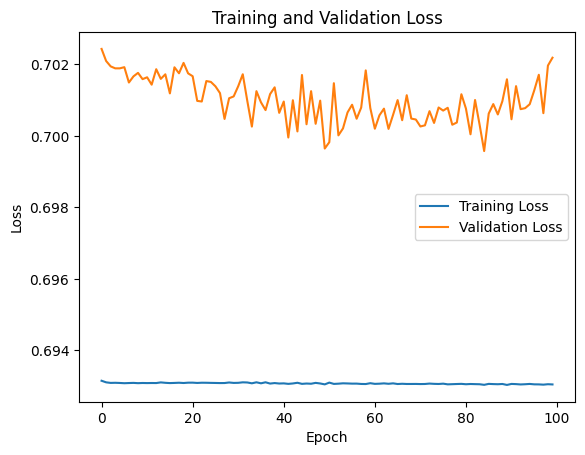

In [155]:
batch_size = 500
# Assuming you have a history object from model.fit() containing loss values
history = model.fit(x_train_scaled, y_train, epochs=100,batch_size=batch_size,validation_data=(x_test, y_test))

# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
model.layers[0].get_weights()

[array([[ 0.17636389, -0.66852283, -0.37034836,  0.0490809 , -0.05098327,
          0.09906872,  0.38201022,  0.08004221,  0.49561626, -0.06855772],
        [-0.34749705,  0.28897482, -0.24867843, -0.22150618,  0.01297374,
          0.64341795,  0.22239216,  0.25227657,  0.29619008,  0.49729088],
        [-0.3674852 ,  0.11380984,  0.22692439, -0.5567859 , -0.372371  ,
          0.38585994,  0.35581627,  0.6867633 , -0.07574198, -0.06489481],
        [-0.13421373, -0.02610365, -0.00327914, -0.54089403, -0.34423137,
          0.290653  ,  0.32040745, -0.09697419,  0.01243646,  0.44665807],
        [-0.18999955, -0.5364978 , -0.0814902 ,  0.38775387,  0.36833906,
          0.04082146,  0.42119044, -0.34964857,  0.28130552, -0.17729925],
        [-0.8511565 , -0.12310148, -0.17855124, -0.06583887,  0.2508987 ,
         -0.02273607,  0.5881139 , -0.2552365 ,  0.11217304, -0.14493819],
        [ 0.5202719 , -0.21317807, -0.27373132,  0.44727814, -0.12258697,
          0.22370261, -0.3707526

In [ ]:
model.predict(x_test_scaled)

502/502 [==============================] - 2s 3ms/step


array([[0.4991617 ],
       [0.4909551 ],
       [0.4998974 ],
       ...,
       [0.50134456],
       [0.48983192],
       [0.4919242 ]], dtype=float32)

In [ ]:
y_log = model.predict(x_test_scaled)

502/502 [==============================] - 2s 3ms/step


In [ ]:
y_pred = np.where(y_log>0.5,1,0)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

NameError: name 'y_test' is not defined